In [13]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df

country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0            2.5   28.1839    73.2407        Solar         NaN         NaN   
1           98.0   24.7663    74.6090         Coal         NaN         NaN   
2           39.2   21.9038    69.3732         Wind         NaN         NaN   
3          135.0   23.8712    91.3602          Gas         NaN         NaN   
4         1800.0   21.9603    82.4091         Coal         Oil         NaN   
..           ...       ...        ...          ...         ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil         NaN   
903          3.0   12.8932    78.1654        Solar         NaN         NaN   
904         25.5   15.2758    75.5811         Wind         NaN         NaN   
905         80.0   24.3500    73.7477         Coal         NaN         NaN   
906         16.5    9.9344    77.4768         Wind         NaN         NaN   

     ...  year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0    ...                    NaN                  NaN                 NaN   
1    ...                    NaN                  NaN                 NaN   
2    ...                    NaN                  NaN                 NaN   
3    ...                 2019.0                  NaN          617.789264   
4    ...                 2019.0                  NaN         3035.550000   
..   ...                    ...                  ...                 ...   
902  ...                 2019.0                  NaN                 NaN   
903  ...                    NaN                  NaN                 NaN   
904  ...                    NaN                  NaN                 NaN   
905  ...                    NaN                  NaN                 NaN   
906  ...                    NaN                  NaN                 NaN   

    generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                   NaN                 NaN                 NaN   
1                   NaN                 NaN                 NaN   
2                   NaN                 NaN                 NaN   
3            843.747000          886.004428          663.774500   
4           5916.370000         6243.000000         5385.579736   
..                  ...                 ...                 ...   
902            0.994875          233.596650          865.400000   
903                 NaN                 NaN                 NaN   
904                 NaN                 NaN                 NaN   
905                 NaN                 NaN                 NaN   
906                 NaN                 NaN                 NaN   

     generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                    NaN                  NaN                            NaN   
1                    NaN                  NaN                            NaN   
2                    NaN                  NaN                            NaN   
3             626.239128                  NaN  Central Electricity Authority   
4            7279.000000                  NaN  Central Electricity Authority   
..                   ...    

In [15]:
df.shape

(907, 27)

this dataset is having 907 rows and 27 columns.there are 2 target variables in this dataset, first one is capacity_mw and other one is primary fuel.

We will treat this like two problem. Treat one variable at a time.

# Exploratory Data Analysis

In [16]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

out of 27 columns 15 columns are float type and 12 columns are object type.

In [18]:
for i in df.columns:
    print(df[i].value_counts())

IND    907
Name: country, dtype: int64
India    907
Name: country_long, dtype: int64
ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64
WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64
5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64
19.0004    3
24.1917    3
24.8747    2
13.2450    2
11.5336    2
          ..
22.7554    1
27.1598    1
17.2970    1
20.8772    1
9.9344     1
Name: la

In [19]:
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

In [20]:
df.head()

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
0   28.1839    73.2407        Solar         NaN         NaN  ...   
1   24.7663    74.6090         Coal         NaN         NaN  ...   
2   21.9038    69.3732         Wind         NaN         NaN  ...   
3   23.8712    91.3602          Gas         NaN         NaN  ...   
4   21.9603    82.4091         Coal         Oil         NaN  ...   

   year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0                    NaN                  NaN                 NaN   
1                    NaN                  NaN                 NaN   
2                    NaN                  NaN                 NaN   
3                 2019.0                  NaN          617.789264   
4                 2019.0                  NaN         3035.550000   

  generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3             843.747          886.004428          663.774500   
4            5916.370         6243.000000         5385.579736   

   generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                  NaN                  NaN                            NaN   
1                  NaN                  NaN                            NaN   
2                  NaN                  NaN                            NaN   
3           626.239128                  NaN  Central Electricity Authority   
4          7279.000000                  NaN  Central Electricity Authority   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 27 columns]

In the country and country_long column there are only one value present. We are going to drop these columns. It will not impact our model prediction.

In [21]:
df.drop(['country','country_long'],axis=1,inplace=True)
df.head()

name   gppd_idnr  capacity_mw  latitude  longitude  \
0          ACME Solar Tower  WRI1020239          2.5   28.1839    73.2407   
1       ADITYA CEMENT WORKS  WRI1019881         98.0   24.7663    74.6090   
2  AES Saurashtra Windfarms  WRI1026669         39.2   21.9038    69.3732   
3               AGARTALA GT  IND0000001        135.0   23.8712    91.3602   
4              AKALTARA TPP  IND0000002       1800.0   21.9603    82.4091   

  primary_fuel other_fuel1 other_fuel2  other_fuel3  commissioning_year  ...  \
0        Solar         NaN         NaN          NaN              2011.0  ...   
1         Coal         NaN         NaN          NaN                 NaN  ...   
2         Wind         NaN         NaN          NaN                 NaN  ...   
3          Gas         NaN         NaN          NaN              2004.0  ...   
4         Coal         Oil         NaN          NaN              2015.0  ...   

  year_of_capacity_data generation_gwh_2013 generation_gwh_2014  \
0                   NaN                 NaN                 NaN   
1                   NaN                 NaN                 NaN   
2                   NaN                 NaN                 NaN   
3                2019.0                 NaN          617.789264   
4                2019.0                 NaN         3035.550000   

  generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0                 NaN                  NaN                  NaN   
1                 NaN                  NaN                  NaN   
2                 NaN                  NaN                  NaN   
3             843.747           886.004428           663.774500   
4            5916.370          6243.000000          5385.579736   

   generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                  NaN                  NaN                            NaN   
1                  NaN                  NaN                            NaN   
2                  NaN                  NaN                            NaN   
3           626.239128                  NaN  Central Electricity Authority   
4          7279.000000                  NaN  Central Electricity Authority   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 25 columns]

In this dataset there are 907 unique value present in name and gppd_idnr column. these columns is also object type. these are not going to impact our model prediction. I am going to drop these column also.

In [22]:
df.drop(['name','gppd_idnr'],axis=1,inplace=True)
df.head()

capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0          2.5   28.1839    73.2407        Solar         NaN         NaN   
1         98.0   24.7663    74.6090         Coal         NaN         NaN   
2         39.2   21.9038    69.3732         Wind         NaN         NaN   
3        135.0   23.8712    91.3602          Gas         NaN         NaN   
4       1800.0   21.9603    82.4091         Coal         Oil         NaN   

   other_fuel3  commissioning_year                 owner  \
0          NaN              2011.0           Solar Paces   
1          NaN                 NaN  Ultratech Cement ltd   
2          NaN                 NaN                   AES   
3          NaN              2004.0                   NaN   
4          NaN              2015.0                   NaN   

                                 source  ... year_of_capacity_data  \
0  National Renewable Energy Laboratory  ...                   NaN   
1                  Ultratech Cement ltd  ...                   NaN   
2                                   CDM  ...                   NaN   
3         Central Electricity Authority  ...                2019.0   
4         Central Electricity Authority  ...                2019.0   

  generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0                 NaN                  NaN                  NaN   
1                 NaN                  NaN                  NaN   
2                 NaN                  NaN                  NaN   
3                 NaN           617.789264              843.747   
4                 NaN          3035.550000             5916.370   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3           886.004428           663.774500           626.239128   
4          6243.000000          5385.579736          7279.000000   

   generation_gwh_2019         generation_data_source  \
0                  NaN                            NaN   
1                  NaN                            NaN   
2                  NaN                            NaN   
3                  NaN  Central Electricity Authority   
4                  NaN  Central Electricity Authority   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 23 columns]

In [23]:
df.isnull().sum()

capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

<AxesSubplot:>

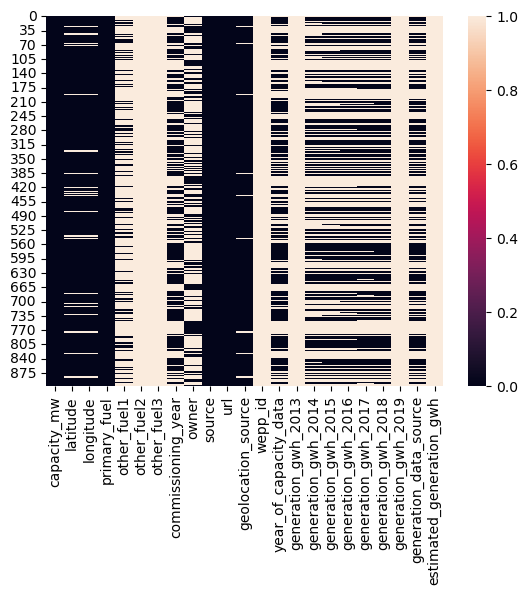

In [24]:
sns.heatmap(df.isnull())

In [25]:
df.nunique()

capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

Some columns are blank in this data set. So we are going to drop these columns as well.

In [26]:
df.drop(['other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh'],axis=1,inplace=True)
df.head()

capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0          2.5   28.1839    73.2407        Solar         NaN         NaN   
1         98.0   24.7663    74.6090         Coal         NaN         NaN   
2         39.2   21.9038    69.3732         Wind         NaN         NaN   
3        135.0   23.8712    91.3602          Gas         NaN         NaN   
4       1800.0   21.9603    82.4091         Coal         Oil         NaN   

   commissioning_year                 owner  \
0              2011.0           Solar Paces   
1                 NaN  Ultratech Cement ltd   
2                 NaN                   AES   
3              2004.0                   NaN   
4              2015.0                   NaN   

                                 source  \
0  National Renewable Energy Laboratory   
1                  Ultratech Cement ltd   
2                                   CDM   
3         Central Electricity Authority   
4         Central Electricity Authority   

                                                 url  \
0  http://www.nrel.gov/csp/solarpaces/project_det...   
1                    http://www.ultratechcement.com/   
2  https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...   
3                             http://www.cea.nic.in/   
4                             http://www.cea.nic.in/   

                     geolocation_source  year_of_capacity_data  \
0  National Renewable Energy Laboratory                    NaN   
1                                   WRI                    NaN   
2                                   WRI                    NaN   
3                                   WRI                 2019.0   
4                                   WRI                 2019.0   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3           617.789264              843.747           886.004428   
4          3035.550000             5916.370          6243.000000   

   generation_gwh_2017  generation_gwh_2018         generation_data_source  
0                  NaN                  NaN                            NaN  
1                  NaN                  NaN                            NaN  
2                  NaN                  NaN                            NaN  
3           663.774500           626.239128  Central Electricity Authority  
4          5385.579736          7279.000000  Central Electricity Authority

we are going to drop url column as well, this column is not going to help in our prediction. 

In [27]:
df.drop('url',axis=1,inplace=True)

In [28]:
df.isnull().sum()

capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
other_fuel2               906
commissioning_year        380
owner                     565
source                      0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

1. We are going to drop source and owner column, because these columns are object type and having no significance for prediction the model.

2. other_fuel2 is having 906 null values and only one unique value present in this column. Other_fuel1 is also having 709 null values.I am going to drop these columns also.

3. generation_data_source is also a object data type and 458 null values are also present. I am going to drop this column also. 

In [29]:
df.drop(['owner','source','other_fuel1','other_fuel2','generation_data_source','year_of_capacity_data'],axis=1,inplace=True)
df.head()

capacity_mw  latitude  longitude primary_fuel  commissioning_year  \
0          2.5   28.1839    73.2407        Solar              2011.0   
1         98.0   24.7663    74.6090         Coal                 NaN   
2         39.2   21.9038    69.3732         Wind                 NaN   
3        135.0   23.8712    91.3602          Gas              2004.0   
4       1800.0   21.9603    82.4091         Coal              2015.0   

                     geolocation_source  generation_gwh_2014  \
0  National Renewable Energy Laboratory                  NaN   
1                                   WRI                  NaN   
2                                   WRI                  NaN   
3                                   WRI           617.789264   
4                                   WRI          3035.550000   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3              843.747           886.004428           663.774500   
4             5916.370          6243.000000          5385.579736   

   generation_gwh_2018  
0                  NaN  
1                  NaN  
2                  NaN  
3           626.239128  
4          7279.000000

In [30]:
df.shape

(907, 11)

Now we have only 12 columns left.

In [31]:
df.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
commissioning_year     float64
geolocation_source      object
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

# Filling the null values

In [32]:
df['geolocation_source']=df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])

In [33]:
df['commissioning_year']=df['commissioning_year'].fillna(df['commissioning_year'].mode()[0])

In [34]:
df['year_of_capacity_data']=df['year_of_capacity_data'].fillna(df['year_of_capacity_data'].mode()[0])

KeyError: 'year_of_capacity_data'

In [35]:
df['year_of_capacity_data']

KeyError: 'year_of_capacity_data'

In [36]:
df['commissioning_year']

0      2011.0
1      2015.0
2      2015.0
3      2004.0
4      2015.0
        ...  
902    2016.0
903    2015.0
904    2015.0
905    2015.0
906    2015.0
Name: commissioning_year, Length: 907, dtype: float64

In [37]:
df['geolocation_source']

0      National Renewable Energy Laboratory
1                                       WRI
2                                       WRI
3                                       WRI
4                                       WRI
                       ...                 
902                                     WRI
903                          Industry About
904                                     WRI
905                                     WRI
906                                     WRI
Name: geolocation_source, Length: 907, dtype: object

In [38]:
df['latitude']=df['latitude'].fillna(df['latitude'].mean())

In [39]:
df['latitude']

0      28.1839
1      24.7663
2      21.9038
3      23.8712
4      21.9603
        ...   
902    16.2949
903    12.8932
904    15.2758
905    24.3500
906     9.9344
Name: latitude, Length: 907, dtype: float64

In [40]:
df['longitude']=df['longitude'].fillna(df['longitude'].mean())

In [41]:
df.isnull().sum()

capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year       0
geolocation_source       0
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [42]:
df['generation_gwh_2014']=df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean())
df['generation_gwh_2015']=df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean())
df['generation_gwh_2016']=df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean())
df['generation_gwh_2017']=df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean())
df['generation_gwh_2018']=df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].mean())

In [43]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

Here we fill all the null values in the columns. We will crosscheck this by using heat map.

<AxesSubplot:>

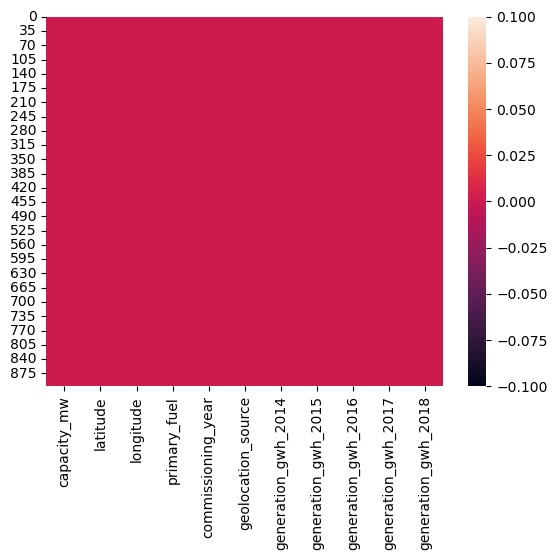

In [44]:
sns.heatmap(df.isnull())

In [45]:
df.describe()

capacity_mw    latitude   longitude  commissioning_year  \
count   907.000000  907.000000  907.000000          907.000000   
mean    326.223755   21.197918   77.464907         2004.594267   
std     590.085456    6.079148    4.812291           15.734928   
min       0.000000    8.168900   68.644700         1927.000000   
25%      16.725000   17.072000   74.388900         1998.000000   
50%      59.200000   21.281800   76.979200         2014.000000   
75%     385.250000   25.176450   79.206100         2015.000000   
max    4760.000000   34.649000   95.408000         2018.000000   

       generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
count           907.000000           907.000000           907.000000   
mean           2431.823590          2428.226946          2467.936859   
std            2665.338608          2859.349132          2877.890004   
min               0.000000             0.000000             0.000000   
25%            1211.362750           916.000000           896.500214   
50%            2431.823590          2428.226946          2467.936859   
75%            2431.823590          2428.226946          2467.936859   
max           28127.000000         30539.000000         30015.000000   

       generation_gwh_2017  generation_gwh_2018  
count           907.000000           907.000000  
mean           2547.759305          2600.804099  
std            2921.502193          3030.808041  
min               0.000000             0.000000  
25%             882.594850           824.842340  
50%            2547.759305          2600.804099  
75%            2547.759305          2600.804099  
max           35116.000000         35136.000000

From this describe method we can say that:-
    
    1. All the numeric column is having same count, So there are no missing or null values are present in this.
    
    2. latitude and longtitude  column is having slightly more mean value than 50% . it should be slightly right skewed .
    
    3. Rest of the columns is having equal values of mode and median.
    
    4. there are big difference in between 75% and max values , so there will be some outliers should be present in this data.          We will confirm these by using boxplot curves. 

# Change data types using label encoder

In [46]:
df

capacity_mw  latitude  longitude primary_fuel  commissioning_year  \
0            2.5   28.1839    73.2407        Solar              2011.0   
1           98.0   24.7663    74.6090         Coal              2015.0   
2           39.2   21.9038    69.3732         Wind              2015.0   
3          135.0   23.8712    91.3602          Gas              2004.0   
4         1800.0   21.9603    82.4091         Coal              2015.0   
..           ...       ...        ...          ...                 ...   
902       1600.0   16.2949    77.3568         Coal              2016.0   
903          3.0   12.8932    78.1654        Solar              2015.0   
904         25.5   15.2758    75.5811         Wind              2015.0   
905         80.0   24.3500    73.7477         Coal              2015.0   
906         16.5    9.9344    77.4768         Wind              2015.0   

                       geolocation_source  generation_gwh_2014  \
0    National Renewable Energy Laboratory          2431.823590   
1                                     WRI          2431.823590   
2                                     WRI          2431.823590   
3                                     WRI           617.789264   
4                                     WRI          3035.550000   
..                                    ...                  ...   
902                                   WRI          2431.823590   
903                        Industry About          2431.823590   
904                                   WRI          2431.823590   
905                                   WRI          2431.823590   
906                                   WRI          2431.823590   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0            2428.226946          2467.936859          2547.759305   
1            2428.226946          2467.936859          2547.759305   
2            2428.226946          2467.936859          2547.759305   
3             843.747000           886.004428           663.774500   
4            5916.370000          6243.000000          5385.579736   
..                   ...                  ...                  ...   
902             0.994875           233.596650           865.400000   
903          2428.226946          2467.936859          2547.759305   
904          2428.226946          2467.936859          2547.759305   
905          2428.226946          2467.936859          2547.759305   
906          2428.226946          2467.936859          2547.759305   

     generation_gwh_2018  
0            2600.804099  
1            2600.804099  
2            2600.804099  
3             626.239128  
4            7279.000000  
..                   ...  
902           686.500000  
903          2600.804099  
904          2600.804099  
905          2600.804099  
906          2600.804099  

[907 rows x 11 columns]

In [47]:
df.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
commissioning_year     float64
geolocation_source      object
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
lb=LabelEncoder()

In [50]:
df['geolocation_source']=lb.fit_transform(df['geolocation_source'])
df.head()

capacity_mw  latitude  longitude primary_fuel  commissioning_year  \
0          2.5   28.1839    73.2407        Solar              2011.0   
1         98.0   24.7663    74.6090         Coal              2015.0   
2         39.2   21.9038    69.3732         Wind              2015.0   
3        135.0   23.8712    91.3602          Gas              2004.0   
4       1800.0   21.9603    82.4091         Coal              2015.0   

   geolocation_source  generation_gwh_2014  generation_gwh_2015  \
0                   1          2431.823590          2428.226946   
1                   2          2431.823590          2428.226946   
2                   2          2431.823590          2428.226946   
3                   2           617.789264           843.747000   
4                   2          3035.550000          5916.370000   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
0          2467.936859          2547.759305          2600.804099  
1          2467.936859          2547.759305          2600.804099  
2          2467.936859          2547.759305          2600.804099  
3           886.004428           663.774500           626.239128  
4          6243.000000          5385.579736          7279.000000

In [51]:
df.describe()

capacity_mw    latitude   longitude  commissioning_year  \
count   907.000000  907.000000  907.000000          907.000000   
mean    326.223755   21.197918   77.464907         2004.594267   
std     590.085456    6.079148    4.812291           15.734928   
min       0.000000    8.168900   68.644700         1927.000000   
25%      16.725000   17.072000   74.388900         1998.000000   
50%      59.200000   21.281800   76.979200         2014.000000   
75%     385.250000   25.176450   79.206100         2015.000000   
max    4760.000000   34.649000   95.408000         2018.000000   

       geolocation_source  generation_gwh_2014  generation_gwh_2015  \
count          907.000000           907.000000           907.000000   
mean             1.733186          2431.823590          2428.226946   
std              0.677151          2665.338608          2859.349132   
min              0.000000             0.000000             0.000000   
25%              2.000000          1211.362750           916.000000   
50%              2.000000          2431.823590          2428.226946   
75%              2.000000          2431.823590          2428.226946   
max              2.000000         28127.000000         30539.000000   

       generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
count           907.000000           907.000000           907.000000  
mean           2467.936859          2547.759305          2600.804099  
std            2877.890004          2921.502193          3030.808041  
min               0.000000             0.000000             0.000000  
25%             896.500214           882.594850           824.842340  
50%            2467.936859          2547.759305          2600.804099  
75%            2467.936859          2547.759305          2600.804099  
max           30015.000000         35116.000000         35136.000000

# UNIVARIATE ANALYSIS

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

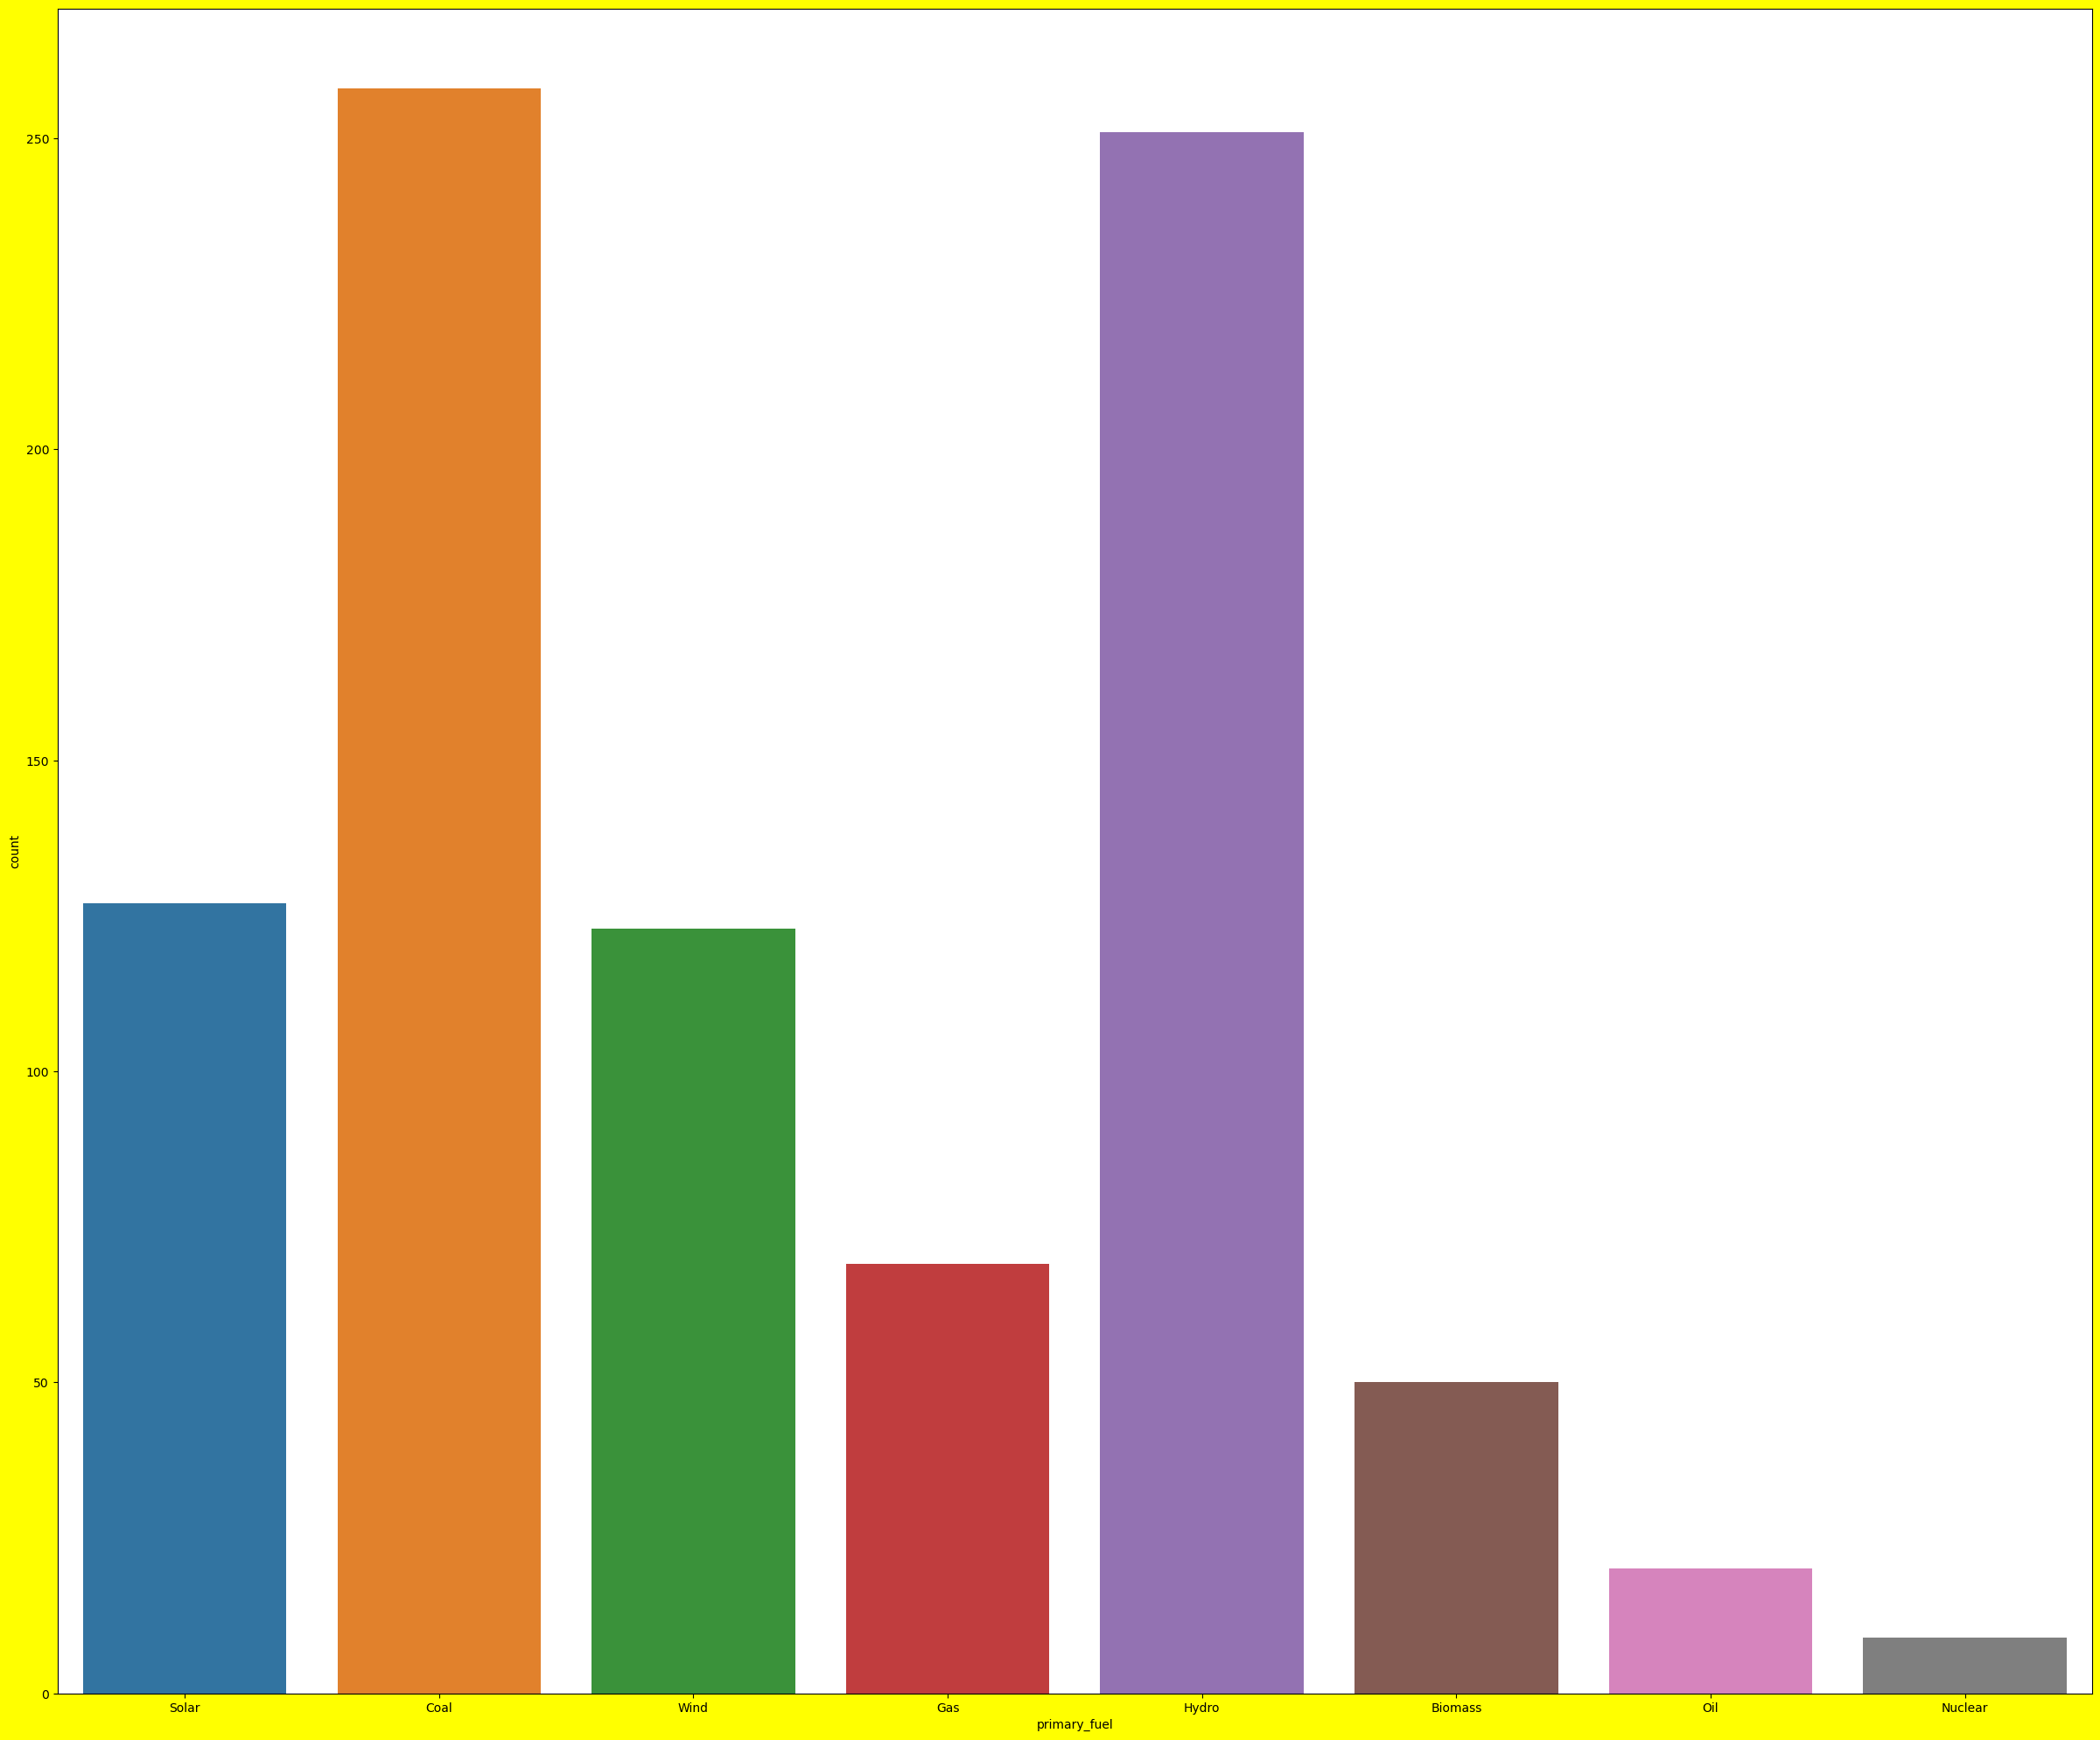

In [52]:
plt.figure(figsize=(30,25),facecolor='yellow')
sns.countplot(df['primary_fuel'])

From this we can see that maxm powerplant is working on coal and hydro. It is one of our target variable . we will treat this like a classification problem.

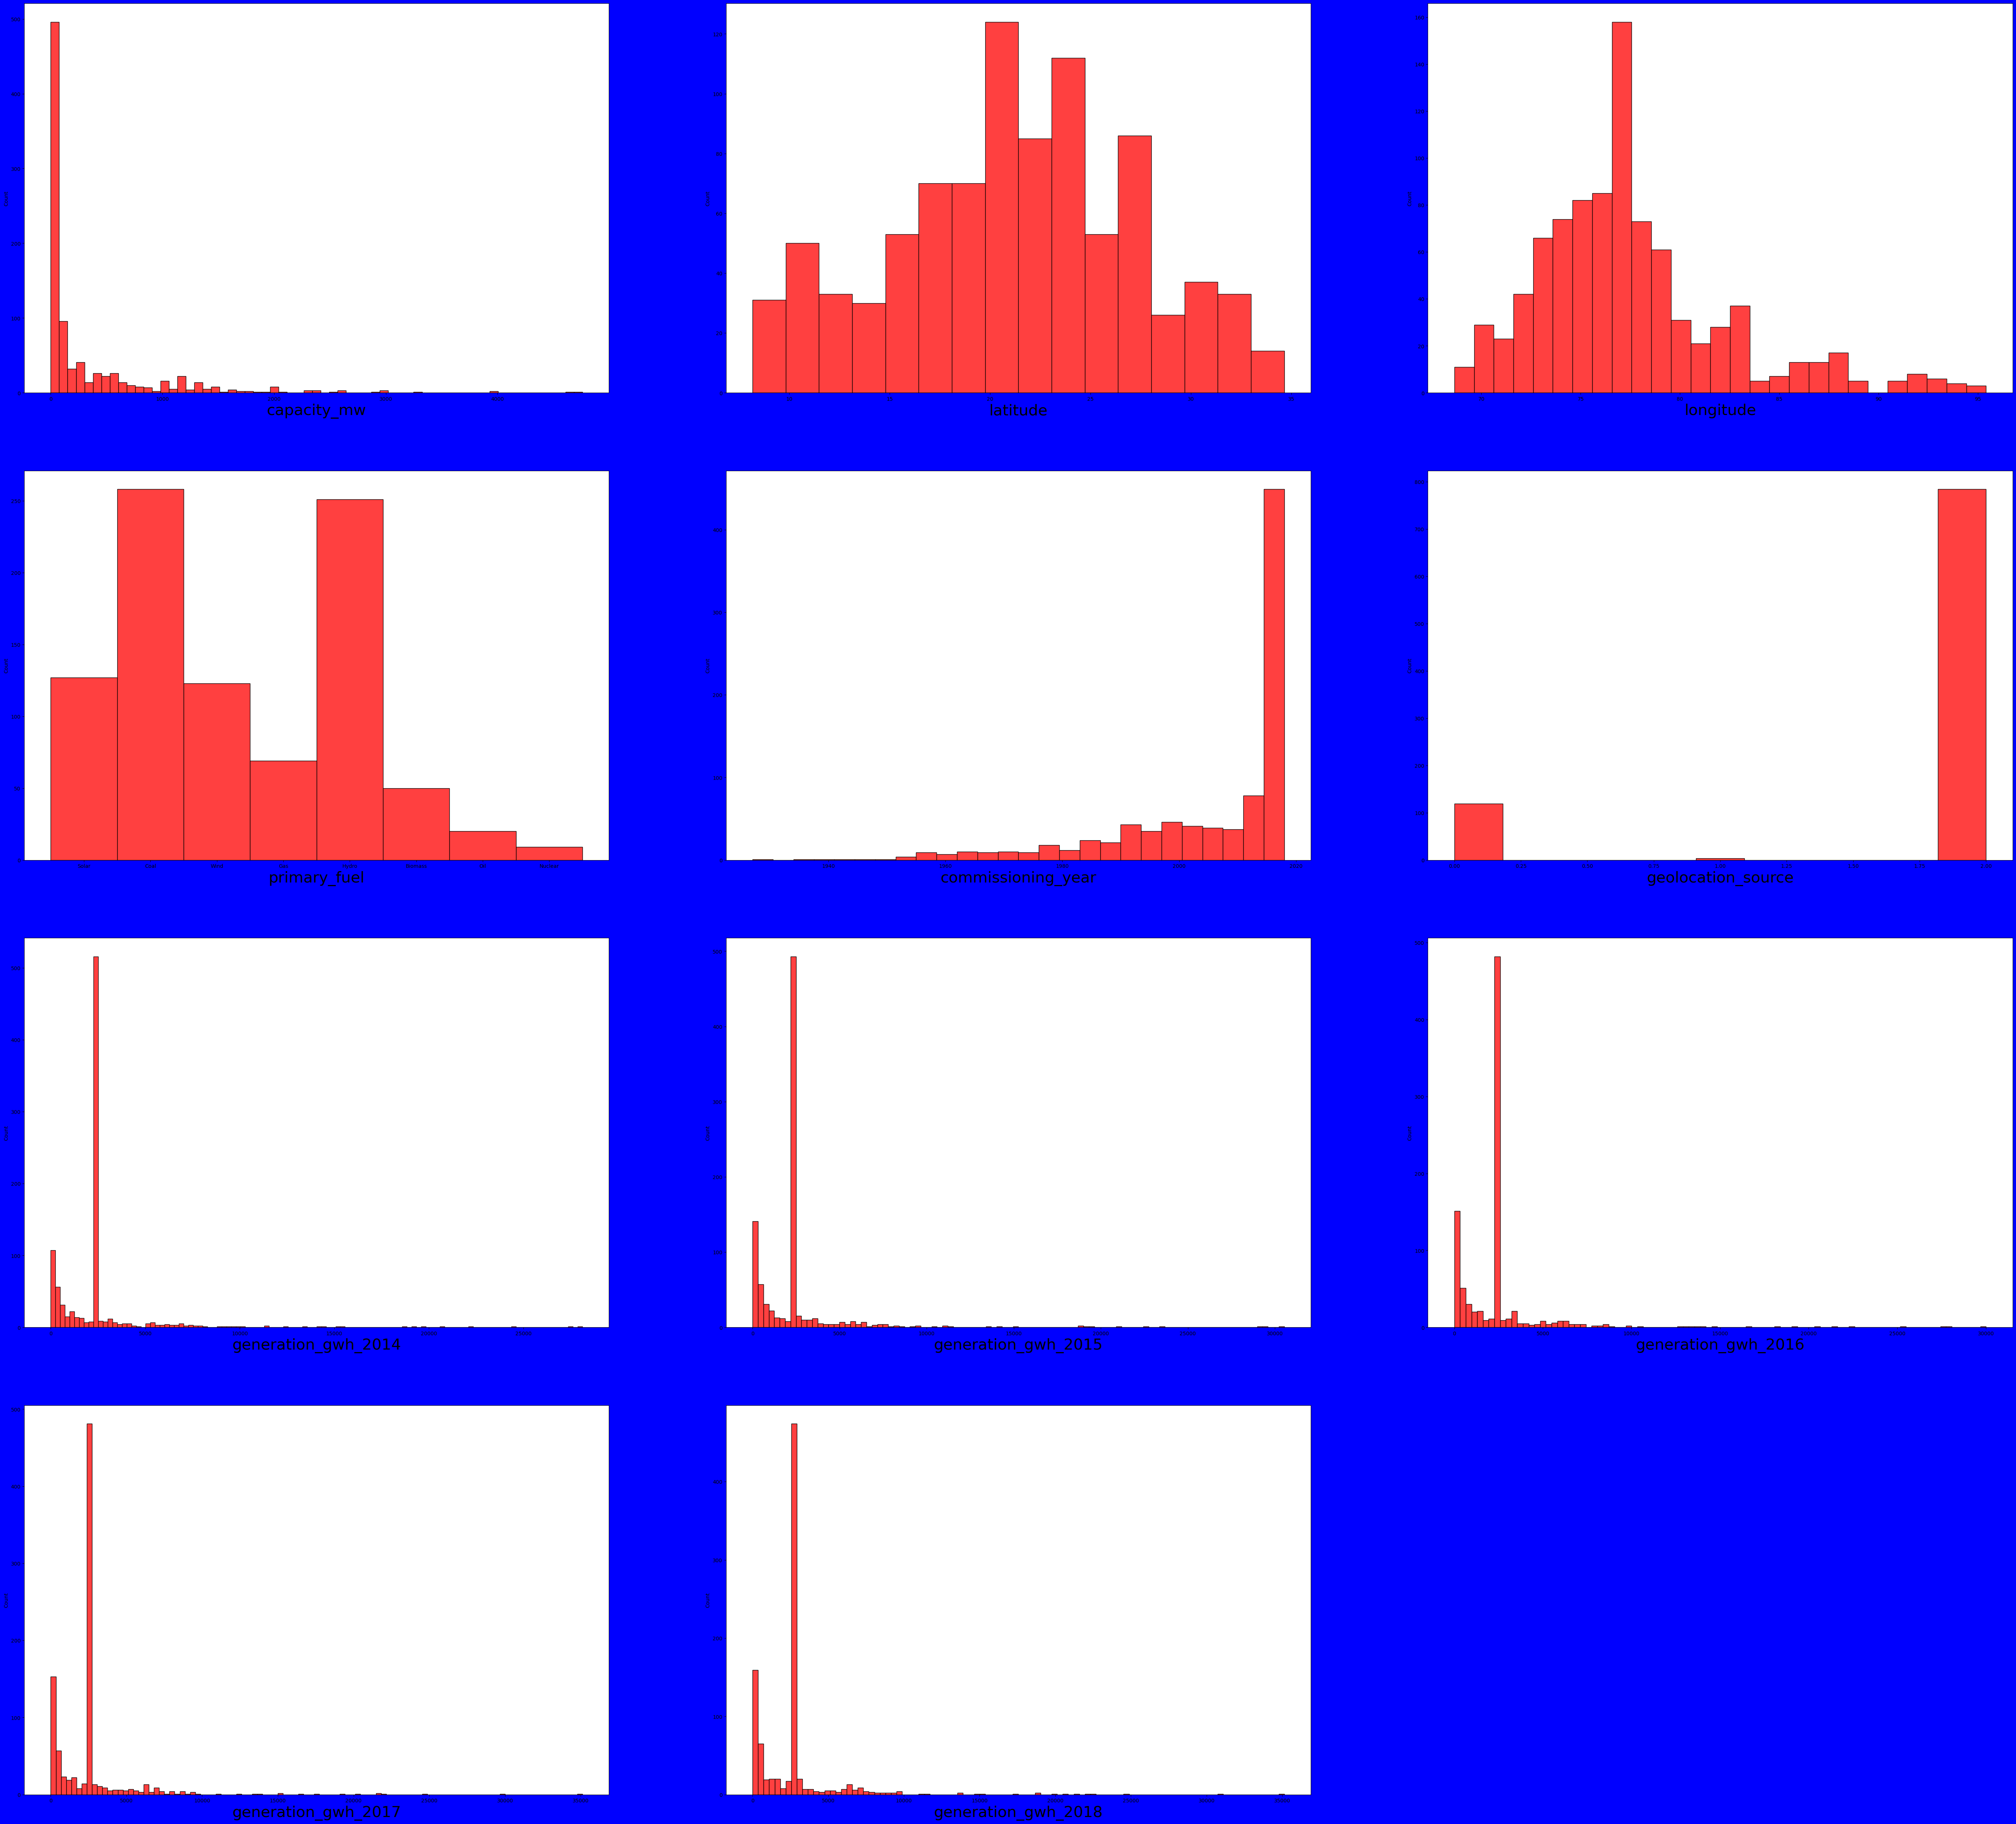

In [53]:
plt.figure(figsize=(70,80),facecolor='blue',edgecolor='red')
plotnumber=1
for column in df:
    if plotnumber<=20:
        ax=plt.subplot(5,3,plotnumber)
        sns.histplot(df[column],color='red')
        plt.xlabel(column,fontsize=30)
    plotnumber+=1
plt.show()

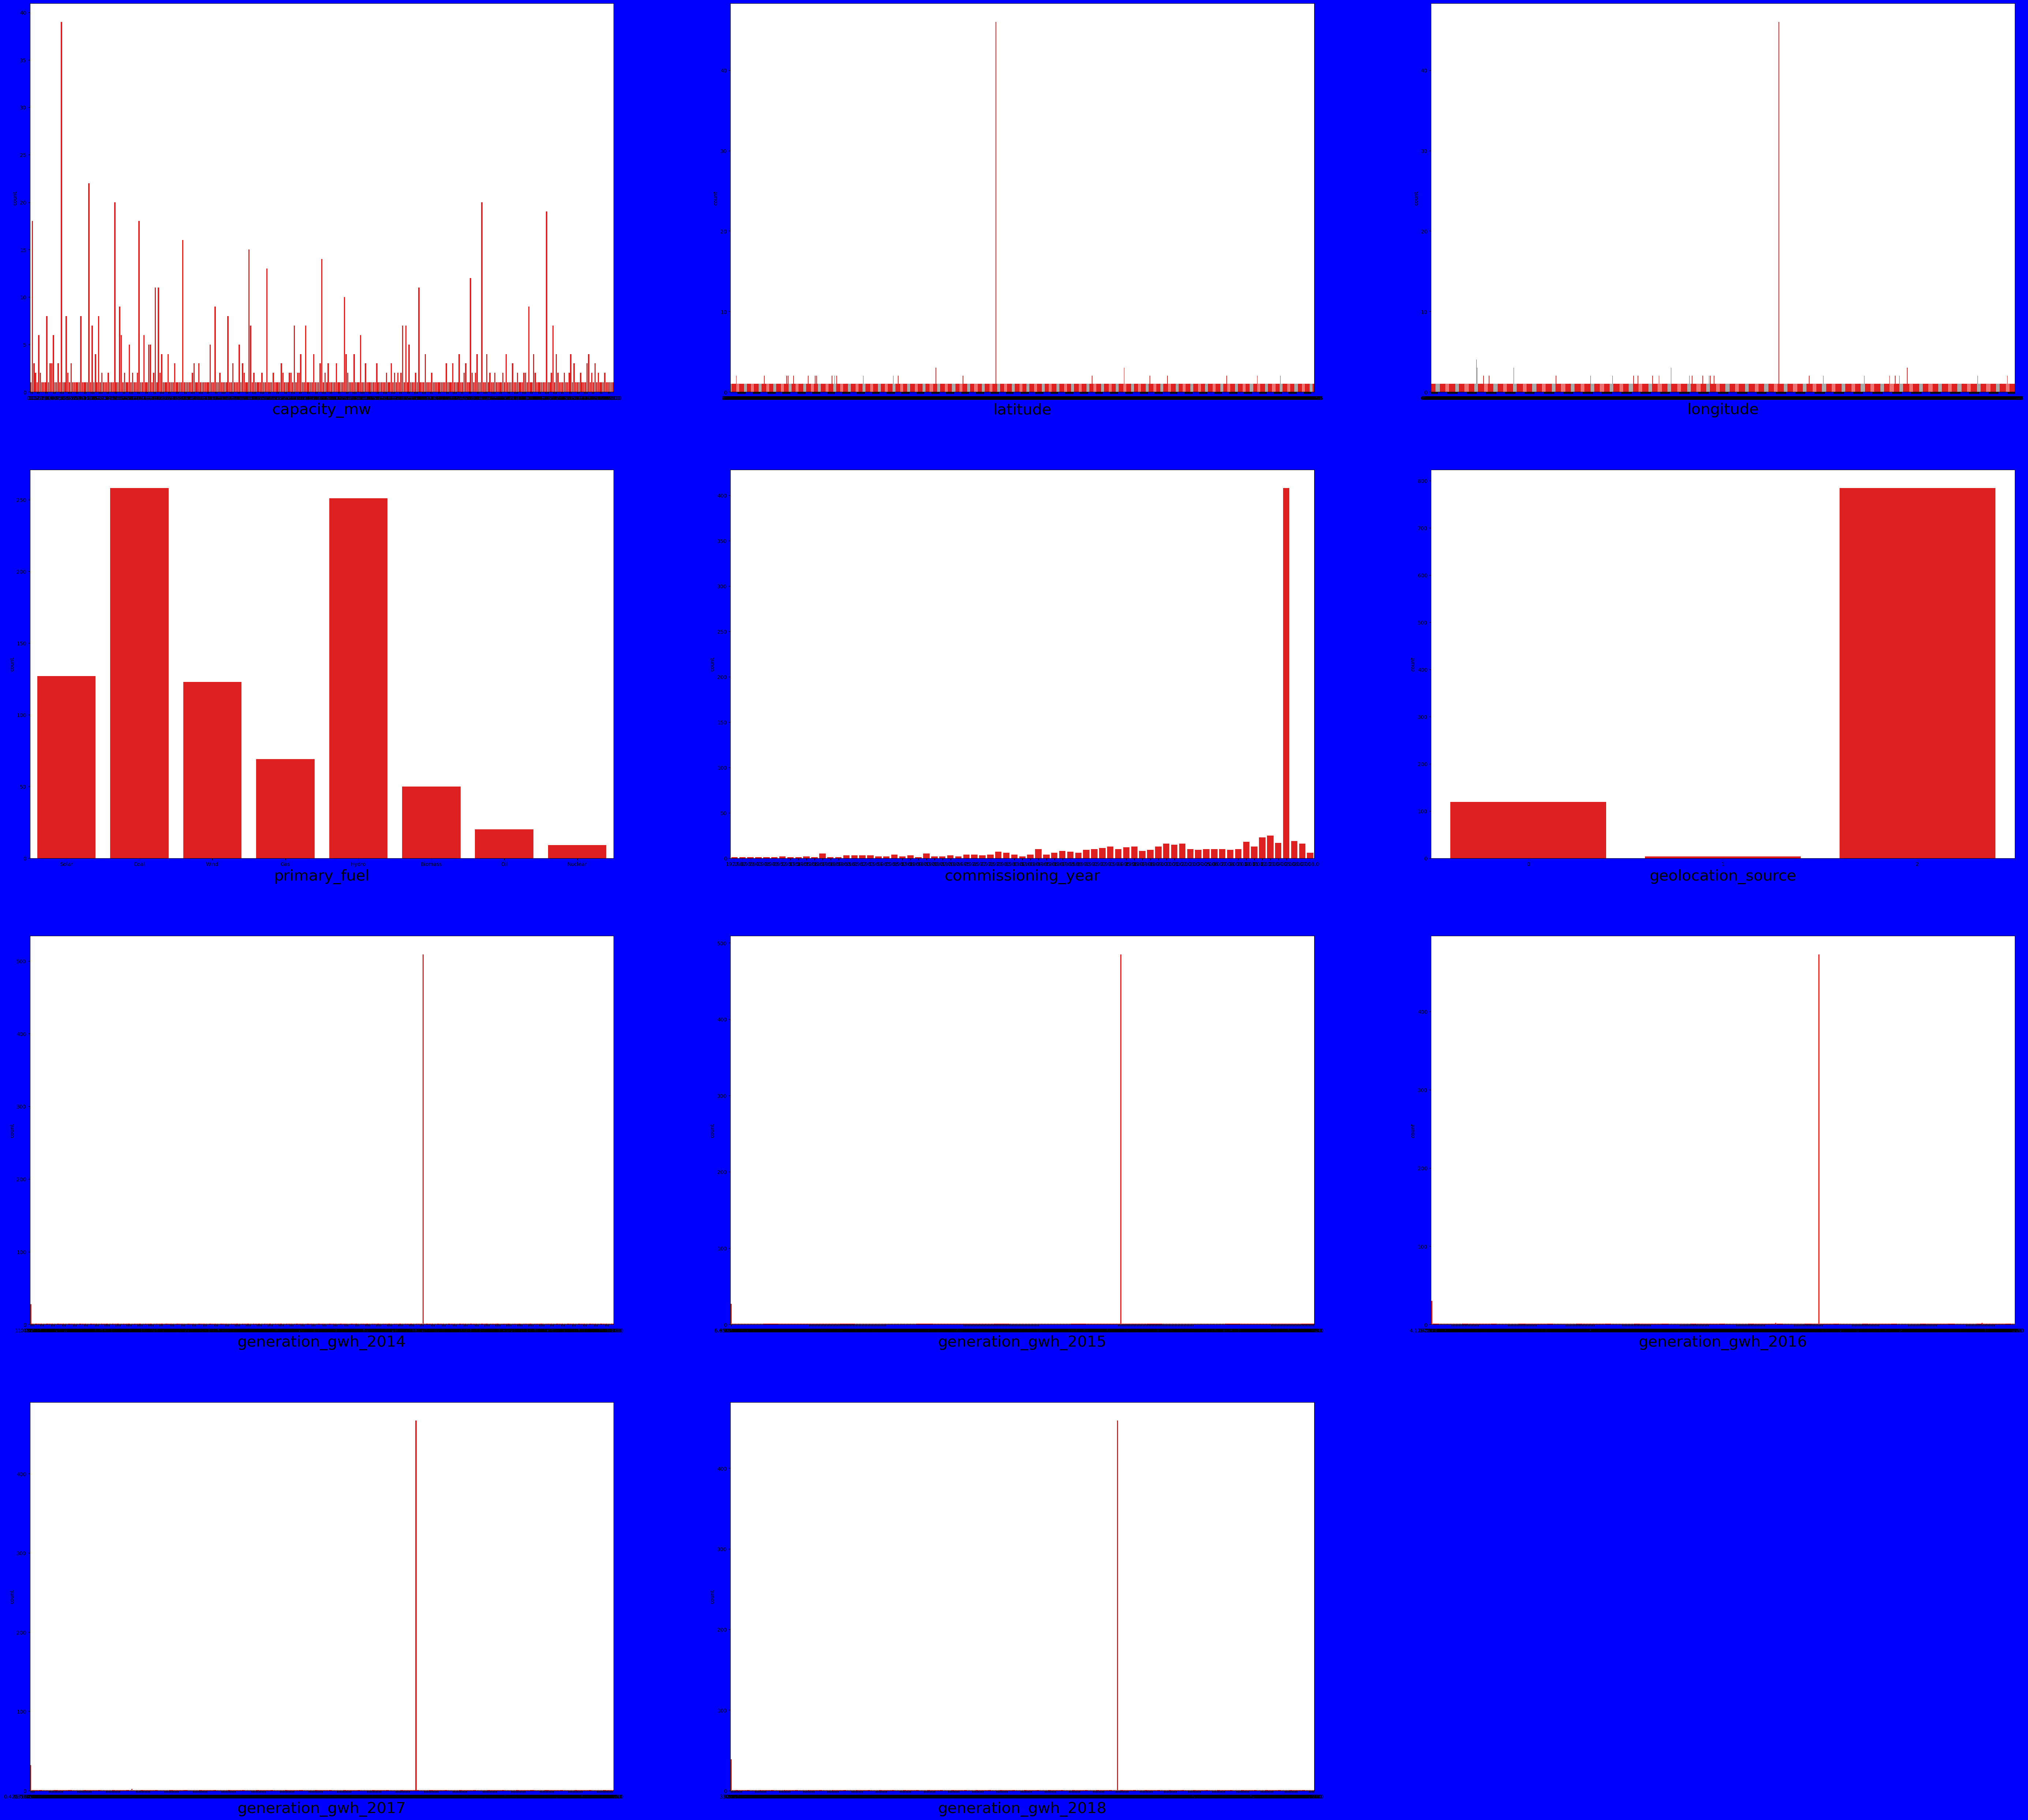

In [54]:
plt.figure(figsize=(70,80),facecolor='blue',edgecolor='red')
plotnumber=1
for column in df:
    if plotnumber<=20:
        ax=plt.subplot(5,3,plotnumber)
        sns.countplot(df[column],color='red')
        plt.xlabel(column,fontsize=30)
    plotnumber+=1
plt.show()

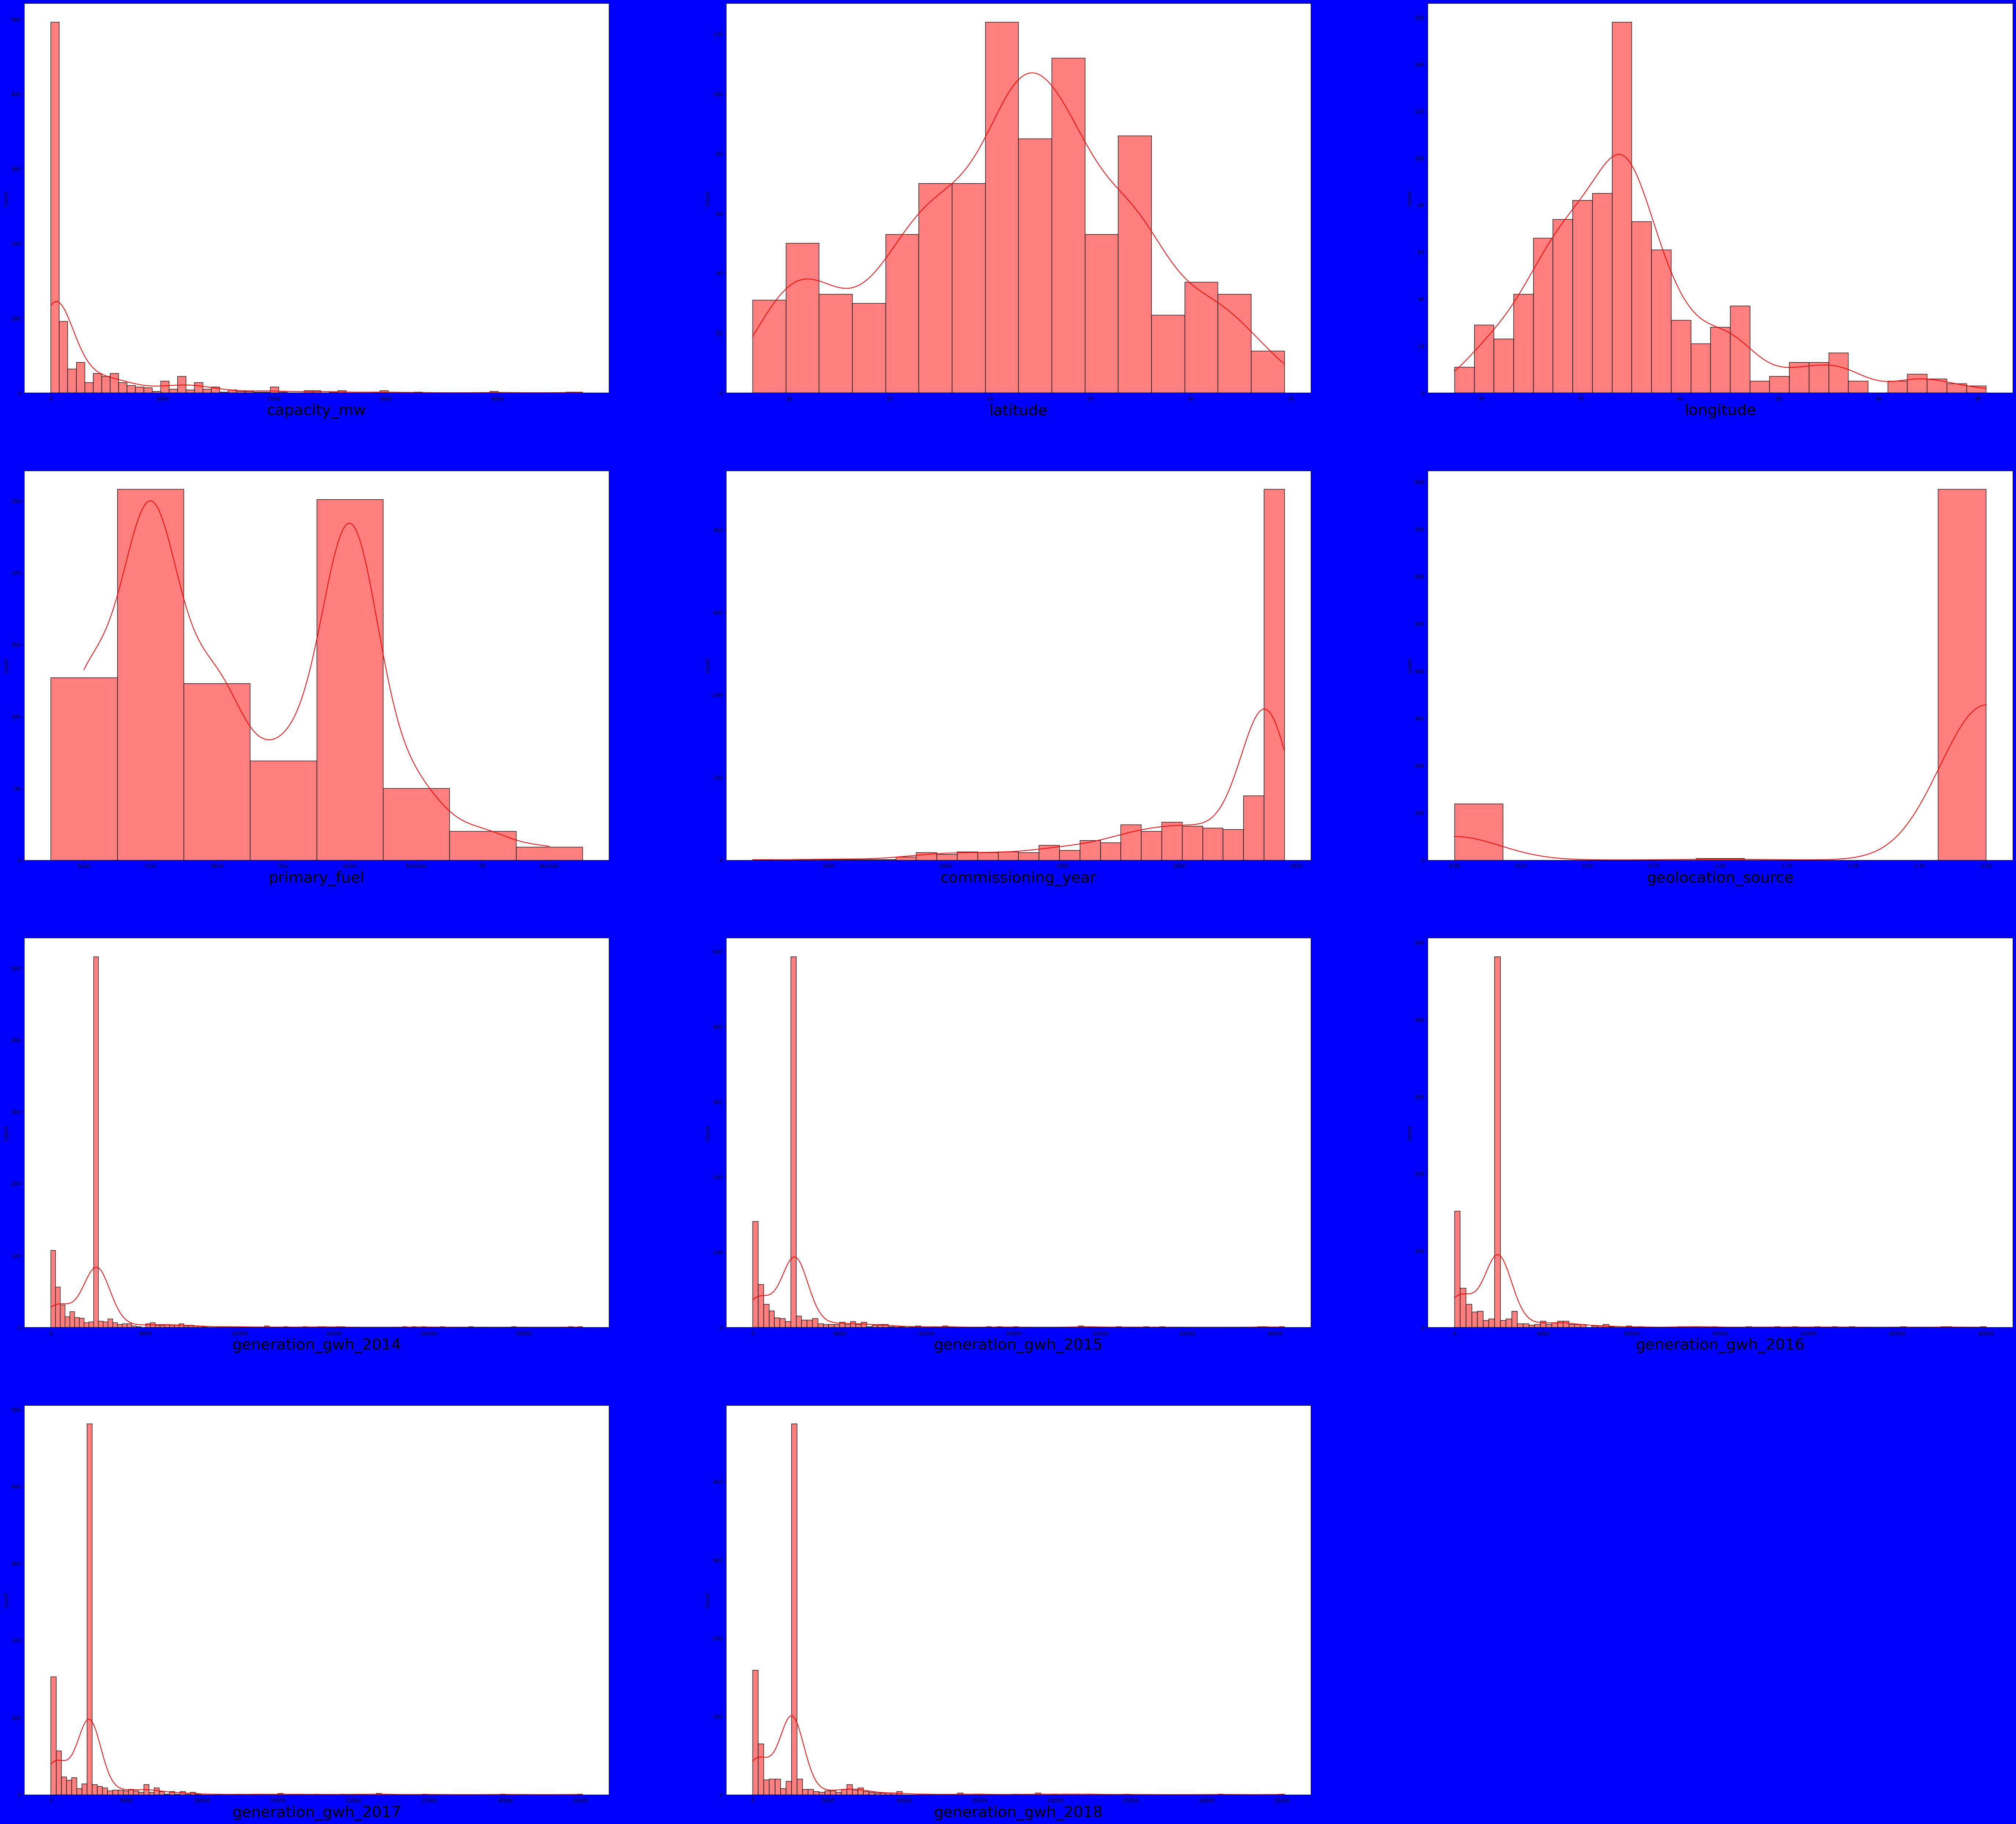

<Figure size 640x480 with 0 Axes>

In [55]:
plt.figure(figsize=(70,80),facecolor='blue',edgecolor='red')
plotnumber=1
for column in df:
    if plotnumber<=20:
        ax=plt.subplot(5,3,plotnumber)
        sns.histplot(df[column],color='red',kde=True)
        plt.xlabel(column,fontsize=30)
    plotnumber+=1
plt.show()
plt.tight_layout()

In [56]:
df['primary_fuel']=lb.fit_transform(df['primary_fuel'])
df.head()

capacity_mw  latitude  longitude  primary_fuel  commissioning_year  \
0          2.5   28.1839    73.2407             6              2011.0   
1         98.0   24.7663    74.6090             1              2015.0   
2         39.2   21.9038    69.3732             7              2015.0   
3        135.0   23.8712    91.3602             2              2004.0   
4       1800.0   21.9603    82.4091             1              2015.0   

   geolocation_source  generation_gwh_2014  generation_gwh_2015  \
0                   1          2431.823590          2428.226946   
1                   2          2431.823590          2428.226946   
2                   2          2431.823590          2428.226946   
3                   2           617.789264           843.747000   
4                   2          3035.550000          5916.370000   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
0          2467.936859          2547.759305          2600.804099  
1          2467.936859          2547.759305          2600.804099  
2          2467.936859          2547.759305          2600.804099  
3           886.004428           663.774500           626.239128  
4          6243.000000          5385.579736          7279.000000

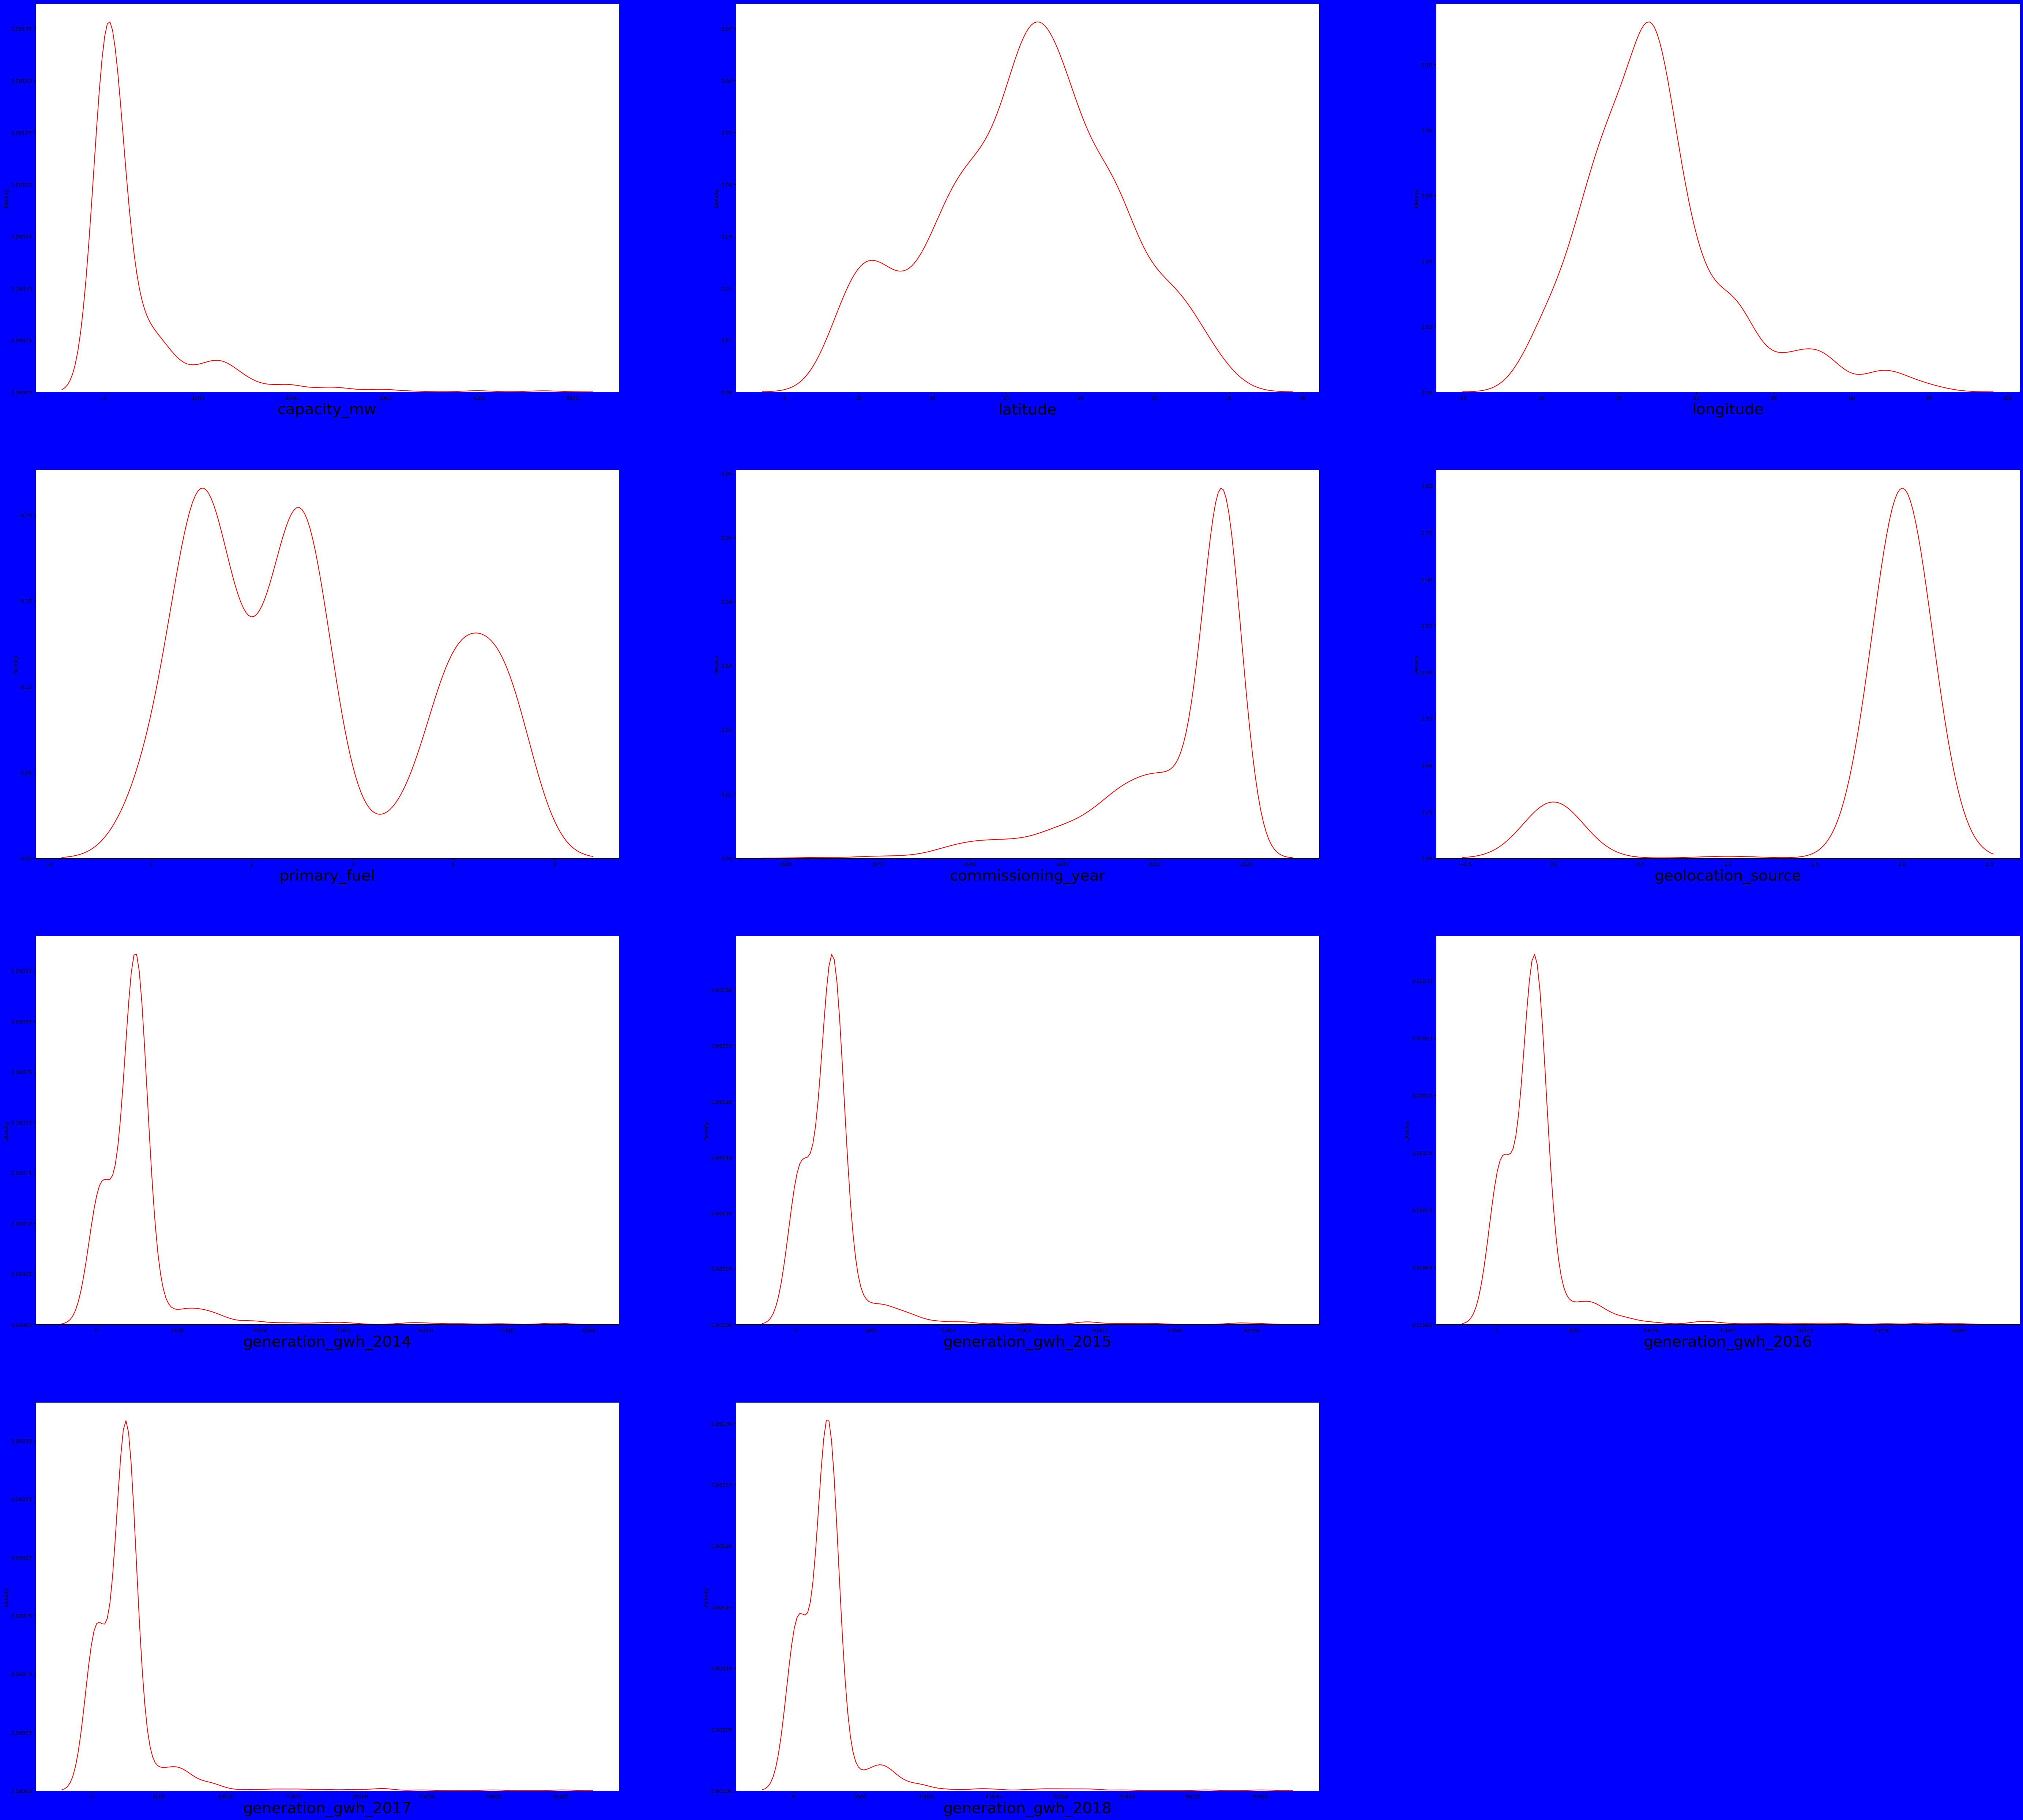

In [57]:
plt.figure(figsize=(70,80),facecolor='blue',edgecolor='red')
plotnumber=1
for column in df:
    if plotnumber<=20:
        ax=plt.subplot(5,3,plotnumber)
        sns.kdeplot(df[column],color='red')
        plt.xlabel(column,fontsize=30)
    plotnumber+=1
plt.show()


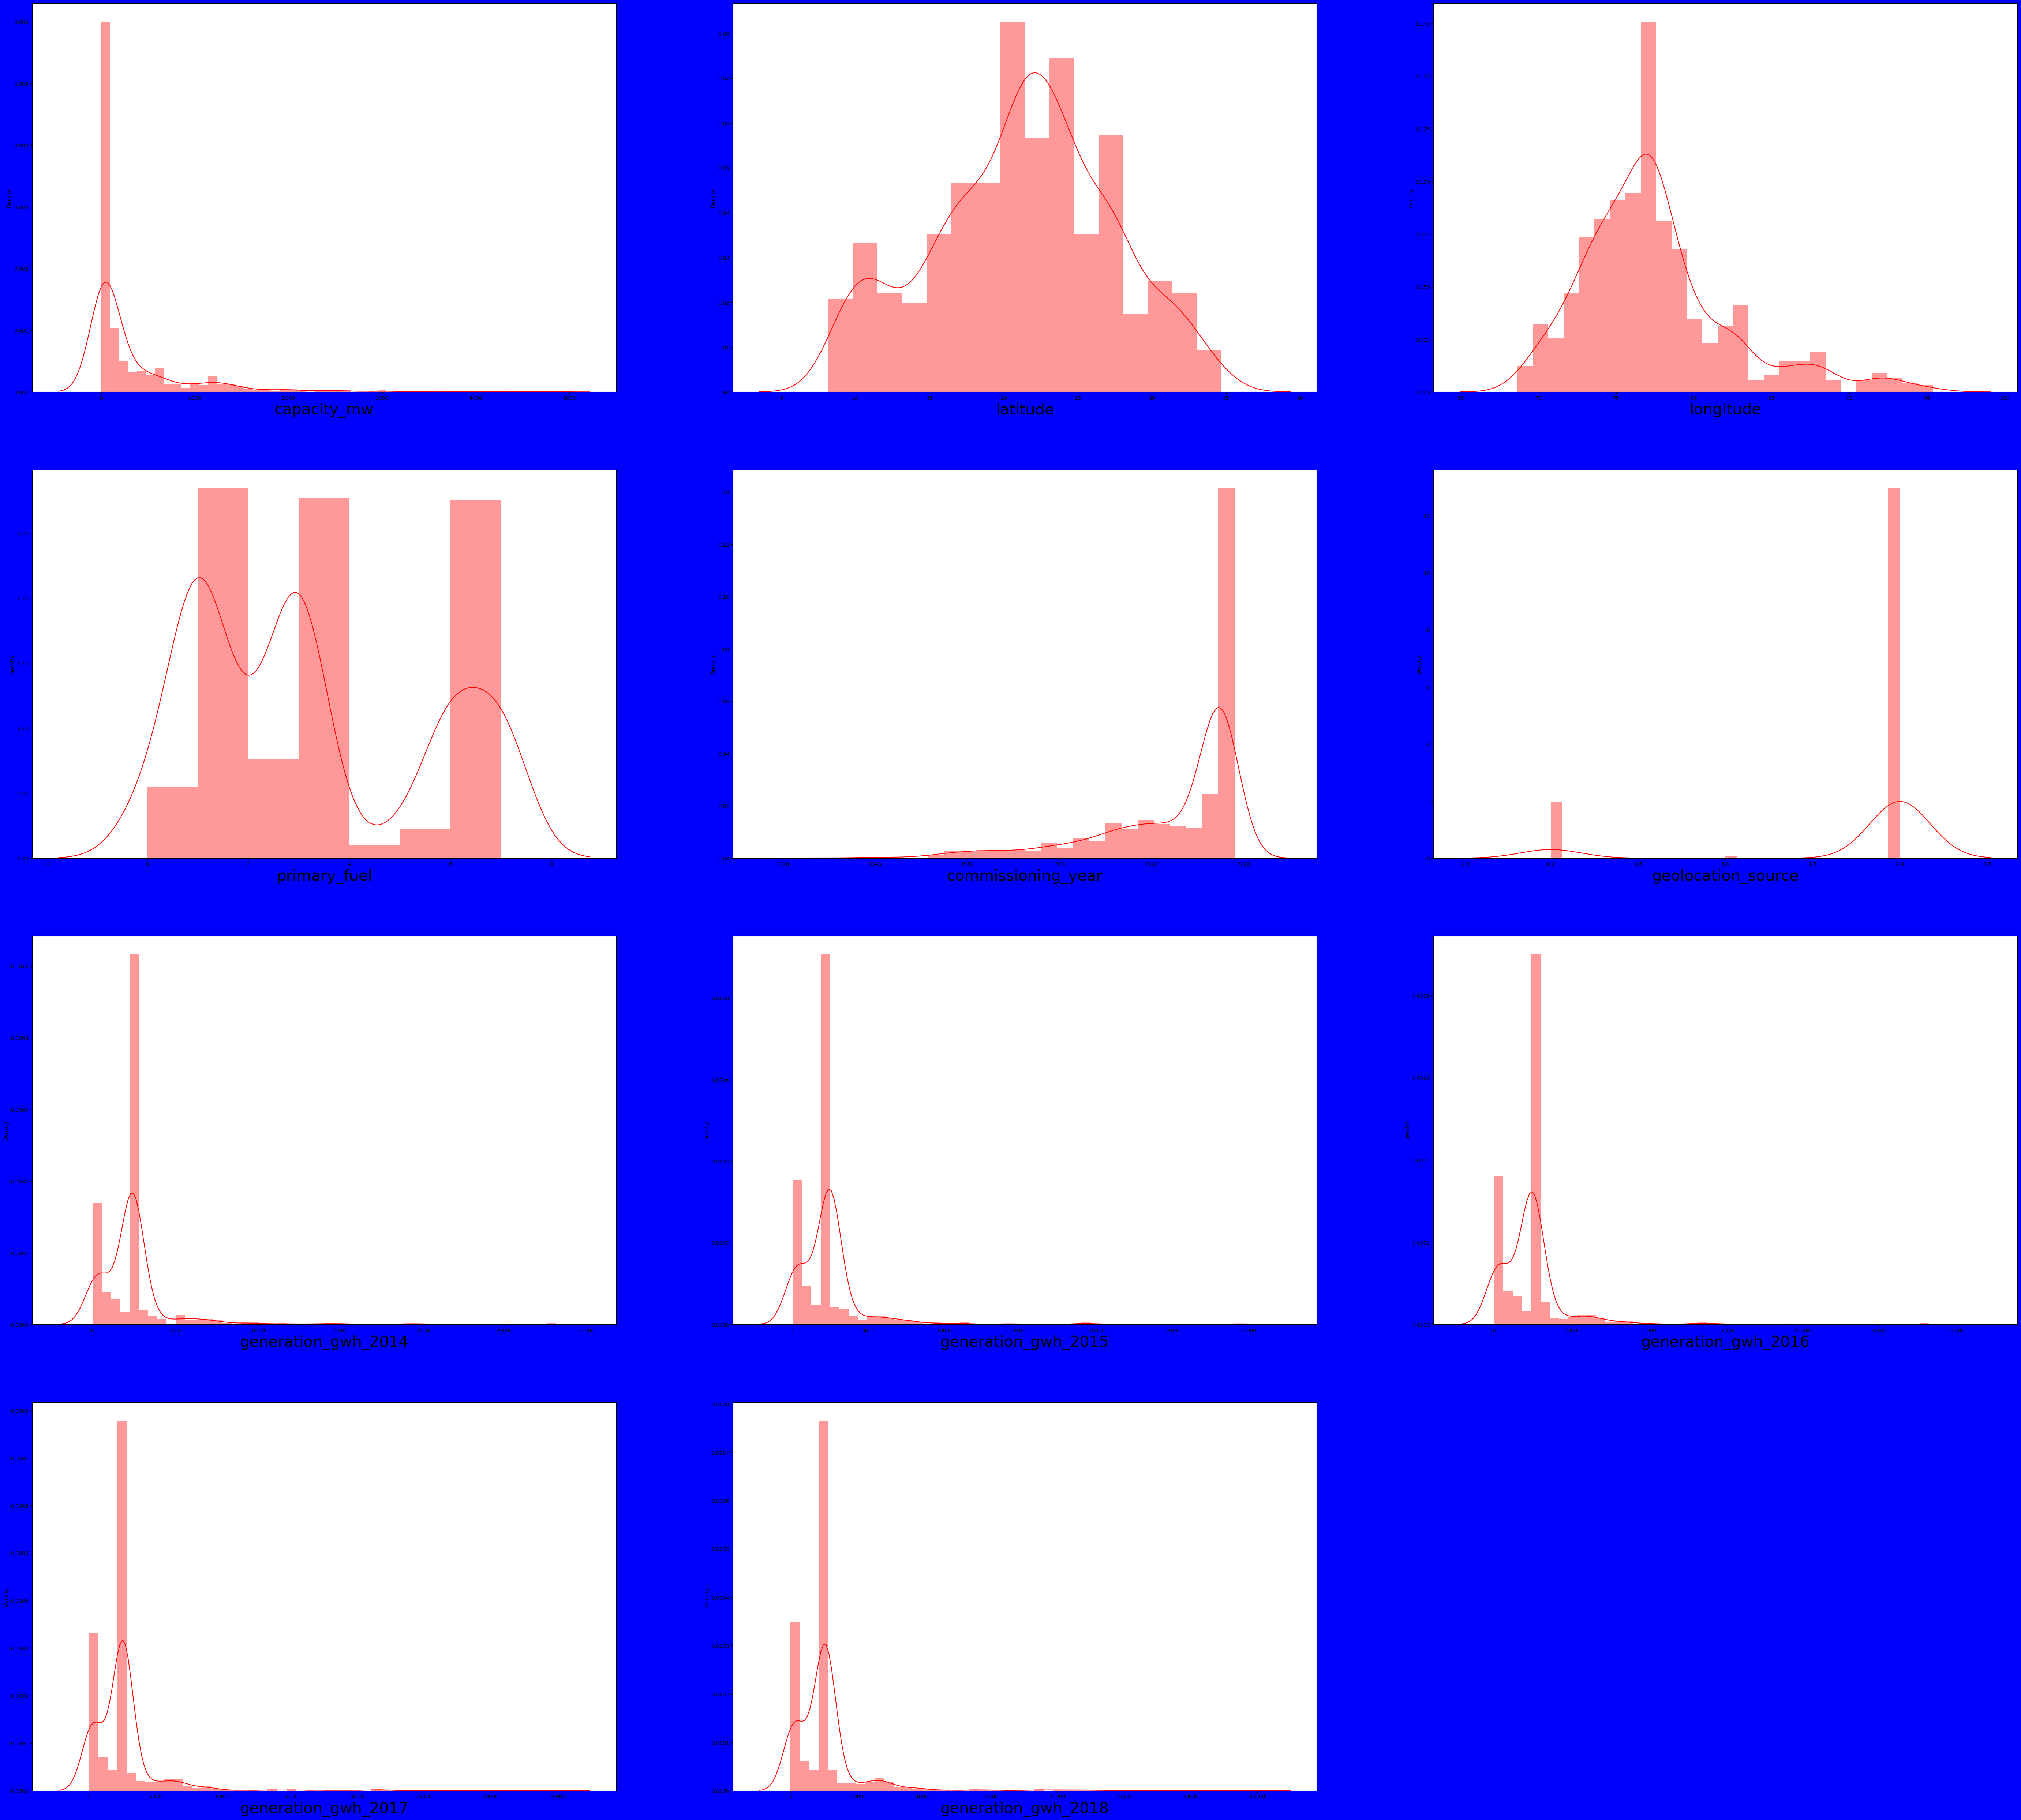

<Figure size 640x480 with 0 Axes>

In [58]:
plt.figure(figsize=(70,80),facecolor='blue',edgecolor='red')
plotnumber=1
for column in df:
    if plotnumber<=20:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(df[column],color='red')
        plt.xlabel(column,fontsize=30)
    plotnumber+=1
plt.show()
plt.tight_layout()


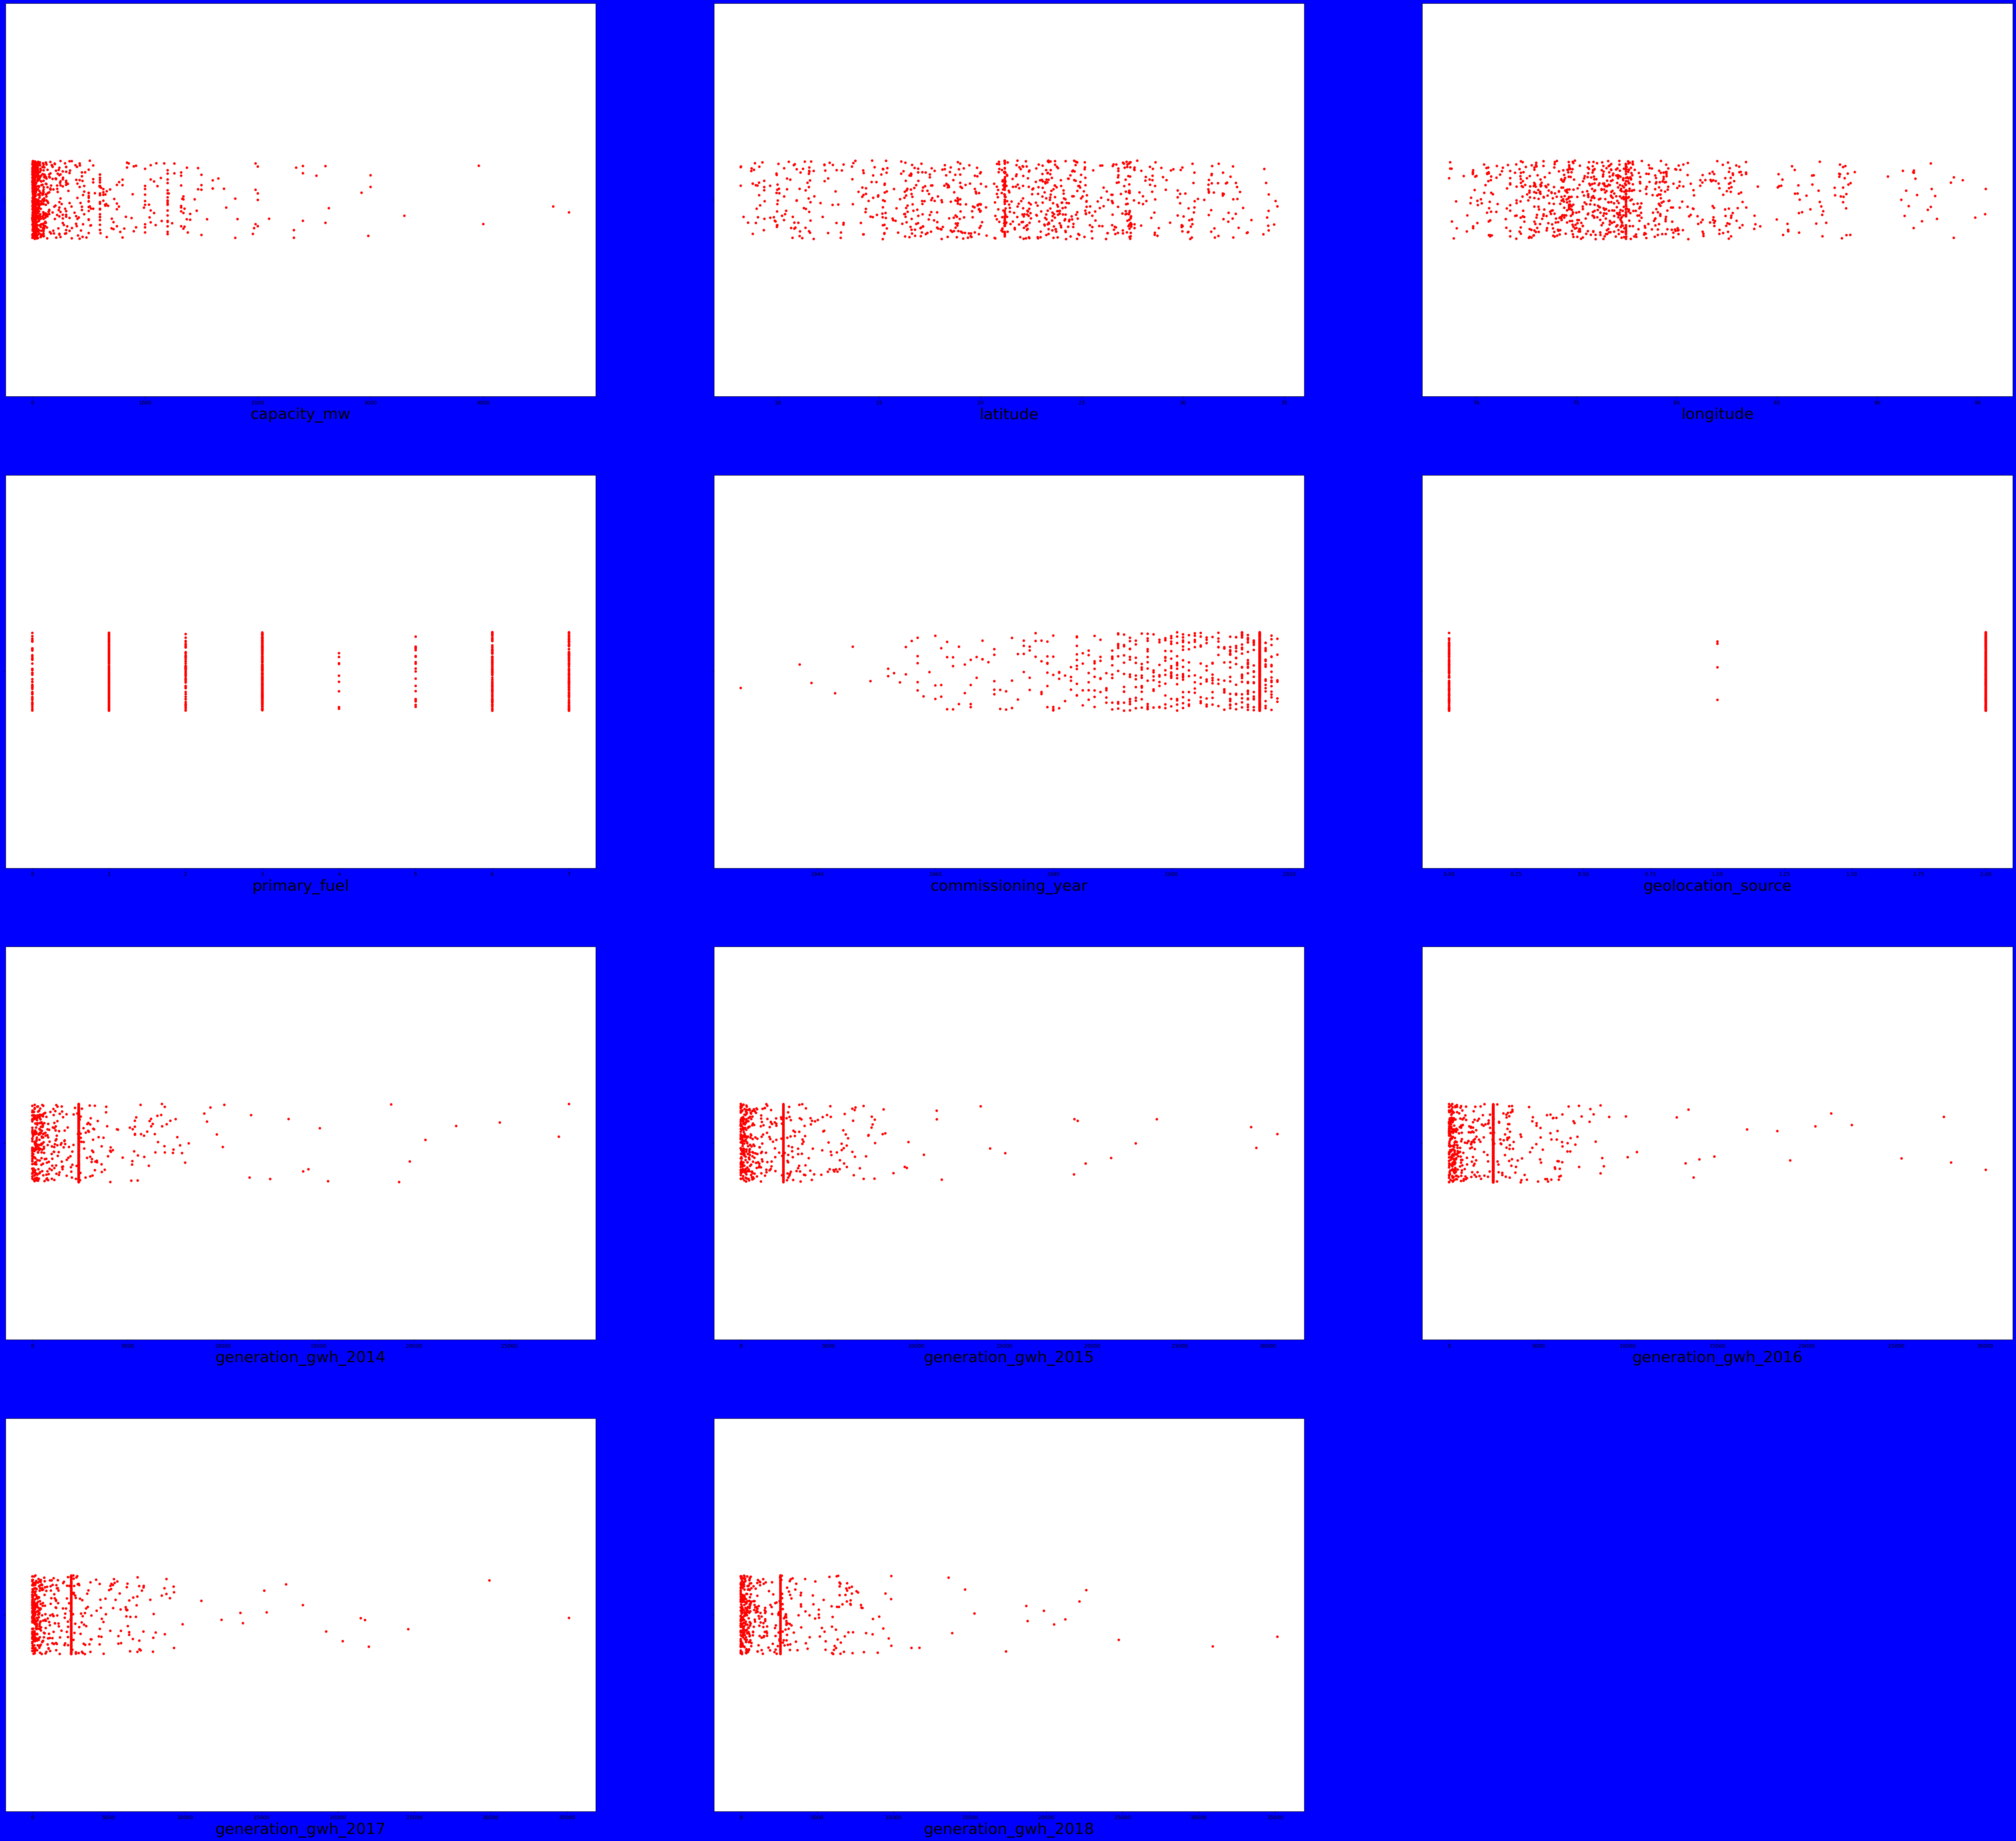

<Figure size 640x480 with 0 Axes>

In [59]:
plt.figure(figsize=(70,80),facecolor='blue',edgecolor='red')
plotnumber=1
for column in df:
    if plotnumber<=20:
        ax=plt.subplot(5,3,plotnumber)
        sns.stripplot(df[column],color='red')
        plt.xlabel(column,fontsize=30)
    plotnumber+=1
plt.show()
plt.tight_layout()


In [60]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'geolocation_source', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018'],
      dtype='object')

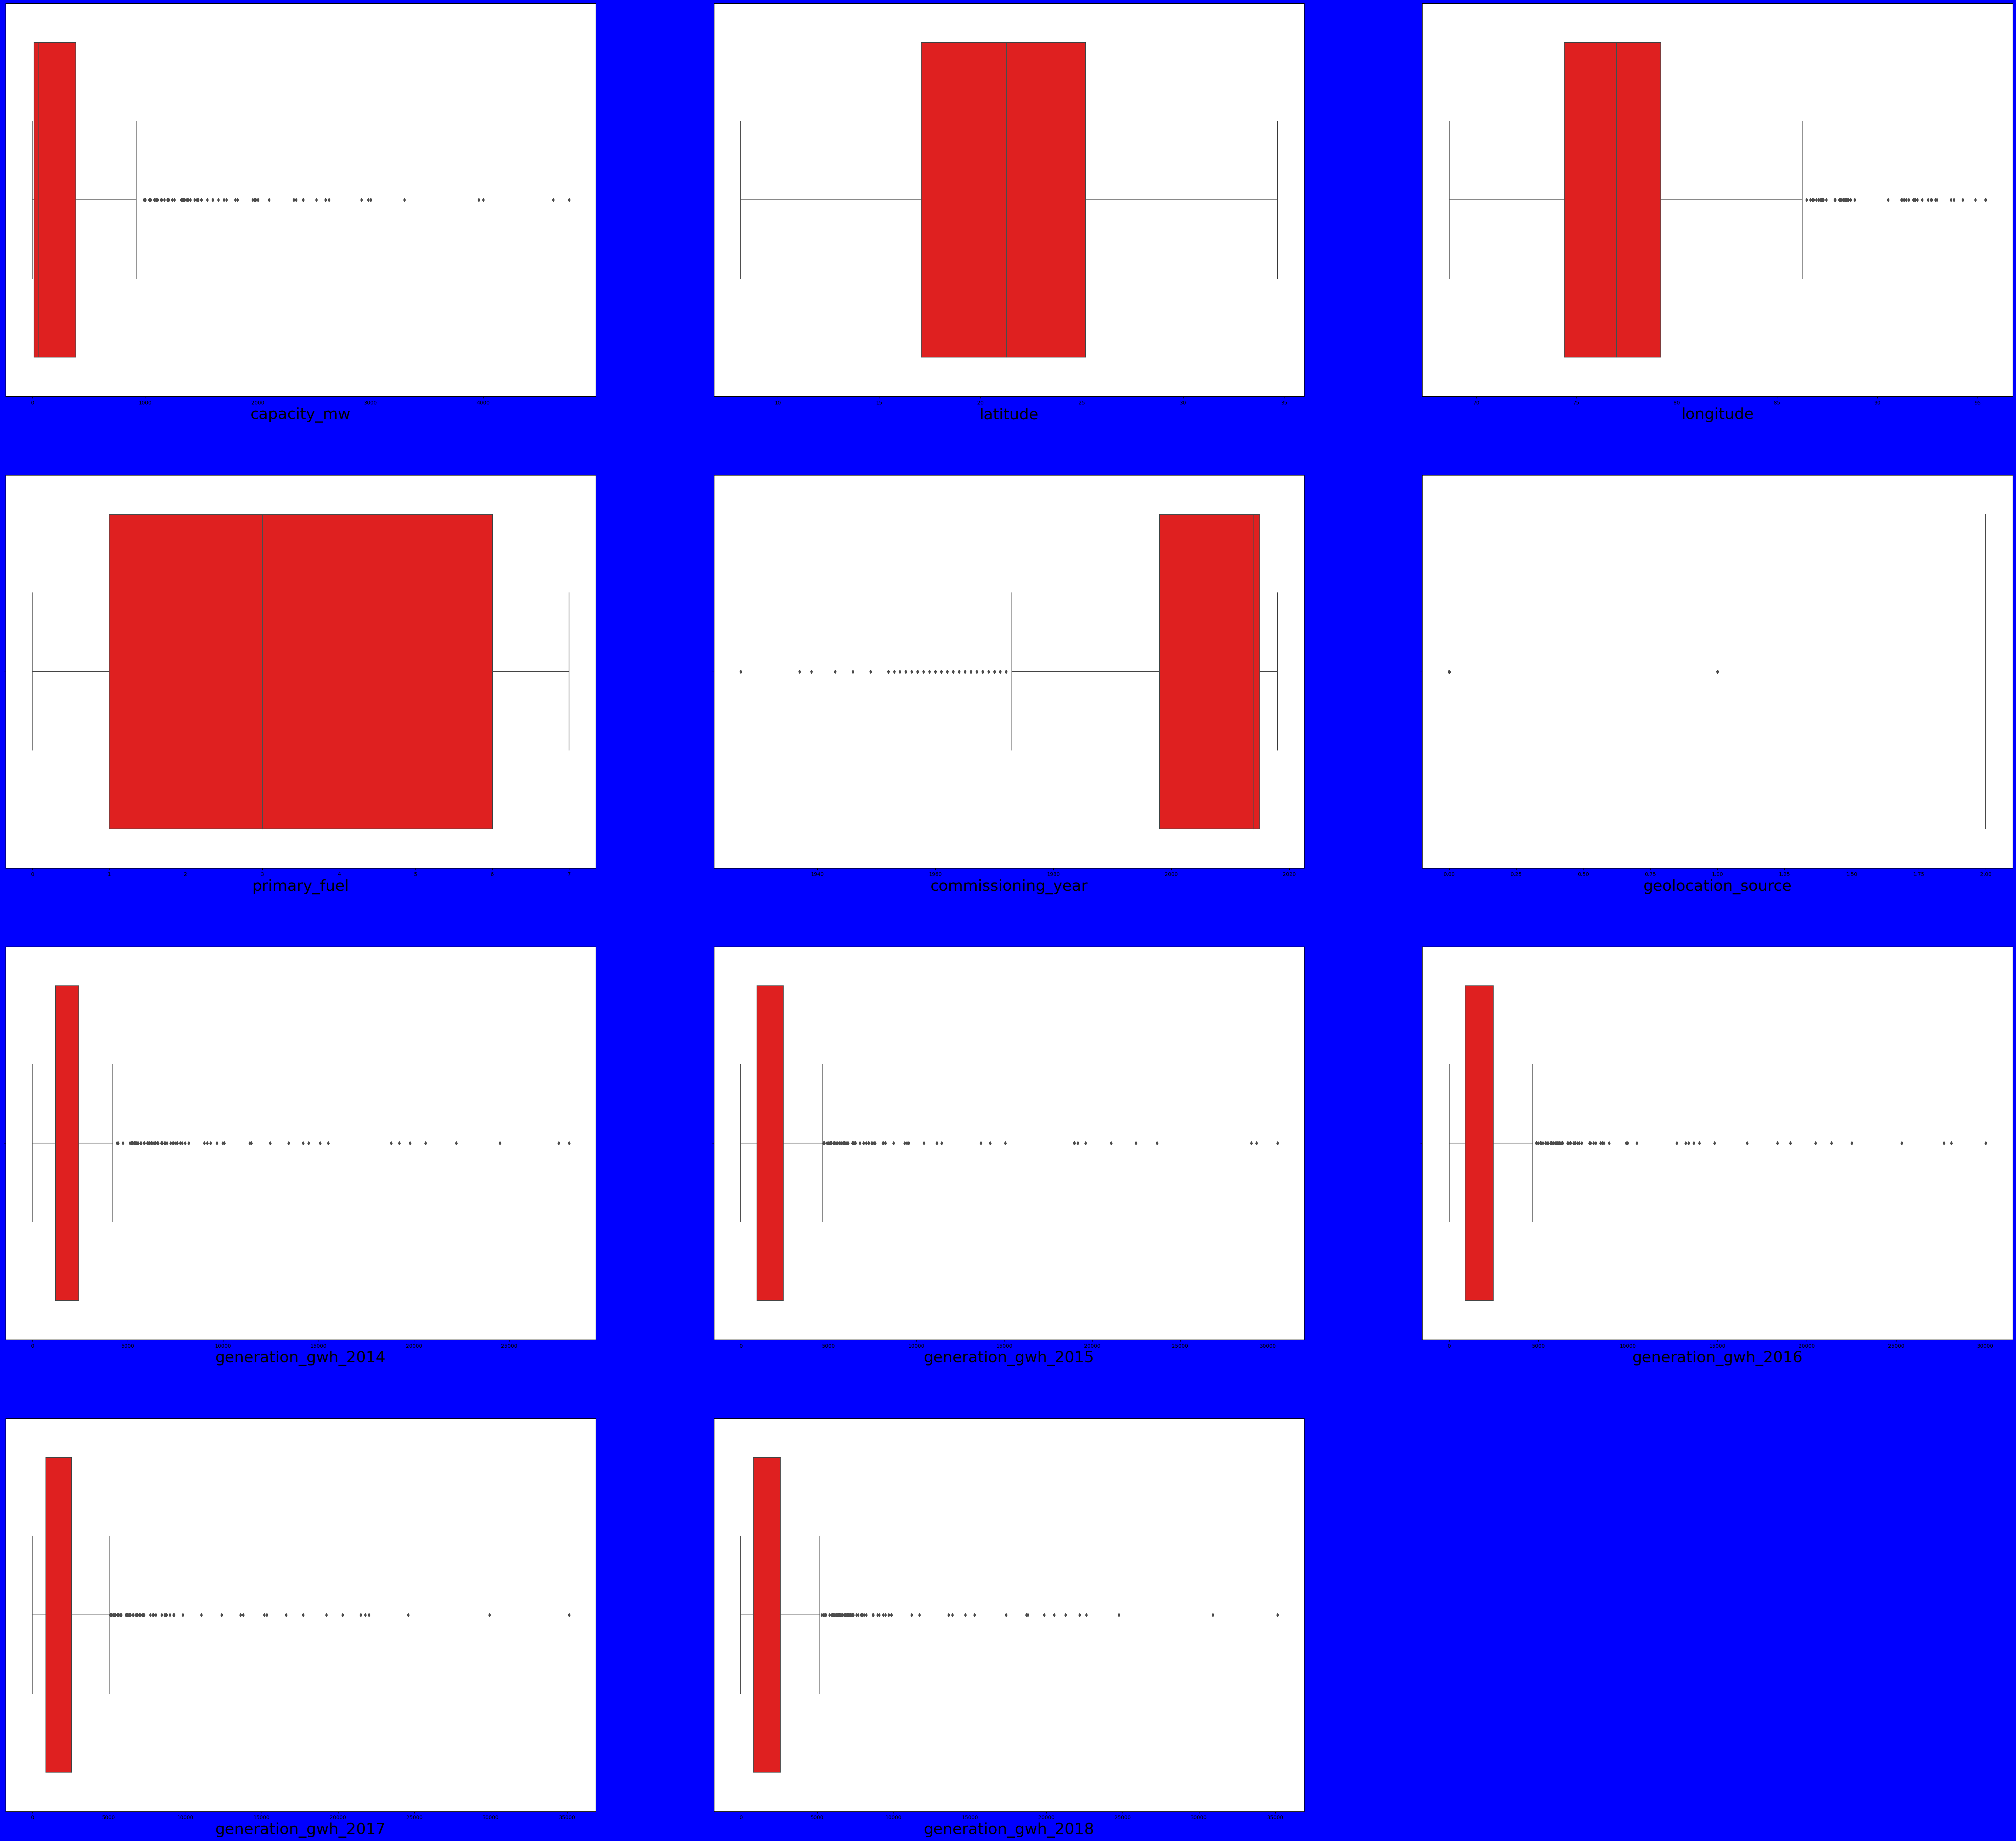

<Figure size 640x480 with 0 Axes>

In [61]:
plt.figure(figsize=(70,80),facecolor='blue',edgecolor='red')
plotnumber=1
for column in df:
    if plotnumber<=20:
        ax=plt.subplot(5,3,plotnumber)
        sns.boxplot(df[column],color='red')
        plt.xlabel(column,fontsize=30)
    plotnumber+=1
plt.show()
plt.tight_layout()

Here we can see that there are some outliers present in some of the columns. We will try to remove these outliers using z score  method. 

# BIVARIATE ANALYSIS

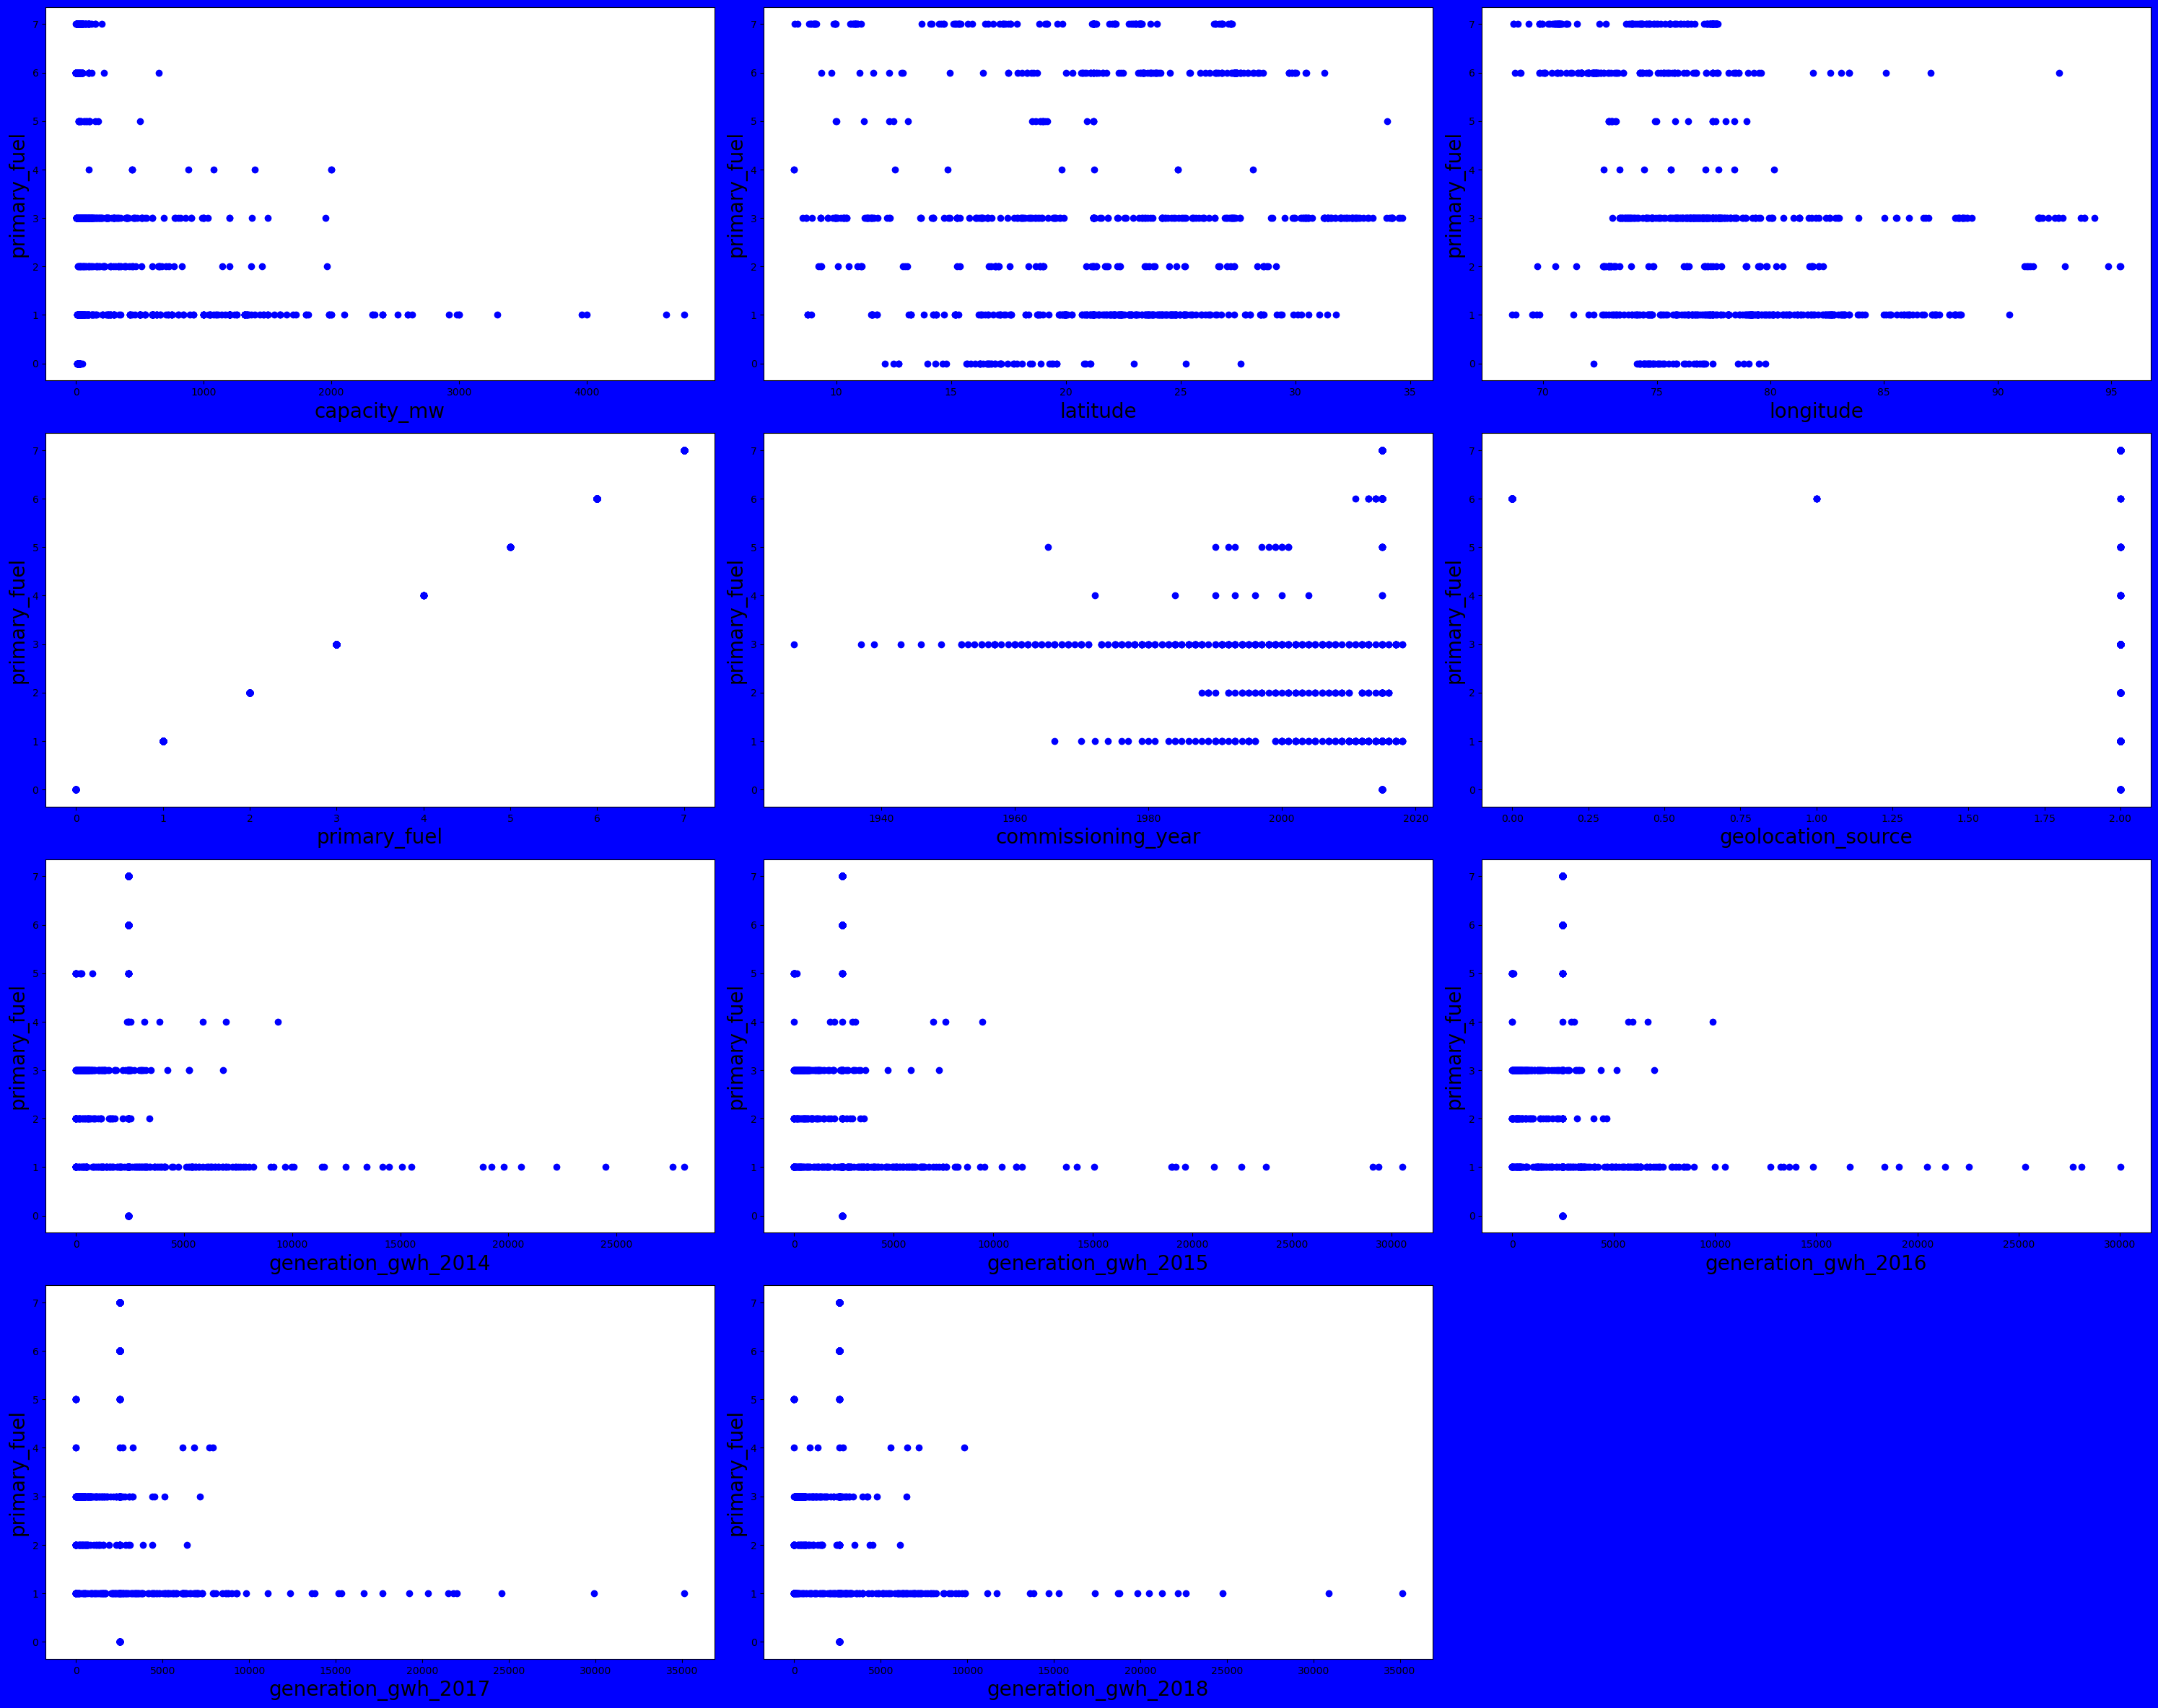

In [62]:
plt.figure(figsize = (30,35), facecolor = 'blue')
plotnumber = 1
for column in df:
    if plotnumber <=25:
        ax = plt.subplot(6,3,plotnumber)
        plt.scatter(df[column],df['primary_fuel'], color='b')
        plt.xlabel(column,fontsize=20)
        plt.ylabel('primary_fuel', fontsize=20)
    plotnumber += 1
plt.tight_layout()

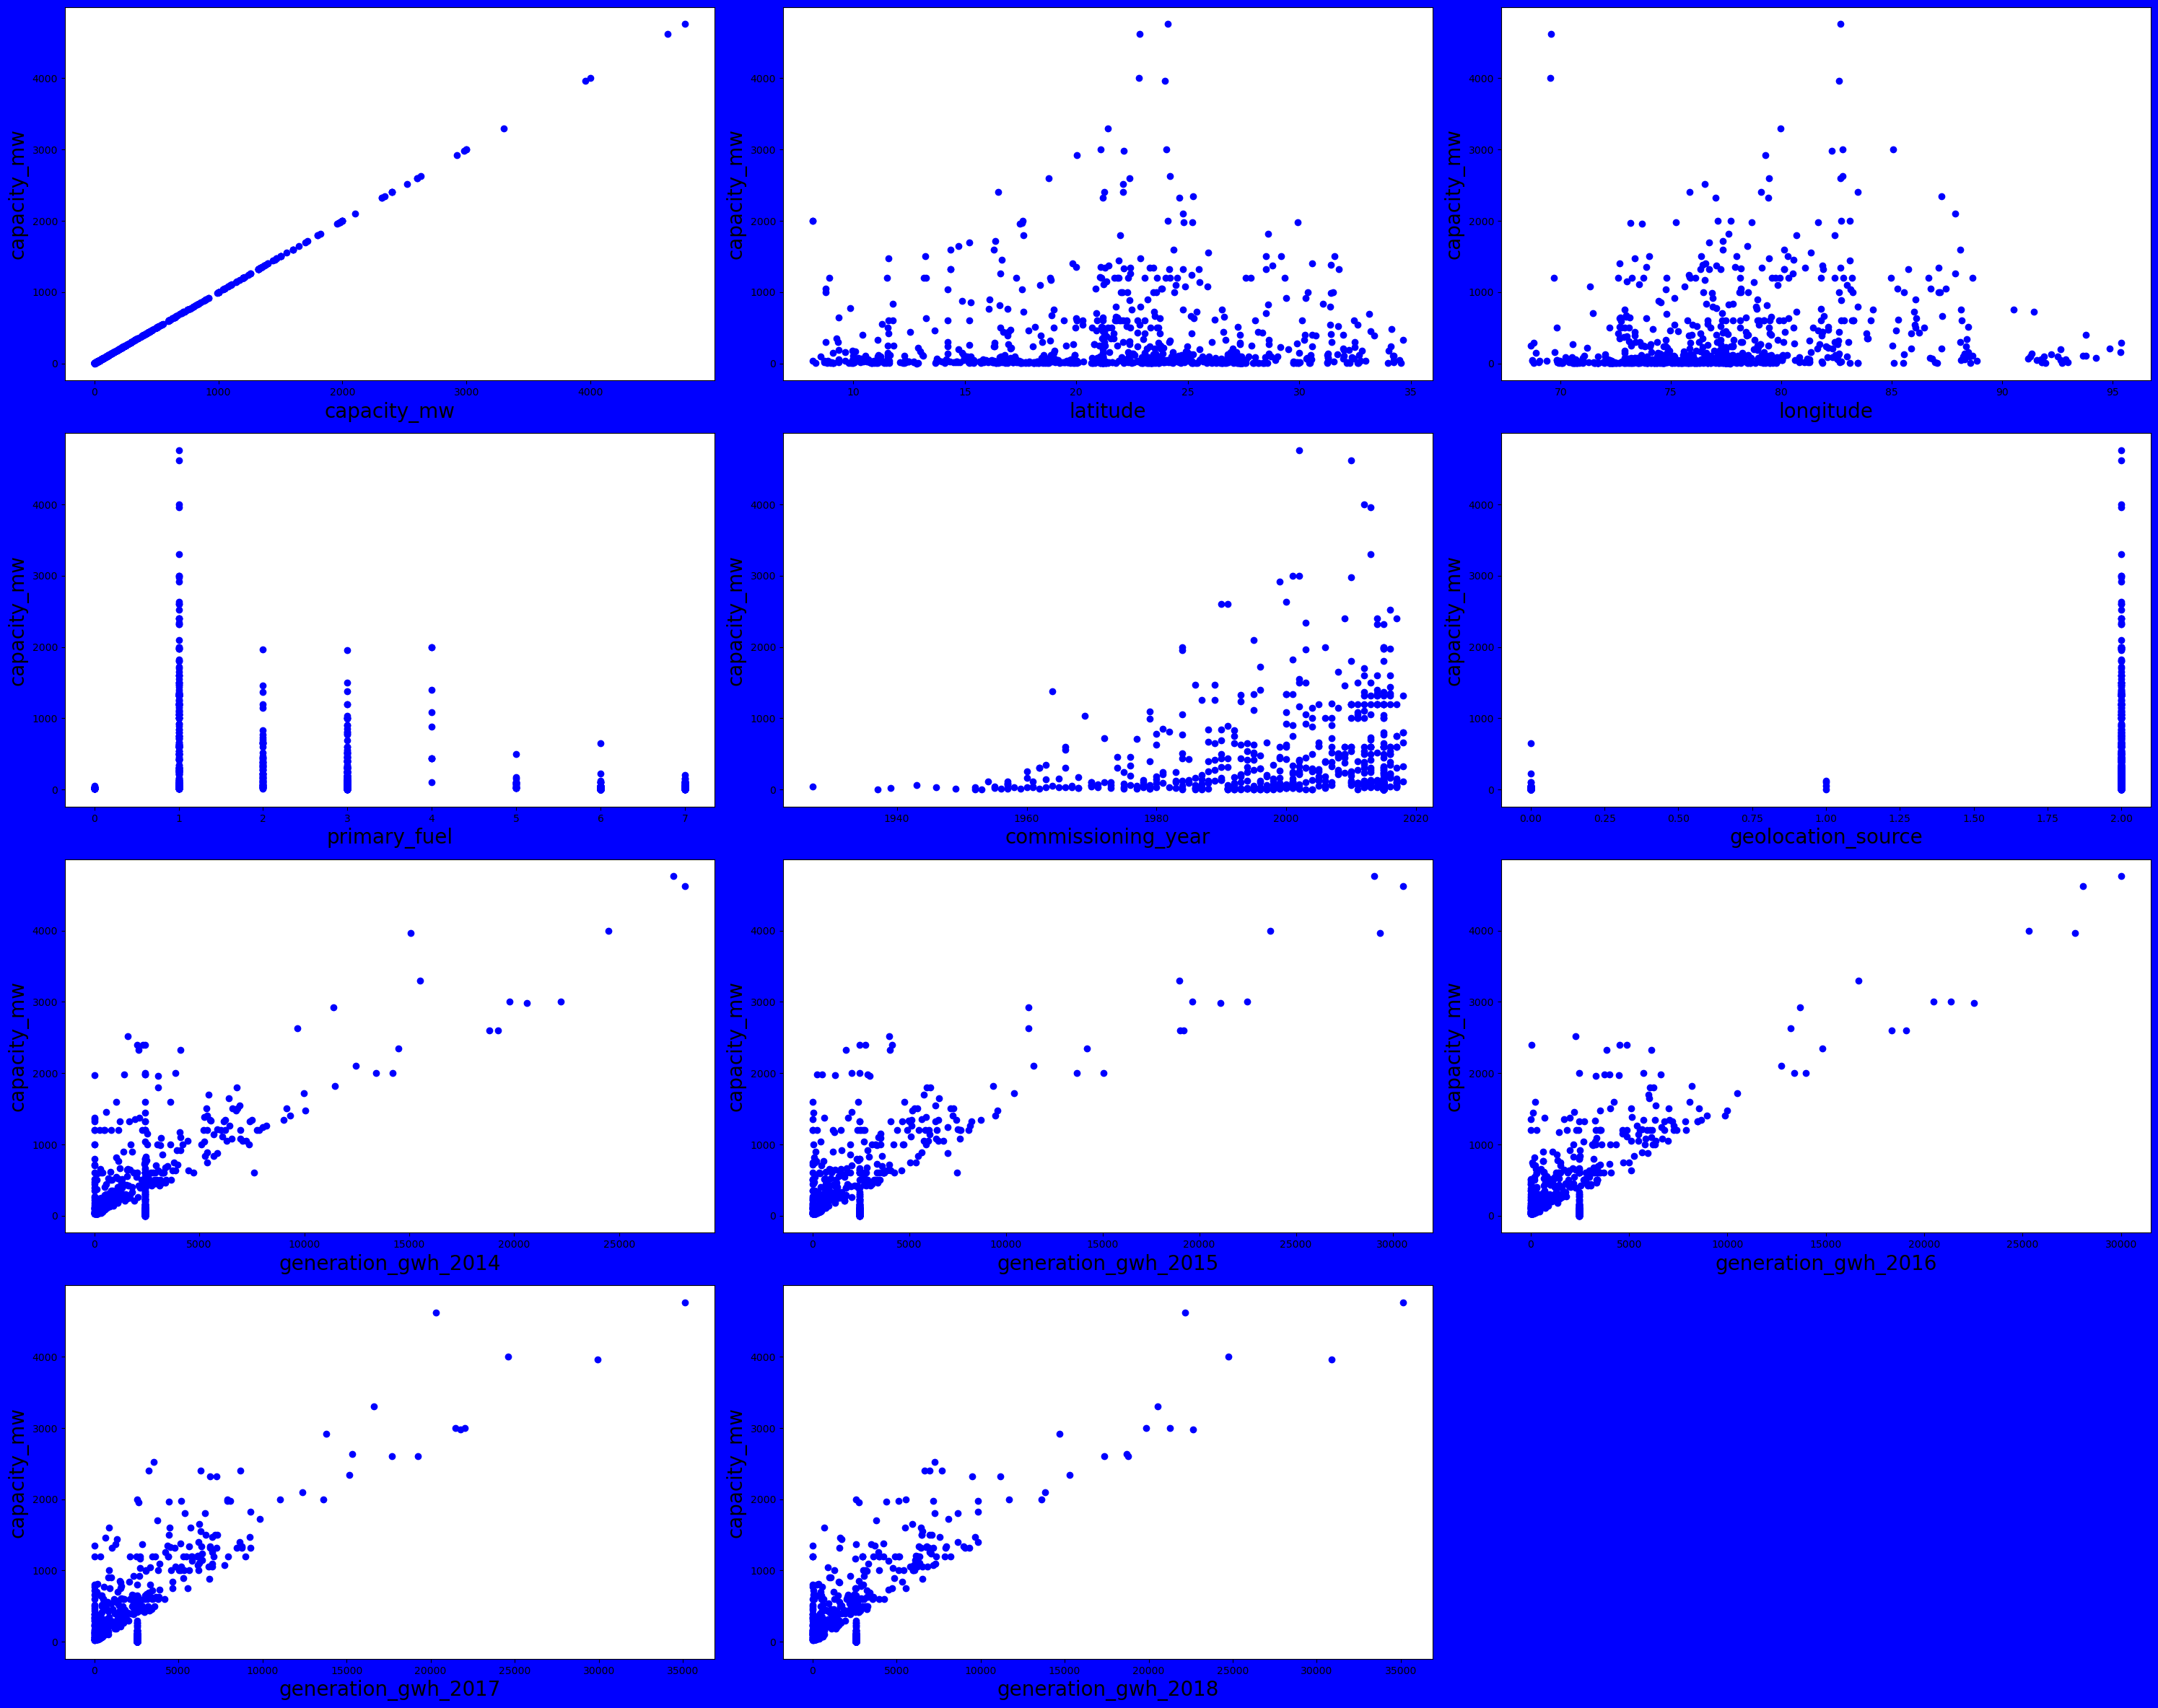

In [63]:
plt.figure(figsize = (30,35), facecolor = 'blue')
plotnumber = 1
for column in df:
    if plotnumber <=25:
        ax = plt.subplot(6,3,plotnumber)
        plt.scatter(df[column],df['capacity_mw'], color='b')
        plt.xlabel(column,fontsize=20)
        plt.ylabel('capacity_mw', fontsize=20)
    plotnumber += 1
plt.tight_layout()

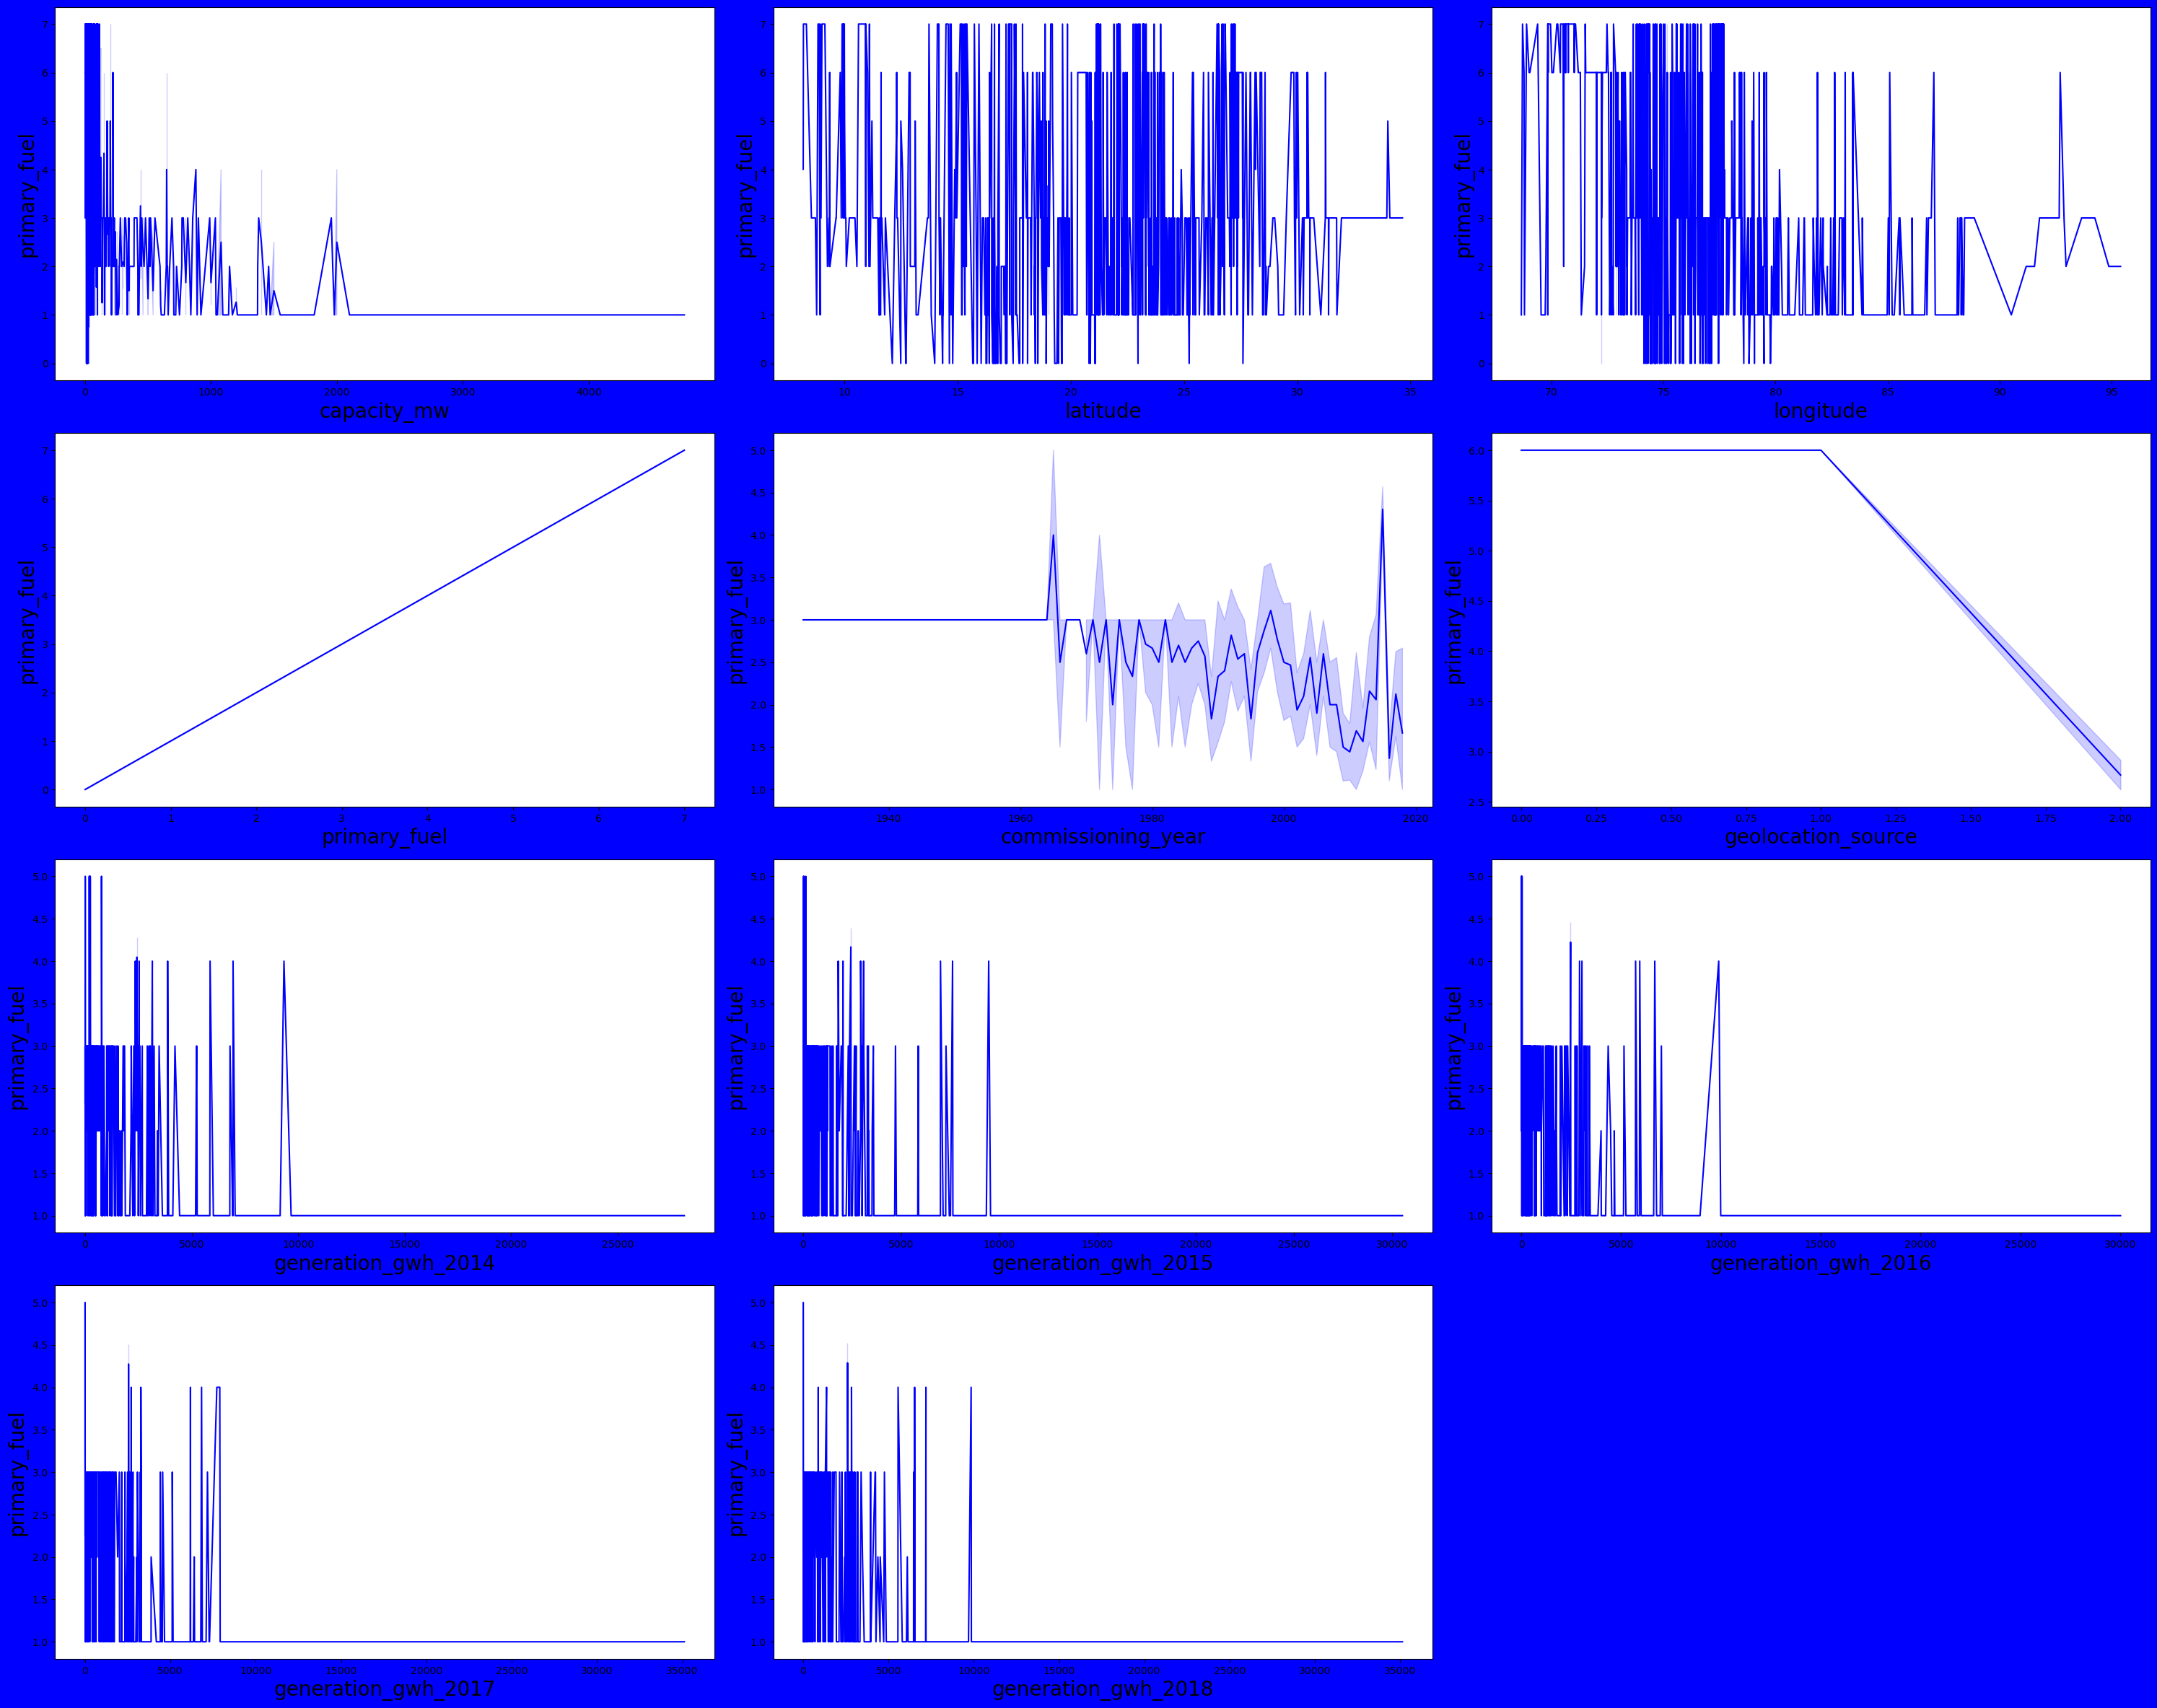

In [64]:
plt.figure(figsize = (30,35), facecolor = 'blue')
plotnumber = 1
for column in df:
    if plotnumber <=25:
        ax = plt.subplot(6,3,plotnumber)
        sns.lineplot(df[column],df['primary_fuel'], color='b')
        plt.xlabel(column,fontsize=20)
        plt.ylabel('primary_fuel', fontsize=20)
    plotnumber += 1
plt.tight_layout()

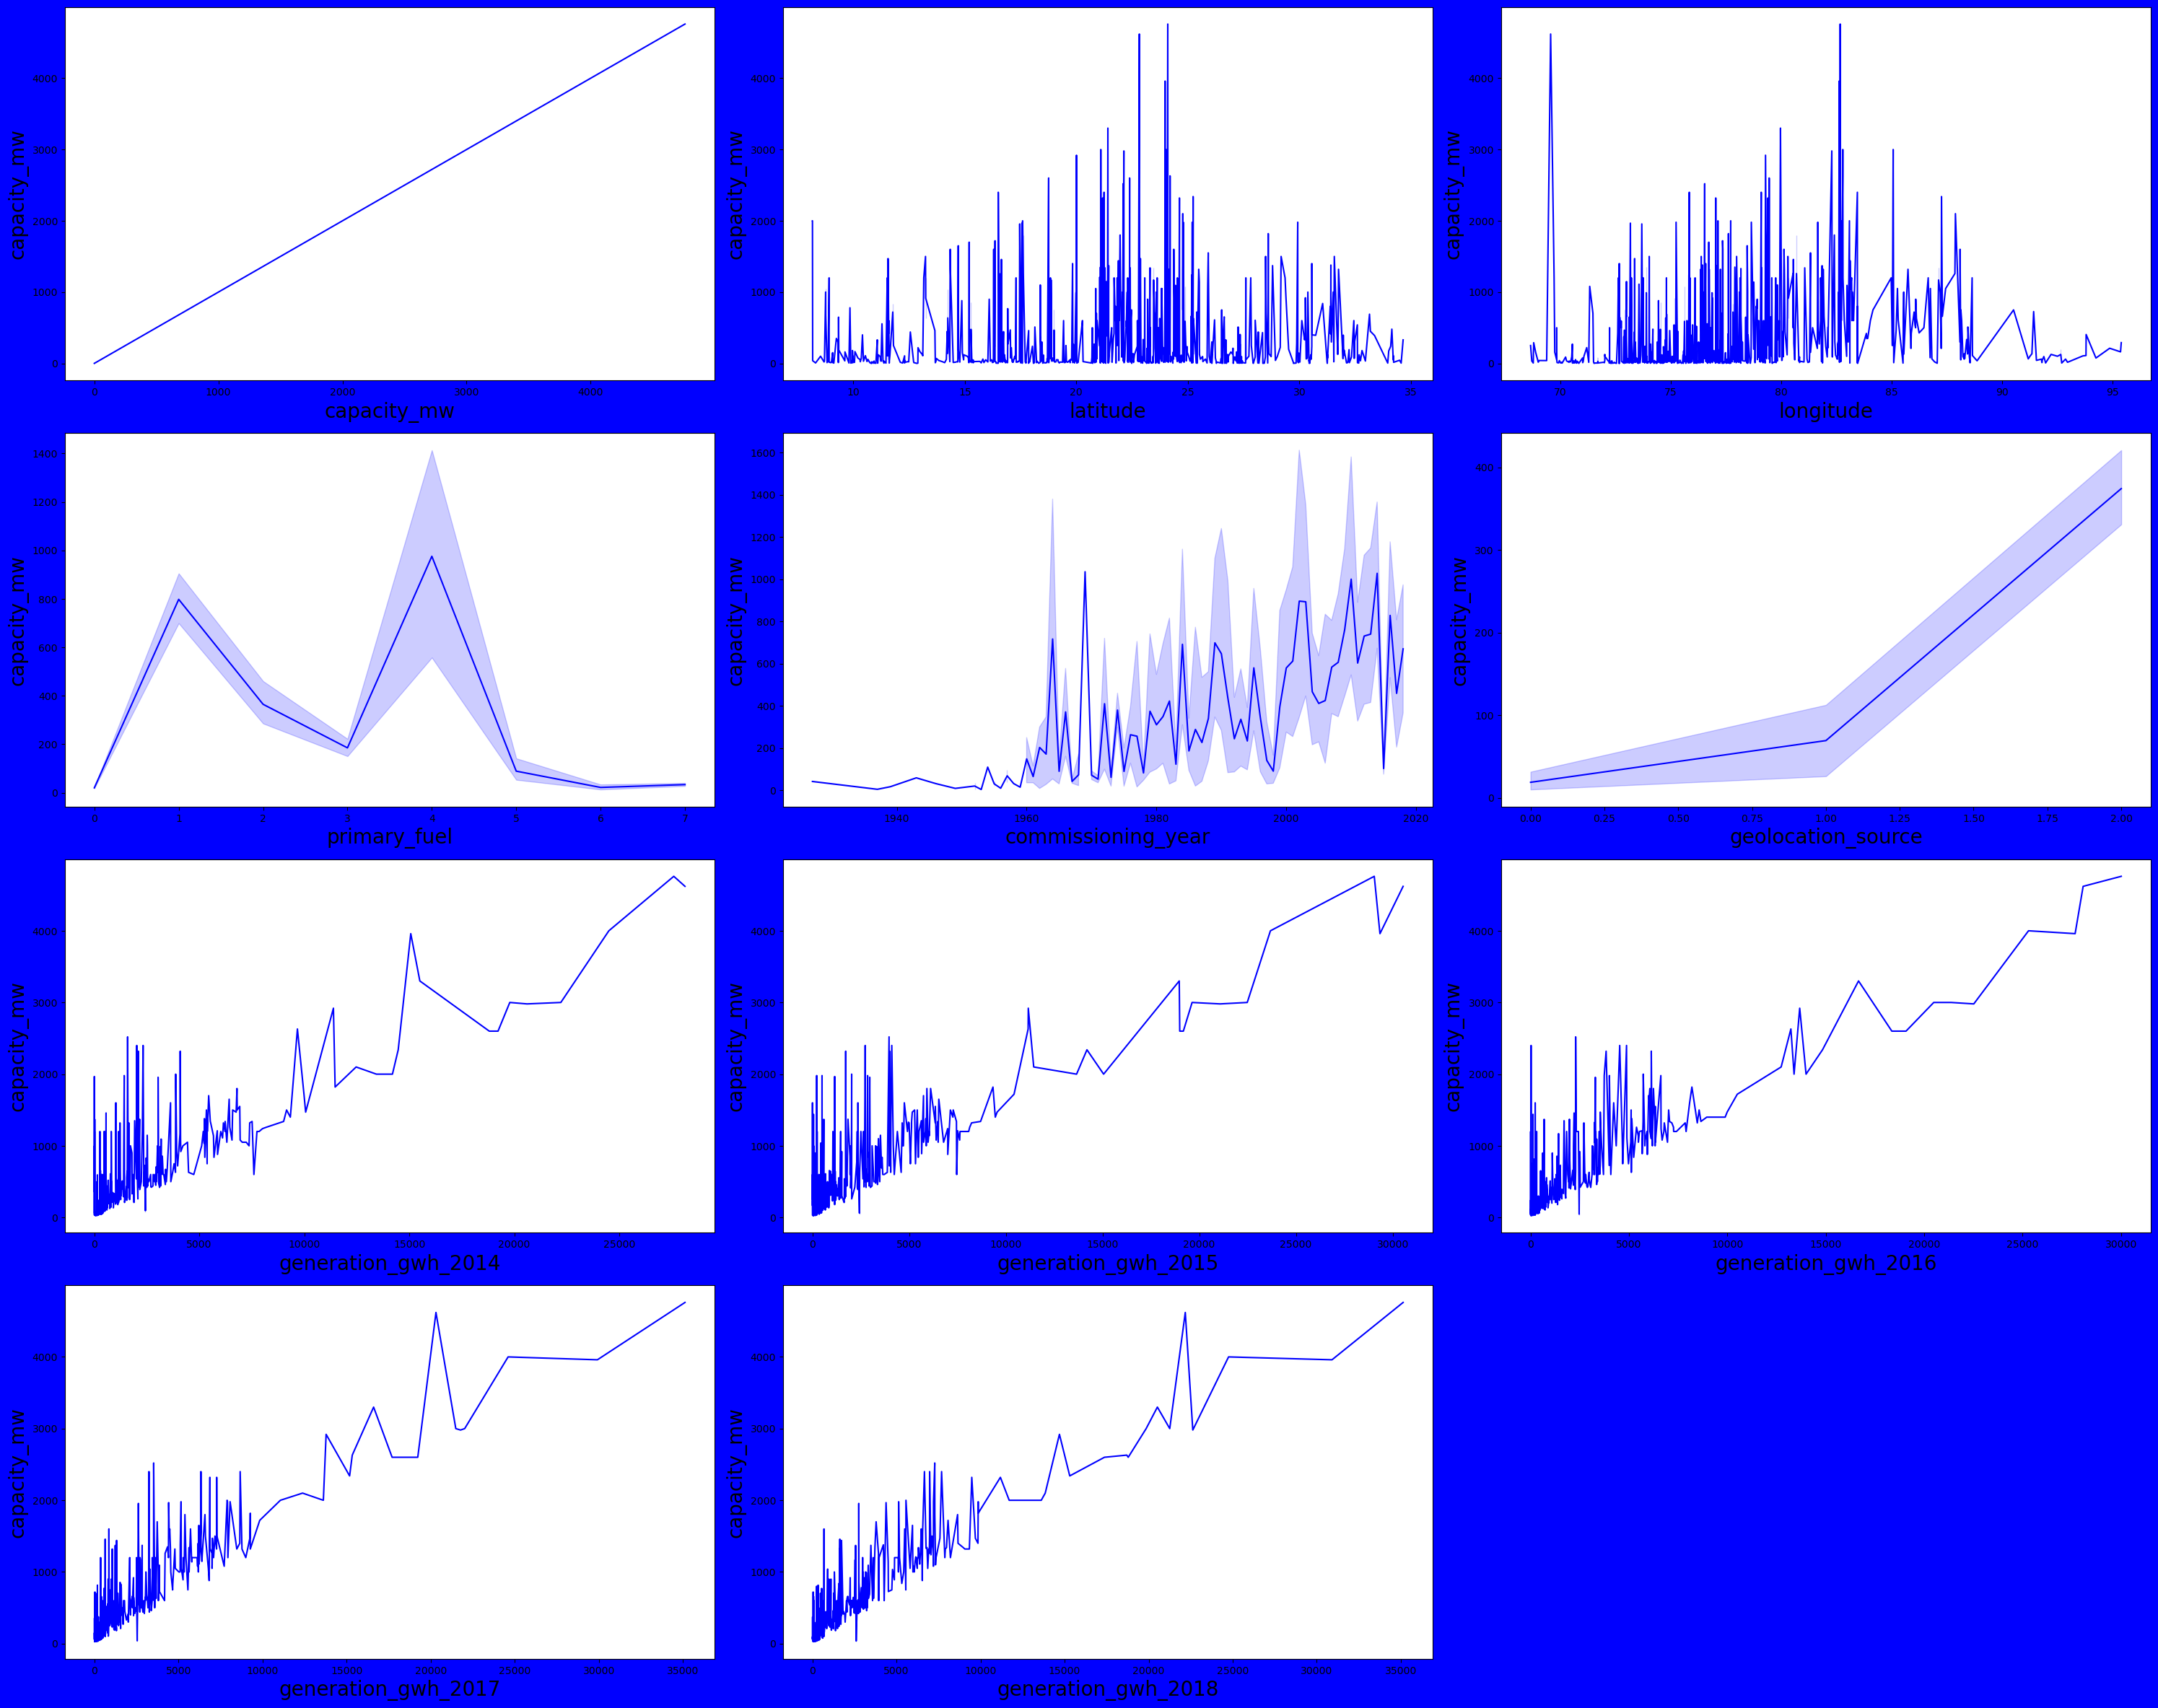

In [65]:
plt.figure(figsize = (30,35), facecolor = 'blue')
plotnumber = 1
for column in df:
    if plotnumber <=25:
        ax = plt.subplot(6,3,plotnumber)
        sns.lineplot(df[column],df['capacity_mw'], color='b')
        plt.xlabel(column,fontsize=20)
        plt.ylabel('capacity_mw', fontsize=20)
    plotnumber += 1
plt.tight_layout()

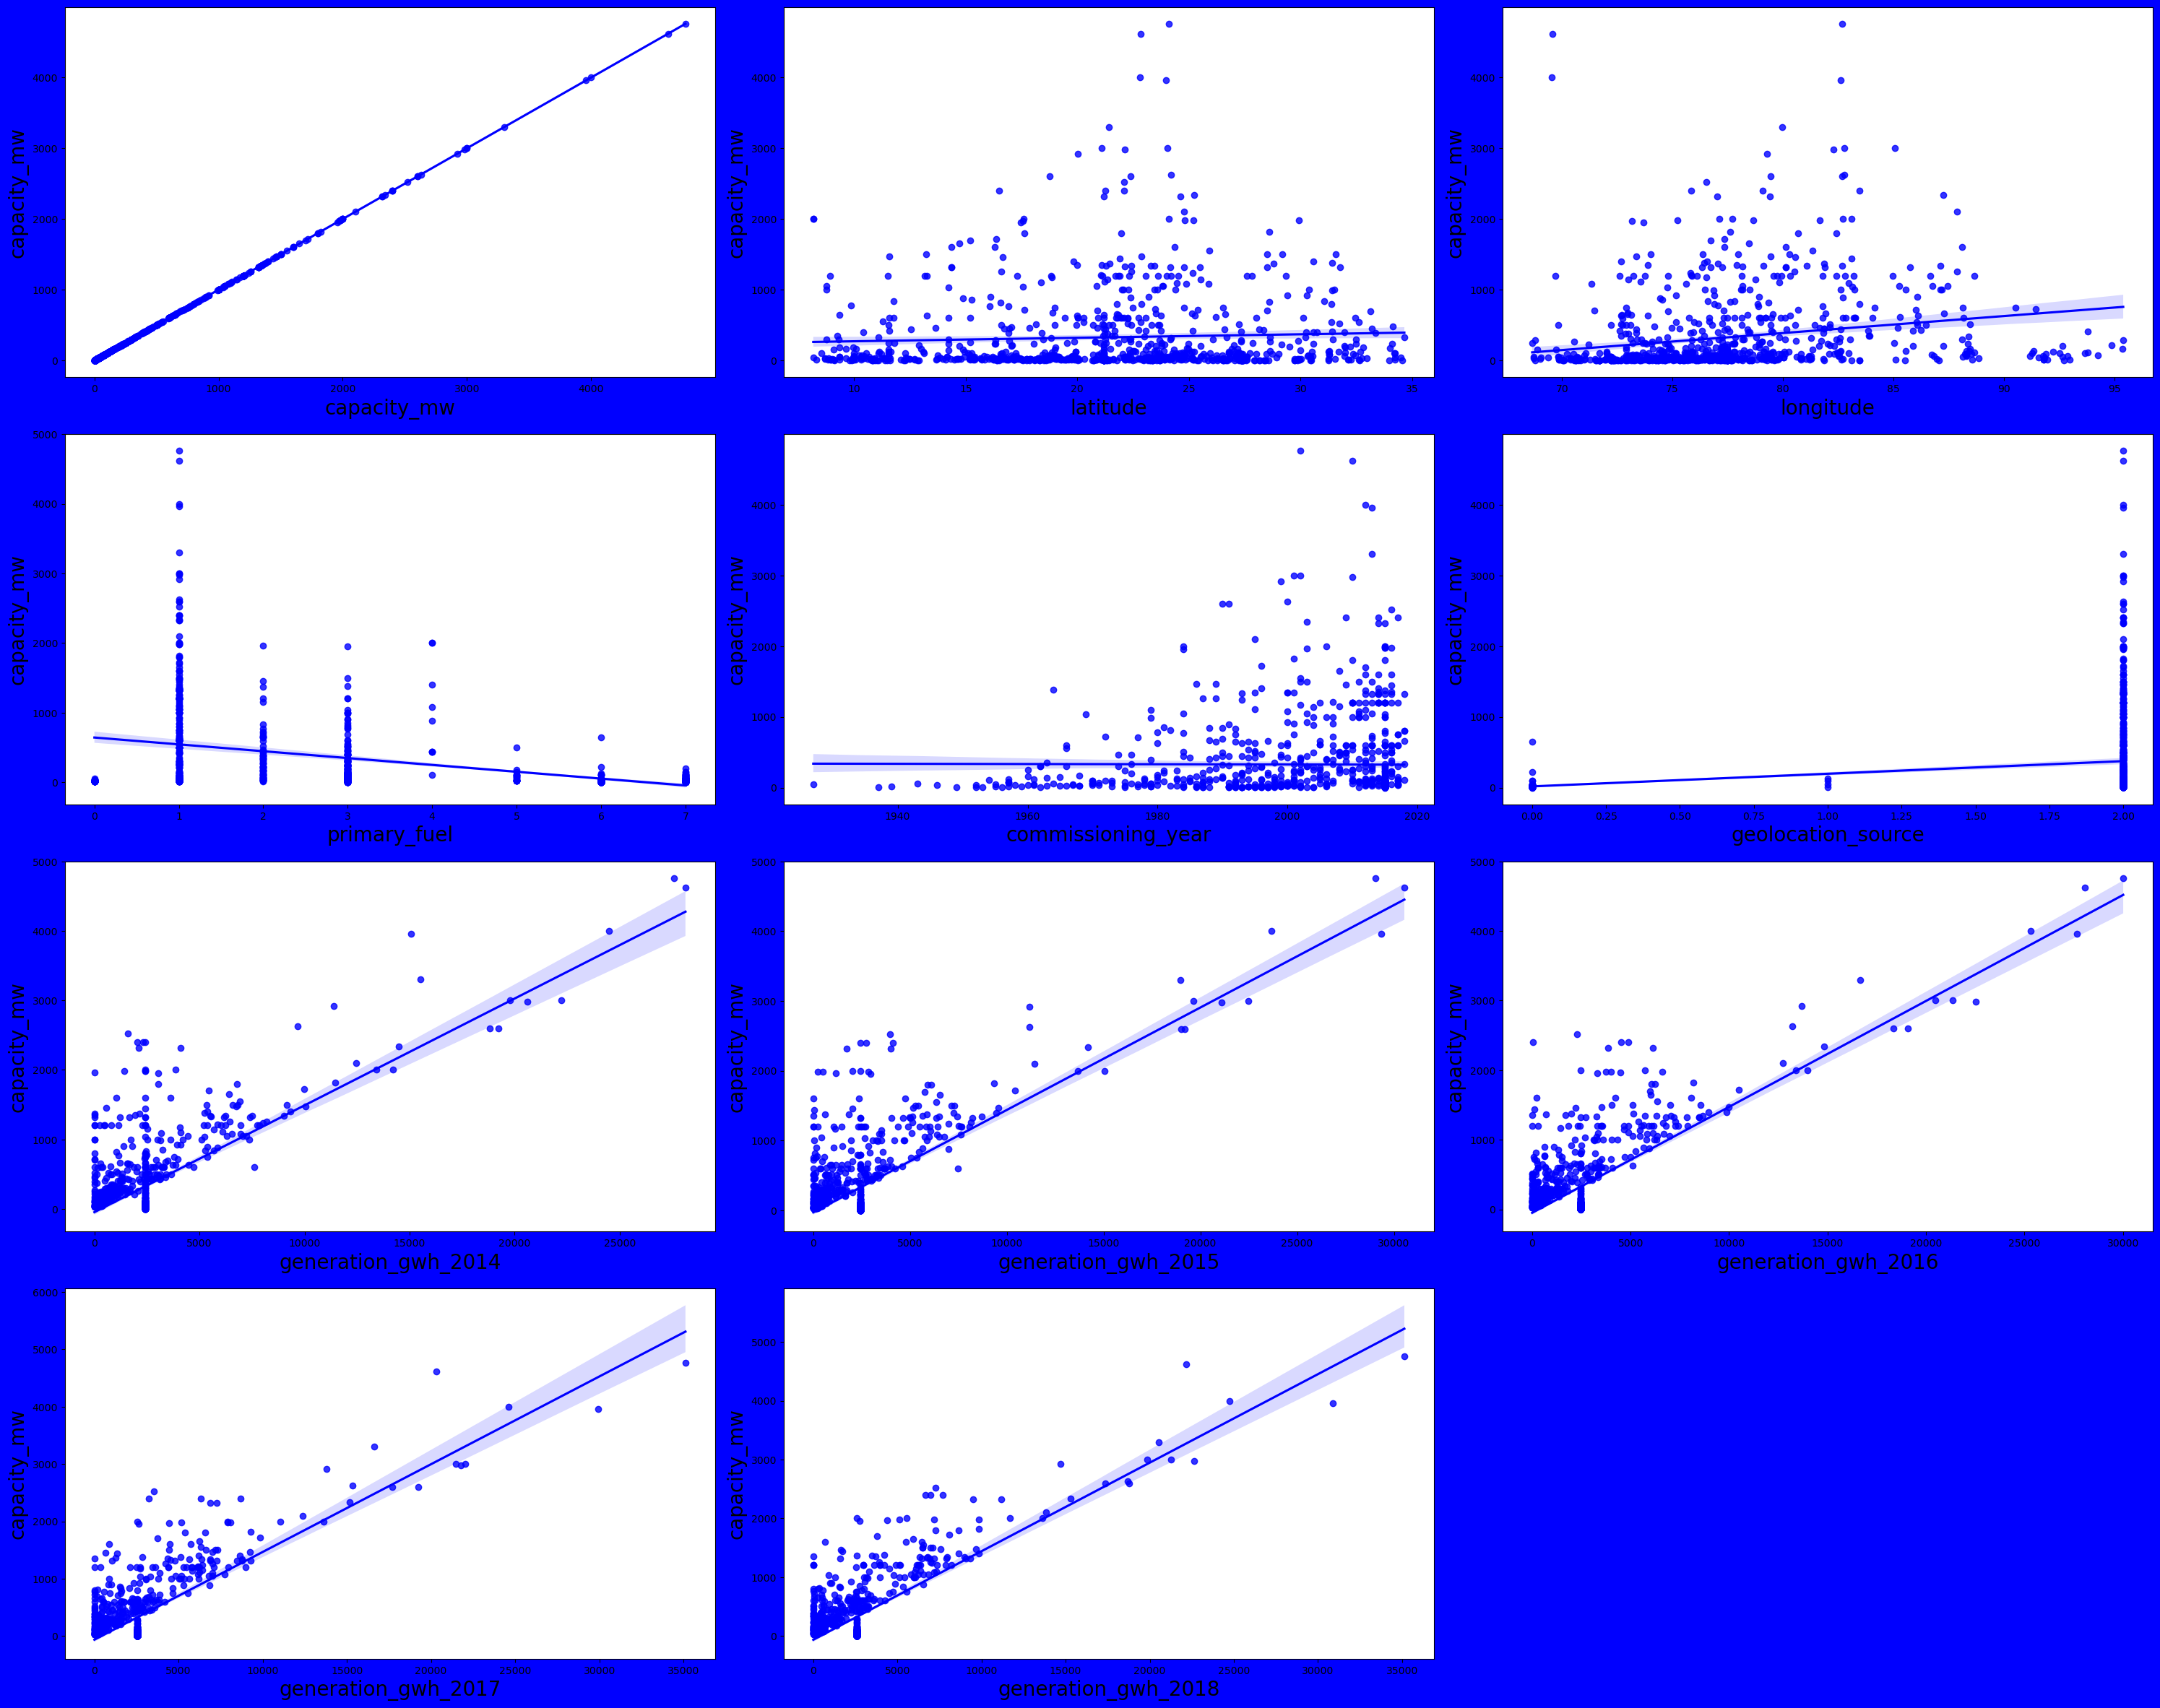

In [66]:
plt.figure(figsize = (30,35), facecolor = 'blue')
plotnumber = 1
for column in df:
    if plotnumber <=25:
        ax = plt.subplot(6,3,plotnumber)
        sns.regplot(df[column],df['capacity_mw'], color='b')
        plt.xlabel(column,fontsize=20)
        plt.ylabel('capacity_mw', fontsize=20)
    plotnumber += 1
plt.tight_layout()

From this we can see there are some linear relationship between target variable and features.

# MULTIVARIATE ANALYSIS

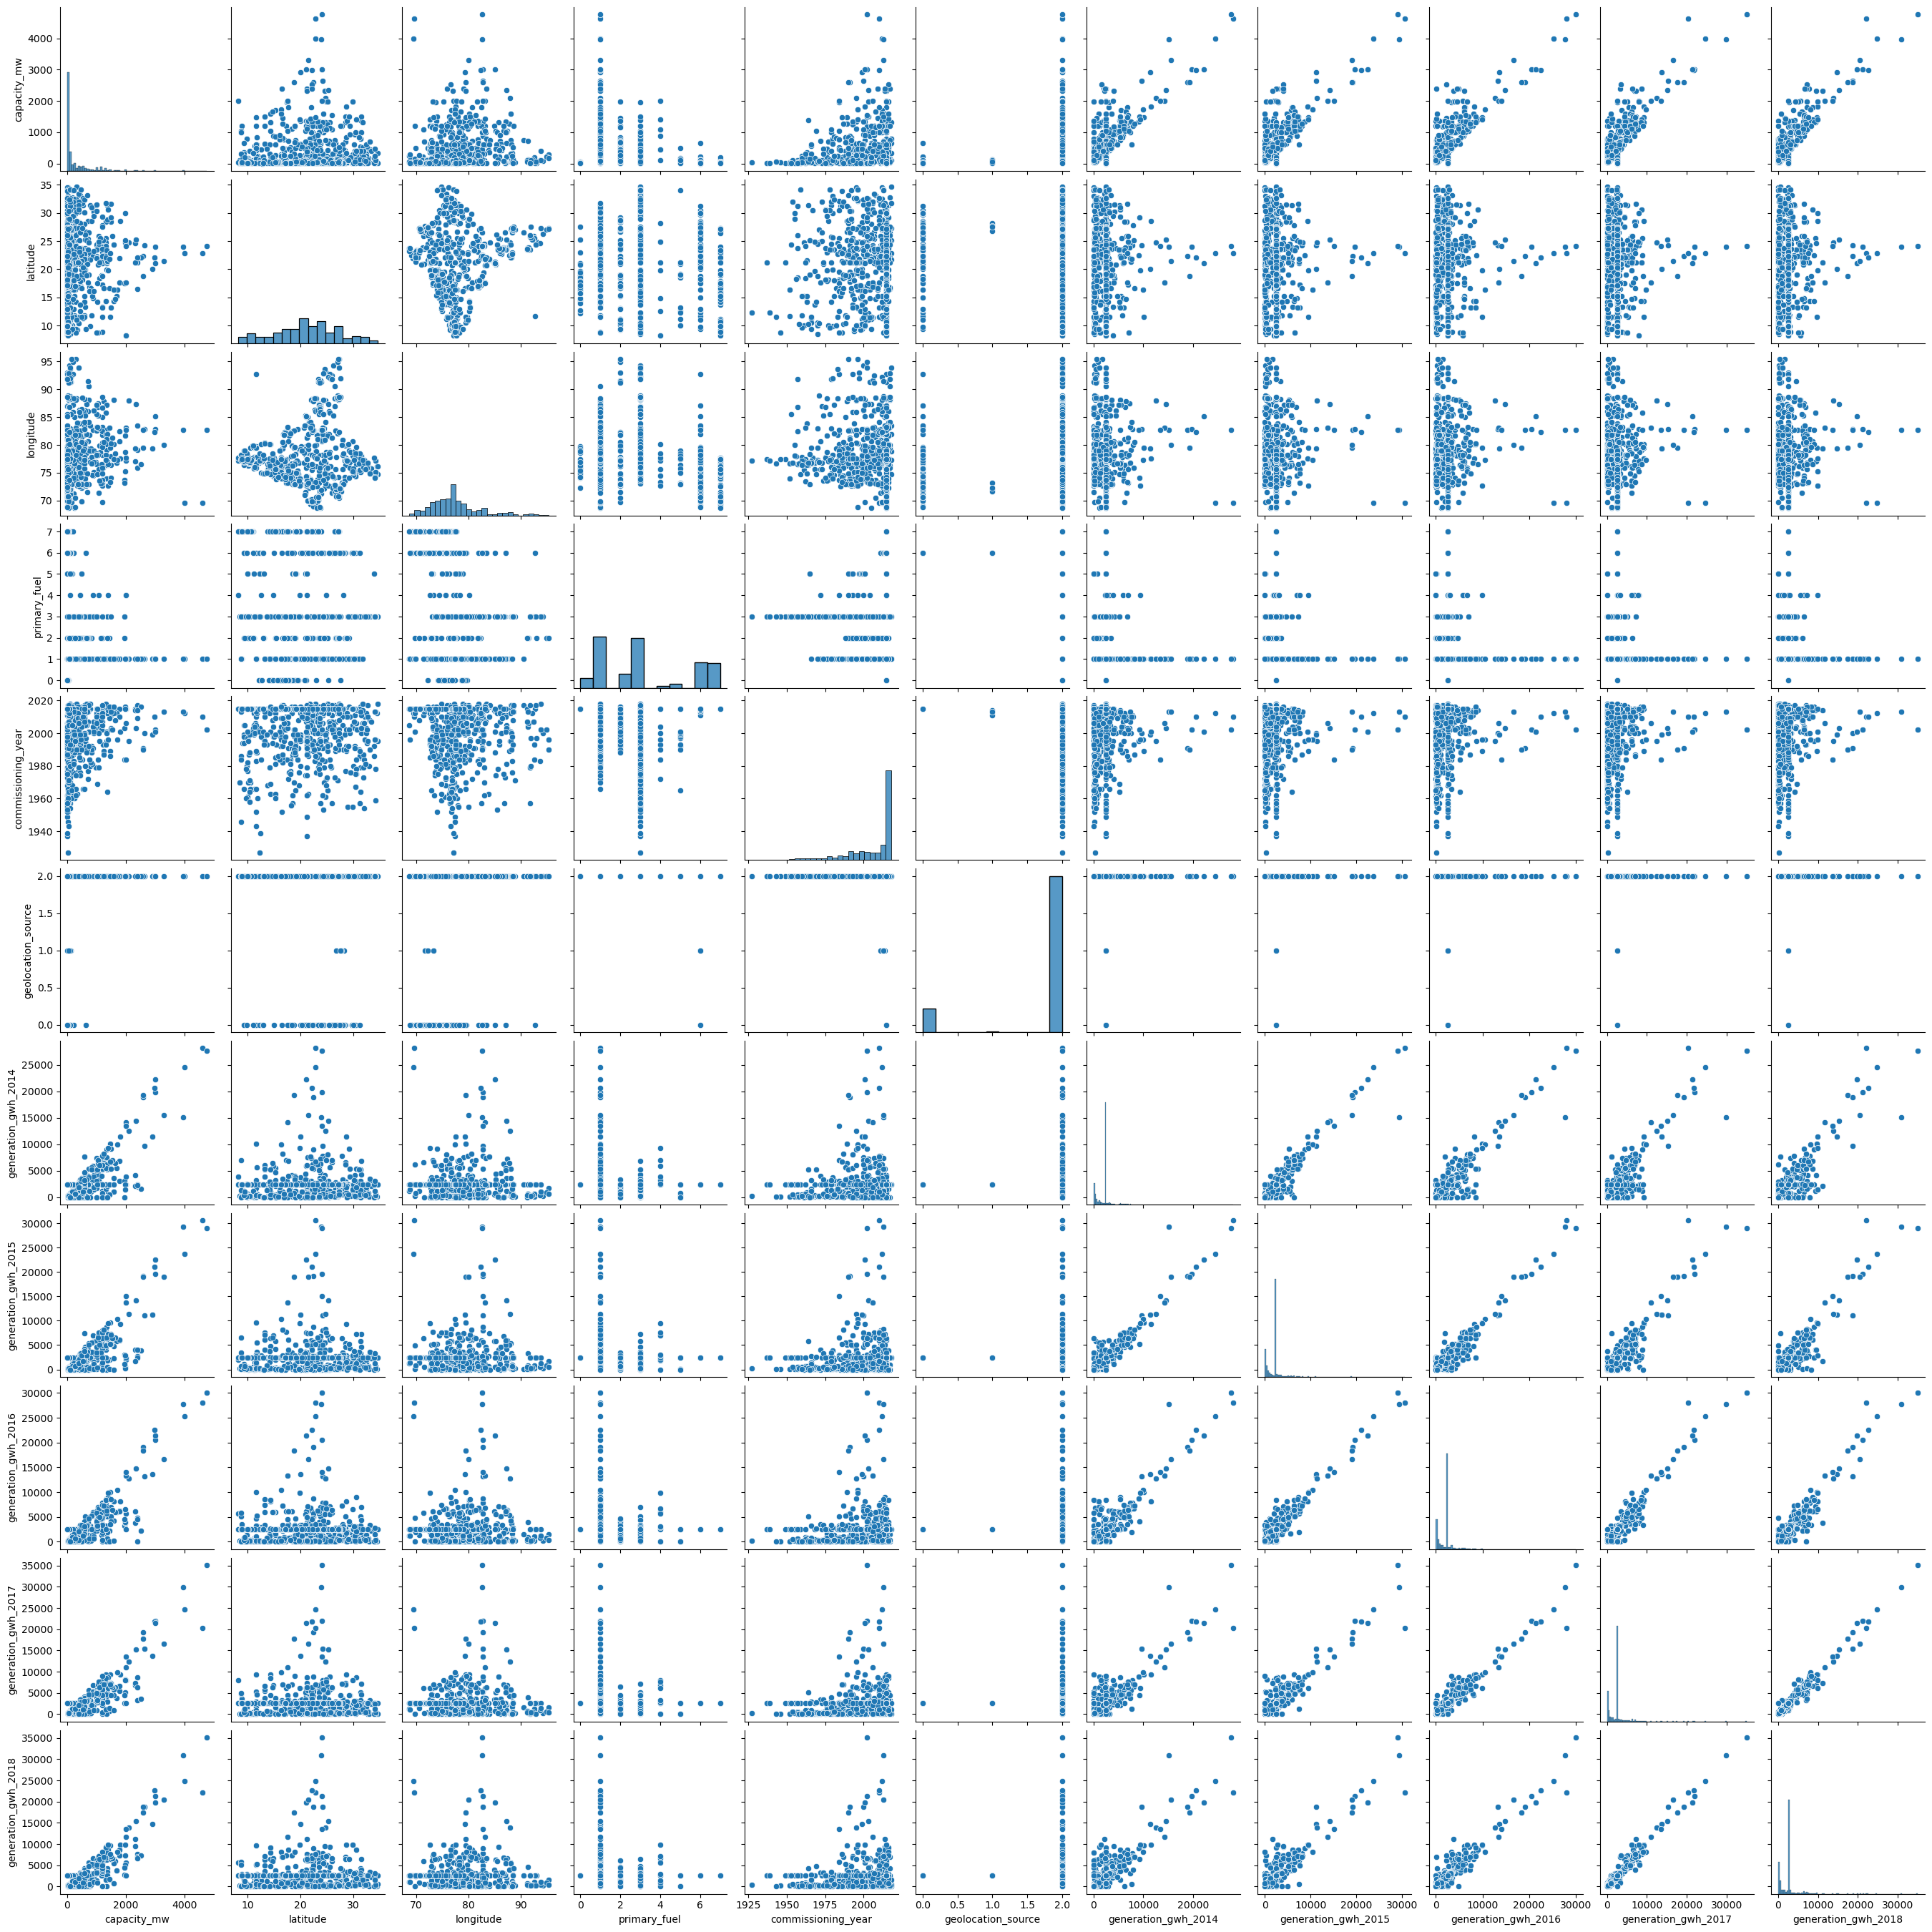

In [67]:
sns.pairplot(df)
plt.show()

In [68]:
from scipy.stats import zscore

In [69]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'geolocation_source', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018'],
      dtype='object')

In [70]:
out_features=df[['longitude','commissioning_year','geolocation_source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']]
z=np.abs(zscore(out_features))
z

longitude  commissioning_year  geolocation_source  generation_gwh_2014  \
0     0.878280            0.407327            1.083349         1.707094e-16   
1     0.593788            0.661679            0.394241         1.707094e-16   
2     1.682394            0.661679            0.394241         1.707094e-16   
3     2.889052            0.037788            0.394241         6.809773e-01   
4     1.027976            0.661679            0.394241         2.266352e-01   
..         ...                 ...                 ...                  ...   
902   0.022477            0.725267            0.394241         1.707094e-16   
903   0.145644            0.661679            2.560940         1.707094e-16   
904   0.391673            0.661679            0.394241         1.707094e-16   
905   0.772866            0.661679            0.394241         1.707094e-16   
906   0.002473            0.661679            0.394241         1.707094e-16   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0               0.000000             0.000000         1.557412e-16   
1               0.000000             0.000000         1.557412e-16   
2               0.000000             0.000000         1.557412e-16   
3               0.554446             0.549988         6.452243e-01   
4               1.220581             1.312471         9.718925e-01   
..                   ...                  ...                  ...   
902             0.849344             0.776810         5.761719e-01   
903             0.000000             0.000000         1.557412e-16   
904             0.000000             0.000000         1.557412e-16   
905             0.000000             0.000000         1.557412e-16   
906             0.000000             0.000000         1.557412e-16   

     generation_gwh_2018  
0           1.501244e-16  
1           1.501244e-16  
2           1.501244e-16  
3           6.518573e-01  
4           1.544399e+00  
..                   ...  
902         6.319636e-01  
903         1.501244e-16  
904         1.501244e-16  
905         1.501244e-16  
906         1.501244e-16  

[907 rows x 8 columns]

In [71]:
np.where(z<3)

(array([  0,   0,   0, ..., 906, 906, 906], dtype=int64),
 array([0, 1, 2, ..., 5, 6, 7], dtype=int64))

In [72]:
df1=df[(z<3).all(axis=1)]

In [73]:
df1.shape

(856, 11)

In [74]:
df.shape

(907, 11)

In [75]:
print('Percentage of data loss=',((907-856)/856)*100)

Percentage of data loss= 5.957943925233645


We can afford this data loss because it is about 6%. 

In [76]:
df=df1

In [77]:
df.skew()

capacity_mw            2.165339
latitude              -0.110671
longitude              0.918260
primary_fuel           0.420700
commissioning_year    -1.542463
geolocation_source    -2.076336
generation_gwh_2014    1.523683
generation_gwh_2015    1.374516
generation_gwh_2016    1.388521
generation_gwh_2017    1.292164
generation_gwh_2018    1.419835
dtype: float64

We can see some serious skewness in this data set. I am going to use power transform method for this.

In [78]:
from sklearn.preprocessing import PowerTransformer

In [79]:
Pt=PowerTransformer(method='yeo-johnson')

In [80]:
df[['capacity_mw','longitude','commissioning_year','geolocation_source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']]=Pt.fit_transform(df[['capacity_mw','longitude','commissioning_year','geolocation_source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']].values)

In [81]:
df.skew()

capacity_mw            0.016950
latitude              -0.110671
longitude             -0.000830
primary_fuel           0.420700
commissioning_year    -1.105890
geolocation_source    -2.049535
generation_gwh_2014   -0.242906
generation_gwh_2015   -0.310215
generation_gwh_2016   -0.312830
generation_gwh_2017   -0.331599
generation_gwh_2018   -0.329254
dtype: float64

From this we can see that we neutralize most of the the skewness but in commissioning_year and geolocation_source there are skewness present in this dataset.

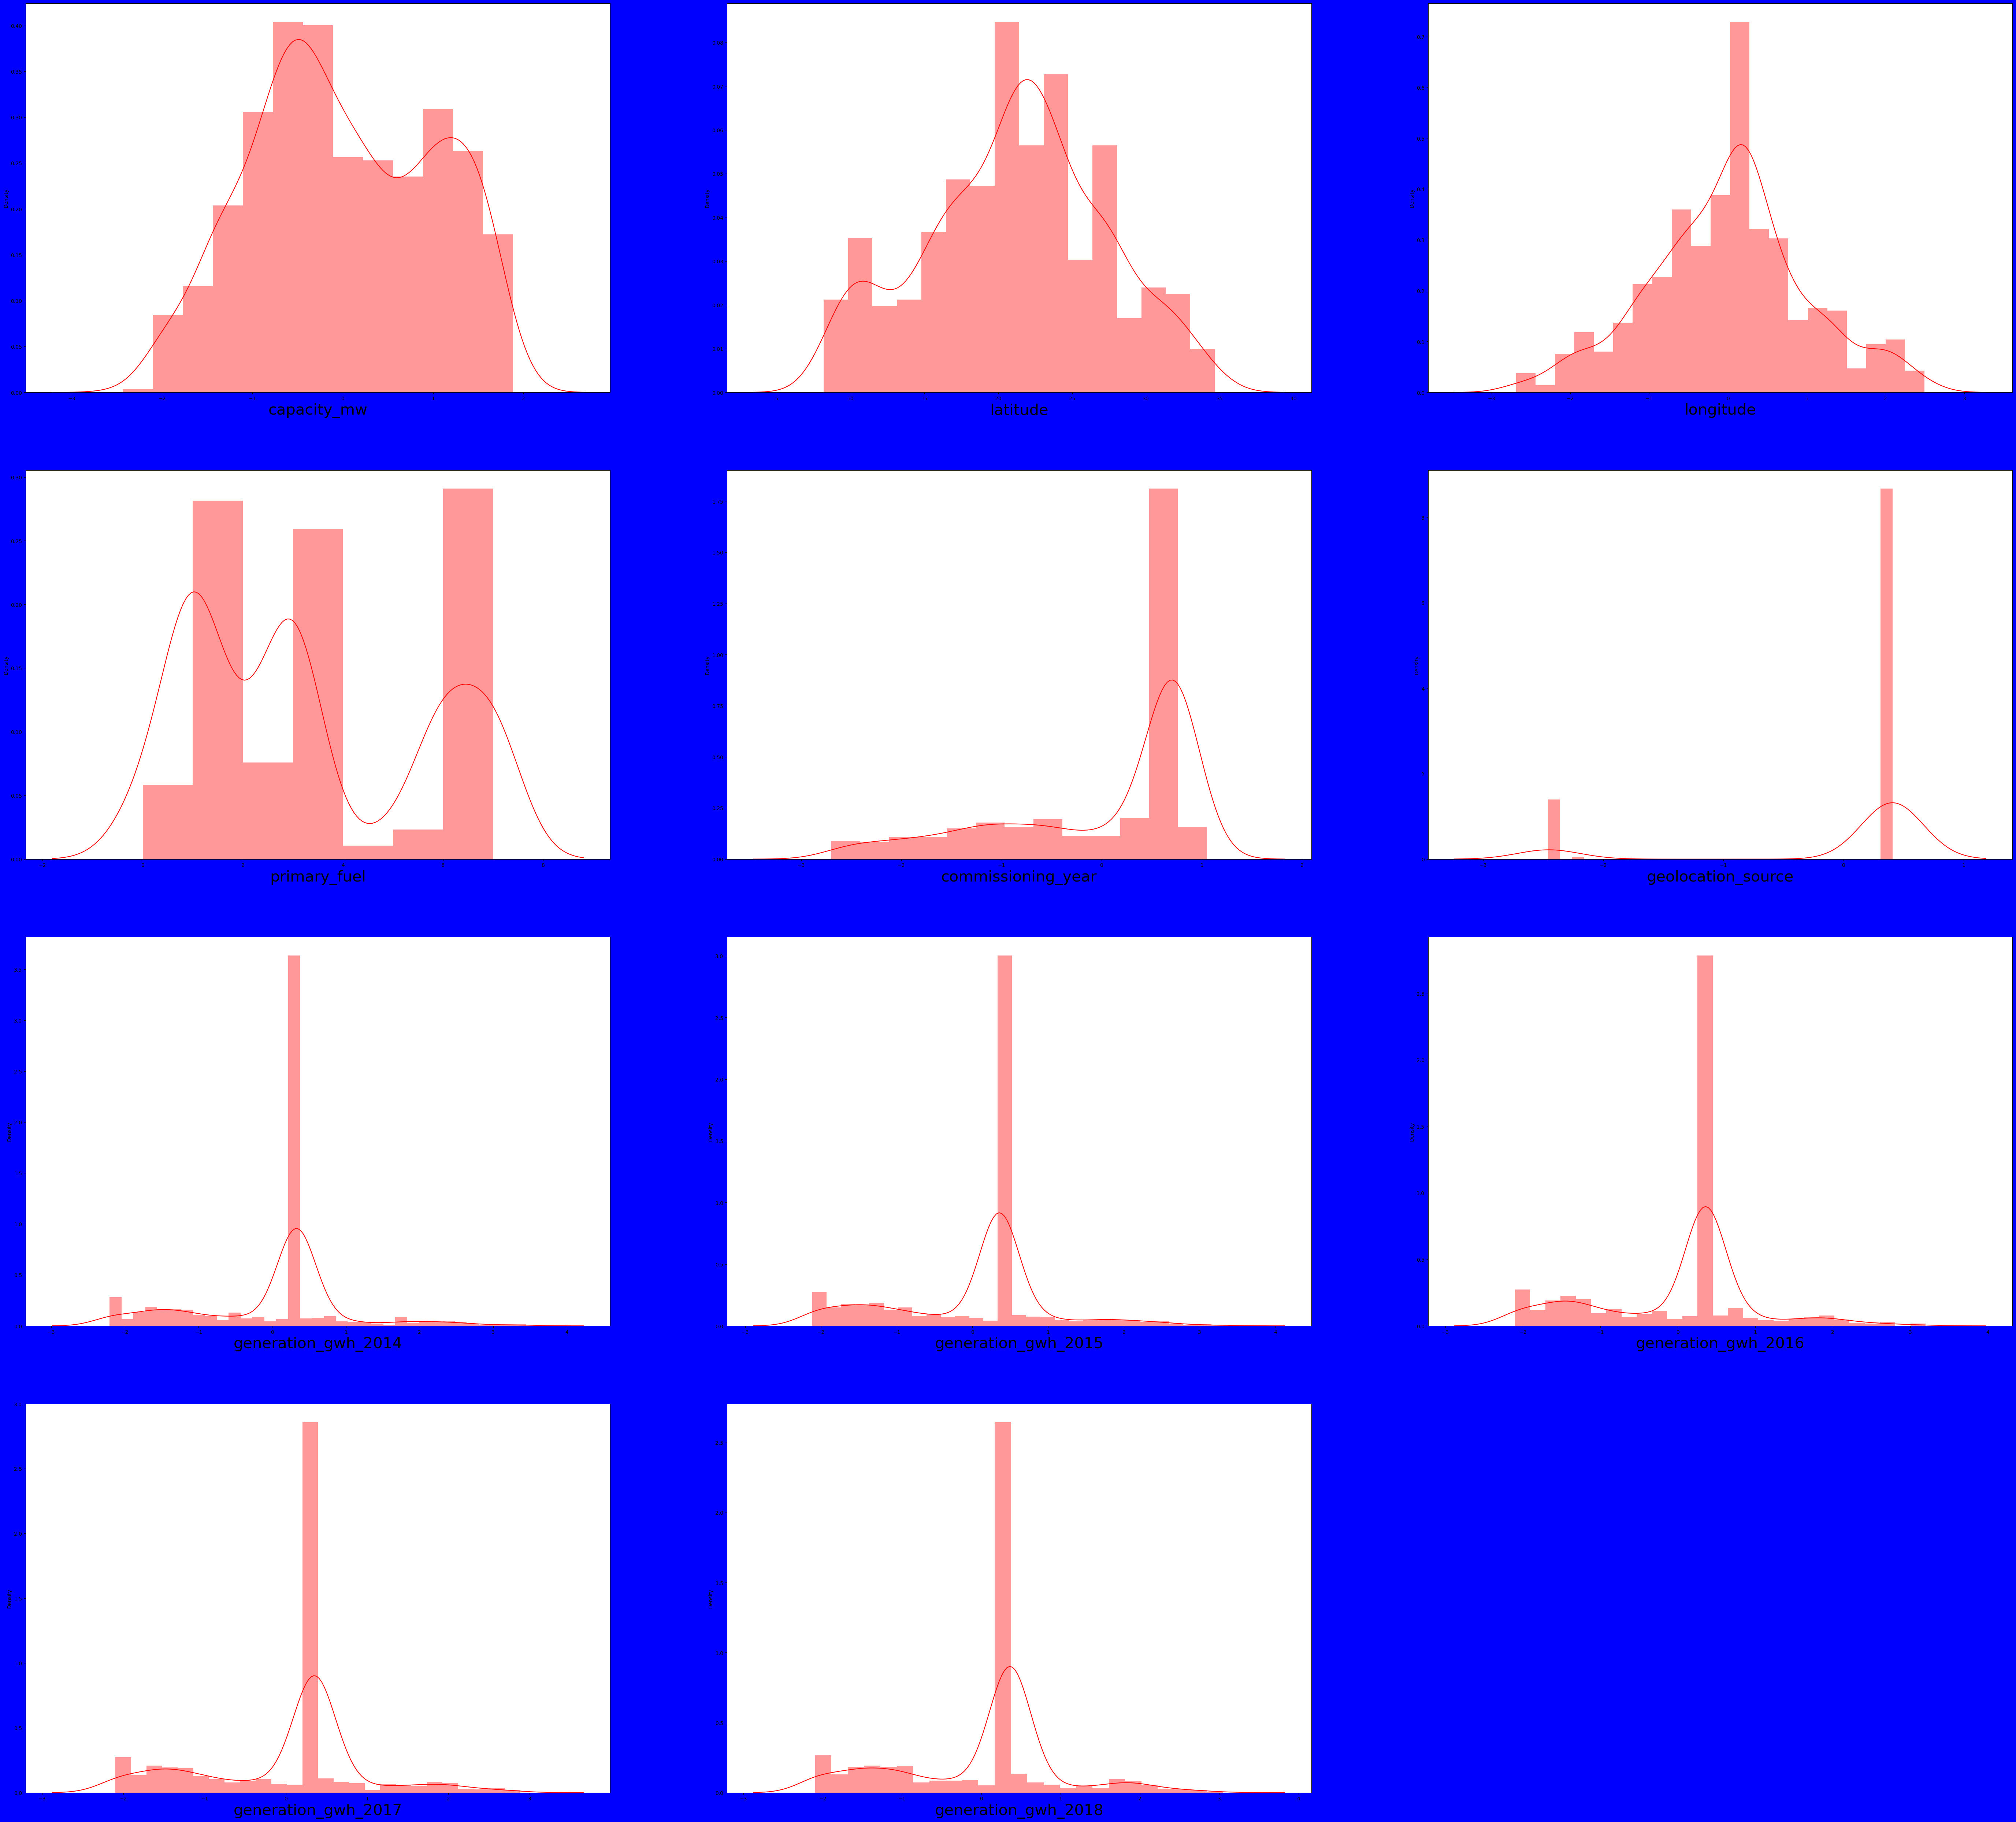

<Figure size 640x480 with 0 Axes>

In [82]:
plt.figure(figsize=(70,80),facecolor='blue',edgecolor='red')
plotnumber=1
for column in df:
    if plotnumber<=20:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(df[column],color='red')
        plt.xlabel(column,fontsize=30)
    plotnumber+=1
plt.show()
plt.tight_layout()

we crosscheck this by using distribution plot. 

# CORRELATION BETWEEN FEATURES

In [83]:
cor=df.corr()
cor

capacity_mw  latitude  longitude  primary_fuel  \
capacity_mw             1.000000  0.048622   0.338174     -0.528282   
latitude                0.048622  1.000000  -0.070694      0.000064   
longitude               0.338174 -0.070694   1.000000     -0.407090   
primary_fuel           -0.528282  0.000064  -0.407090      1.000000   
commissioning_year     -0.231716  0.031145  -0.178711      0.204441   
geolocation_source      0.474277 -0.207052   0.305803     -0.481300   
generation_gwh_2014     0.011130  0.056477  -0.115776      0.038070   
generation_gwh_2015    -0.007487  0.043643  -0.133050      0.045014   
generation_gwh_2016     0.012290  0.050508  -0.090661      0.035112   
generation_gwh_2017     0.023902  0.028432  -0.100120      0.038879   
generation_gwh_2018     0.017091  0.035186  -0.094515      0.036943   

                     commissioning_year  geolocation_source  \
capacity_mw                   -0.231716            0.474277   
latitude                       0.031145           -0.207052   
longitude                     -0.178711            0.305803   
primary_fuel                   0.204441           -0.481300   
commissioning_year             1.000000           -0.289319   
geolocation_source            -0.289319            1.000000   
generation_gwh_2014            0.284988           -0.133409   
generation_gwh_2015            0.313387           -0.143731   
generation_gwh_2016            0.350680           -0.144889   
generation_gwh_2017            0.328208           -0.142147   
generation_gwh_2018            0.338383           -0.146286   

                     generation_gwh_2014  generation_gwh_2015  \
capacity_mw                     0.011130            -0.007487   
latitude                        0.056477             0.043643   
longitude                      -0.115776            -0.133050   
primary_fuel                    0.038070             0.045014   
commissioning_year              0.284988             0.313387   
geolocation_source             -0.133409            -0.143731   
generation_gwh_2014             1.000000             0.865934   
generation_gwh_2015             0.865934             1.000000   
generation_gwh_2016             0.808724             0.902483   
generation_gwh_2017             0.744389             0.801866   
generation_gwh_2018             0.753069             0.807946   

                     generation_gwh_2016  generation_gwh_2017  \
capacity_mw                     0.012290             0.023902   
latitude                        0.050508             0.028432   
longitude                      -0.090661            -0.100120   
primary_fuel                    0.035112             0.038879   
commissioning_year              0.350680             0.328208   
geolocation_source             -0.144889            -0.142147   
generation_gwh_2014             0.808724             0.744389   
generation_gwh_2015             0.902483             0.801866   
generation_gwh_2016             1.000000             0.899114   
generation_gwh_2017             0.899114             1.000000   
generation_gwh_2018             0.896979             0.949473   

                     generation_gwh_2018  
capacity_mw                     0.017091  
latitude                        0.035186  
longitude                      -0.094515  
primary_fuel                    0.036943  
commissioning_year              0.338383  
geolocation_source             -0.146286  
generation_gwh_2014             0.753069  
generation_gwh_2015             0.807946  
generation_gwh_2016             0.896979  
generation_gwh_2017             0.949473  
generation_gwh_2018             1.000000

for more clearity we are going to use heatmap for more clearity.

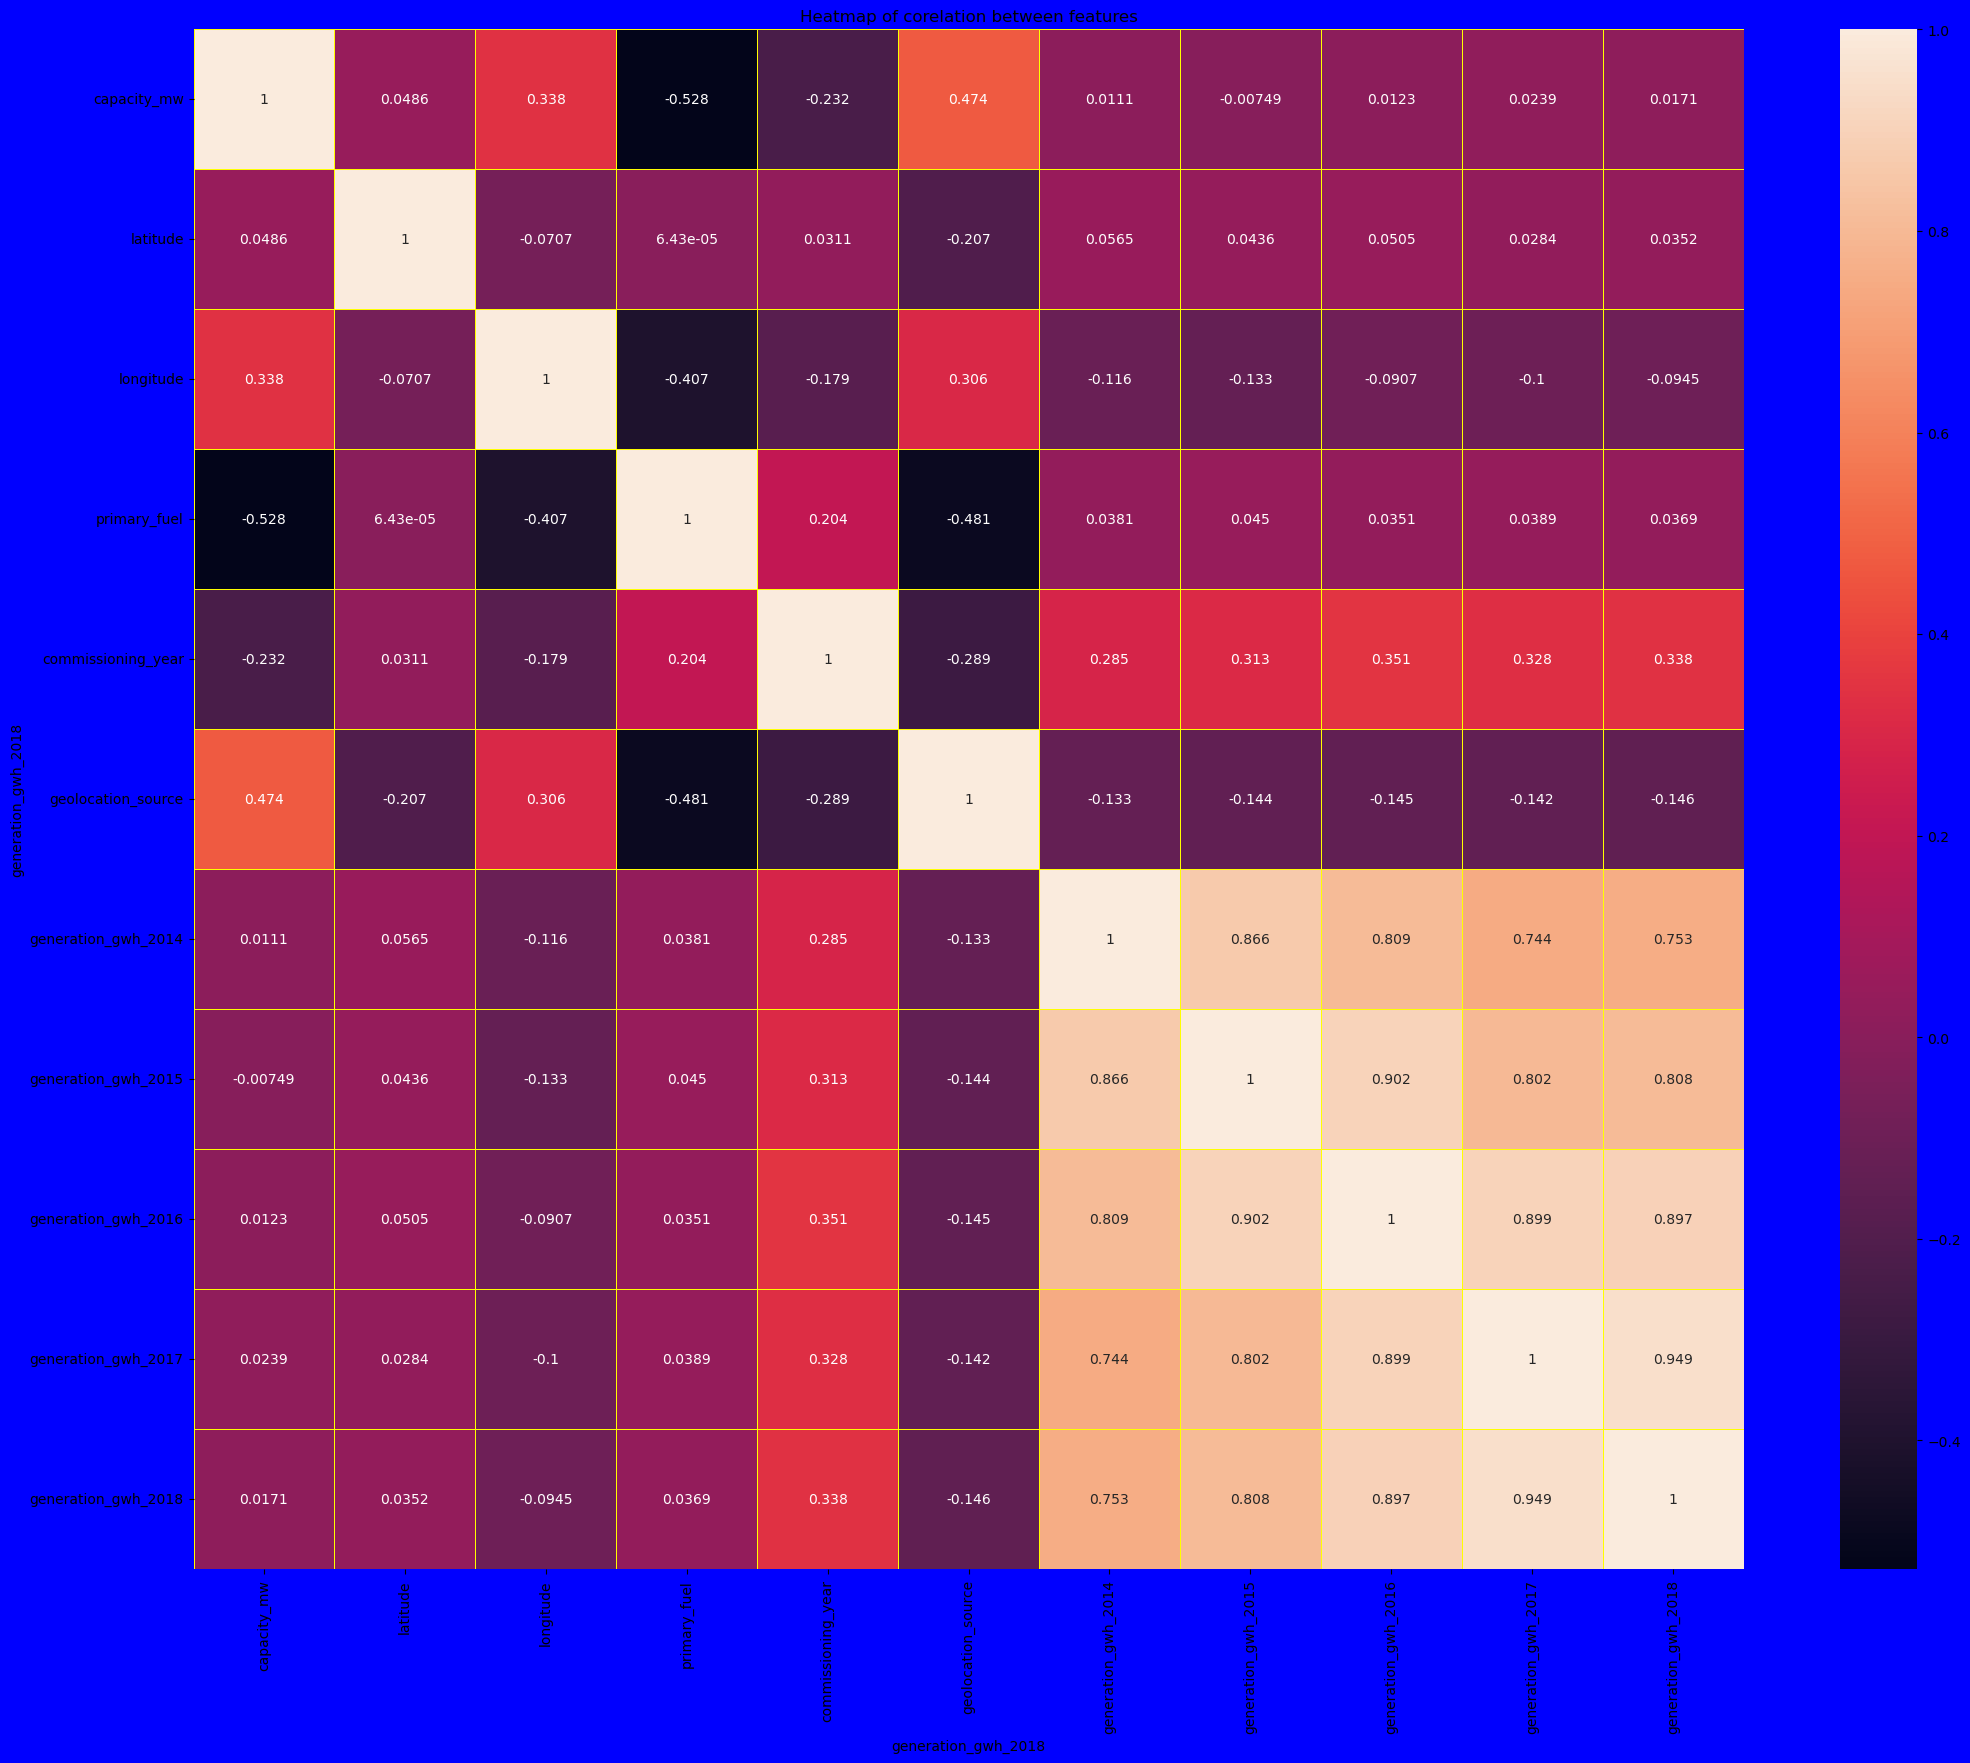

In [84]:
plt.figure(figsize=(25,20),facecolor='blue',edgecolor='red')
sns.heatmap(data=cor,annot=True,fmt='.3g',linecolor='yellow',linewidths=0.5)
plt.xlabel(column)
plt.ylabel(column)
plt.title('Heatmap of corelation between features')
plt.show()


In [85]:
c=cor['capacity_mw'].sort_values(ascending=False)
c

capacity_mw            1.000000
geolocation_source     0.474277
longitude              0.338174
latitude               0.048622
generation_gwh_2017    0.023902
generation_gwh_2018    0.017091
generation_gwh_2016    0.012290
generation_gwh_2014    0.011130
generation_gwh_2015   -0.007487
commissioning_year    -0.231716
primary_fuel          -0.528282
Name: capacity_mw, dtype: float64

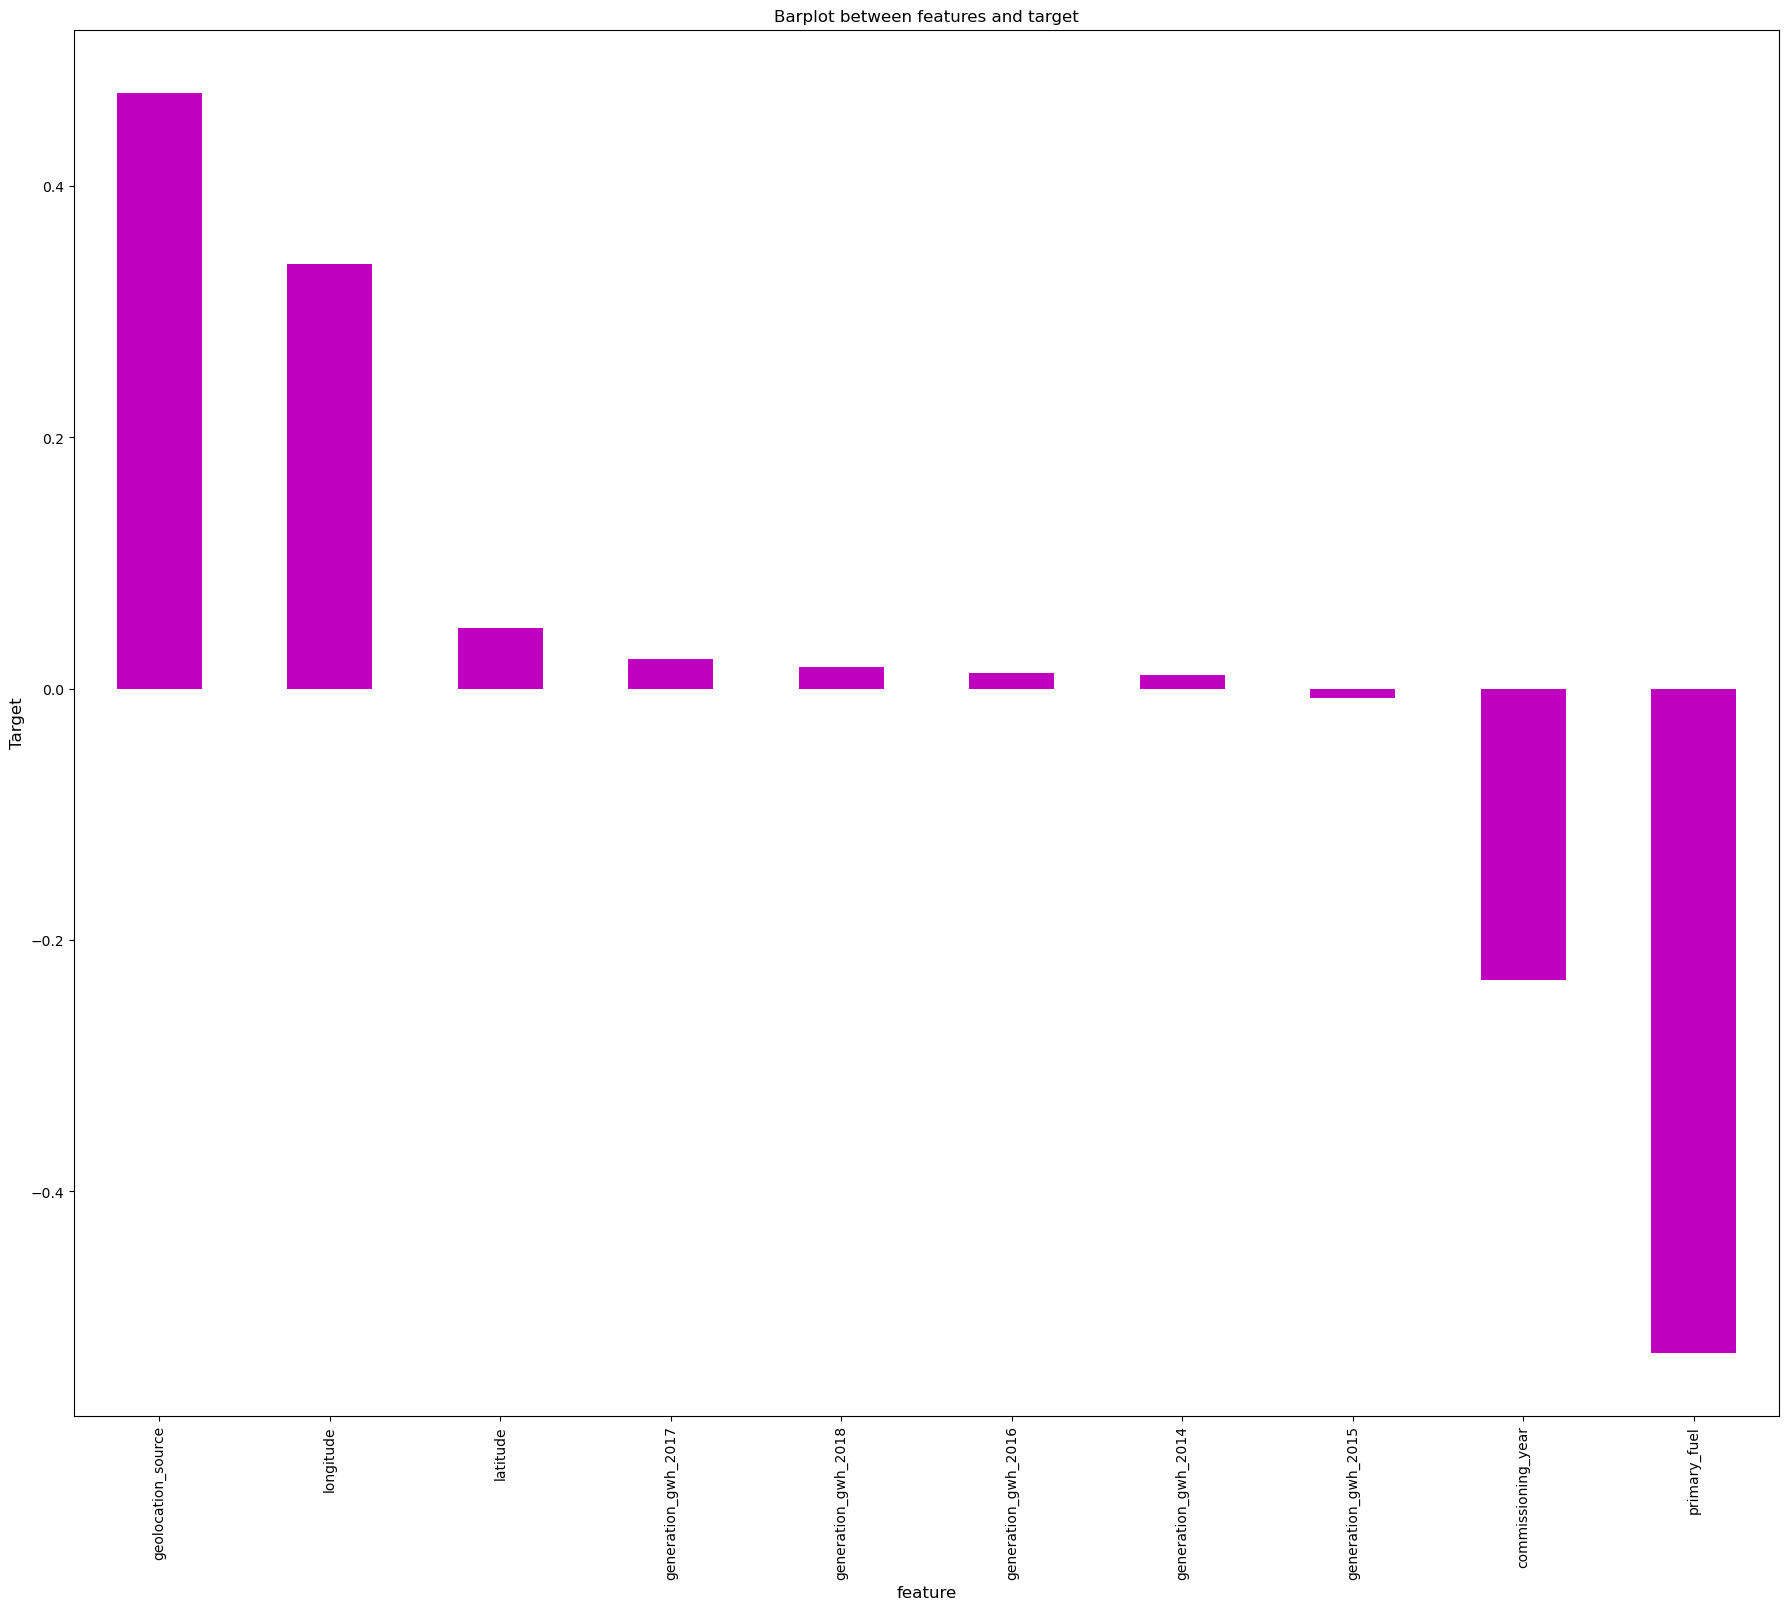

In [86]:
plt.figure(figsize=(22,18))
c.drop(['capacity_mw']).plot(kind='bar',color='m')
plt.xlabel('feature',fontsize=12)
plt.ylabel('Target',fontsize=12)
plt.title('Barplot between features and target')
plt.show()

For our first target variable 'capacity_mw', there are some highly negative corelation for primary_fuel and maxm with geolocation_source. 

In [87]:
d=cor['primary_fuel'].sort_values(ascending=False)
d

primary_fuel           1.000000
commissioning_year     0.204441
generation_gwh_2015    0.045014
generation_gwh_2017    0.038879
generation_gwh_2014    0.038070
generation_gwh_2018    0.036943
generation_gwh_2016    0.035112
latitude               0.000064
longitude             -0.407090
geolocation_source    -0.481300
capacity_mw           -0.528282
Name: primary_fuel, dtype: float64

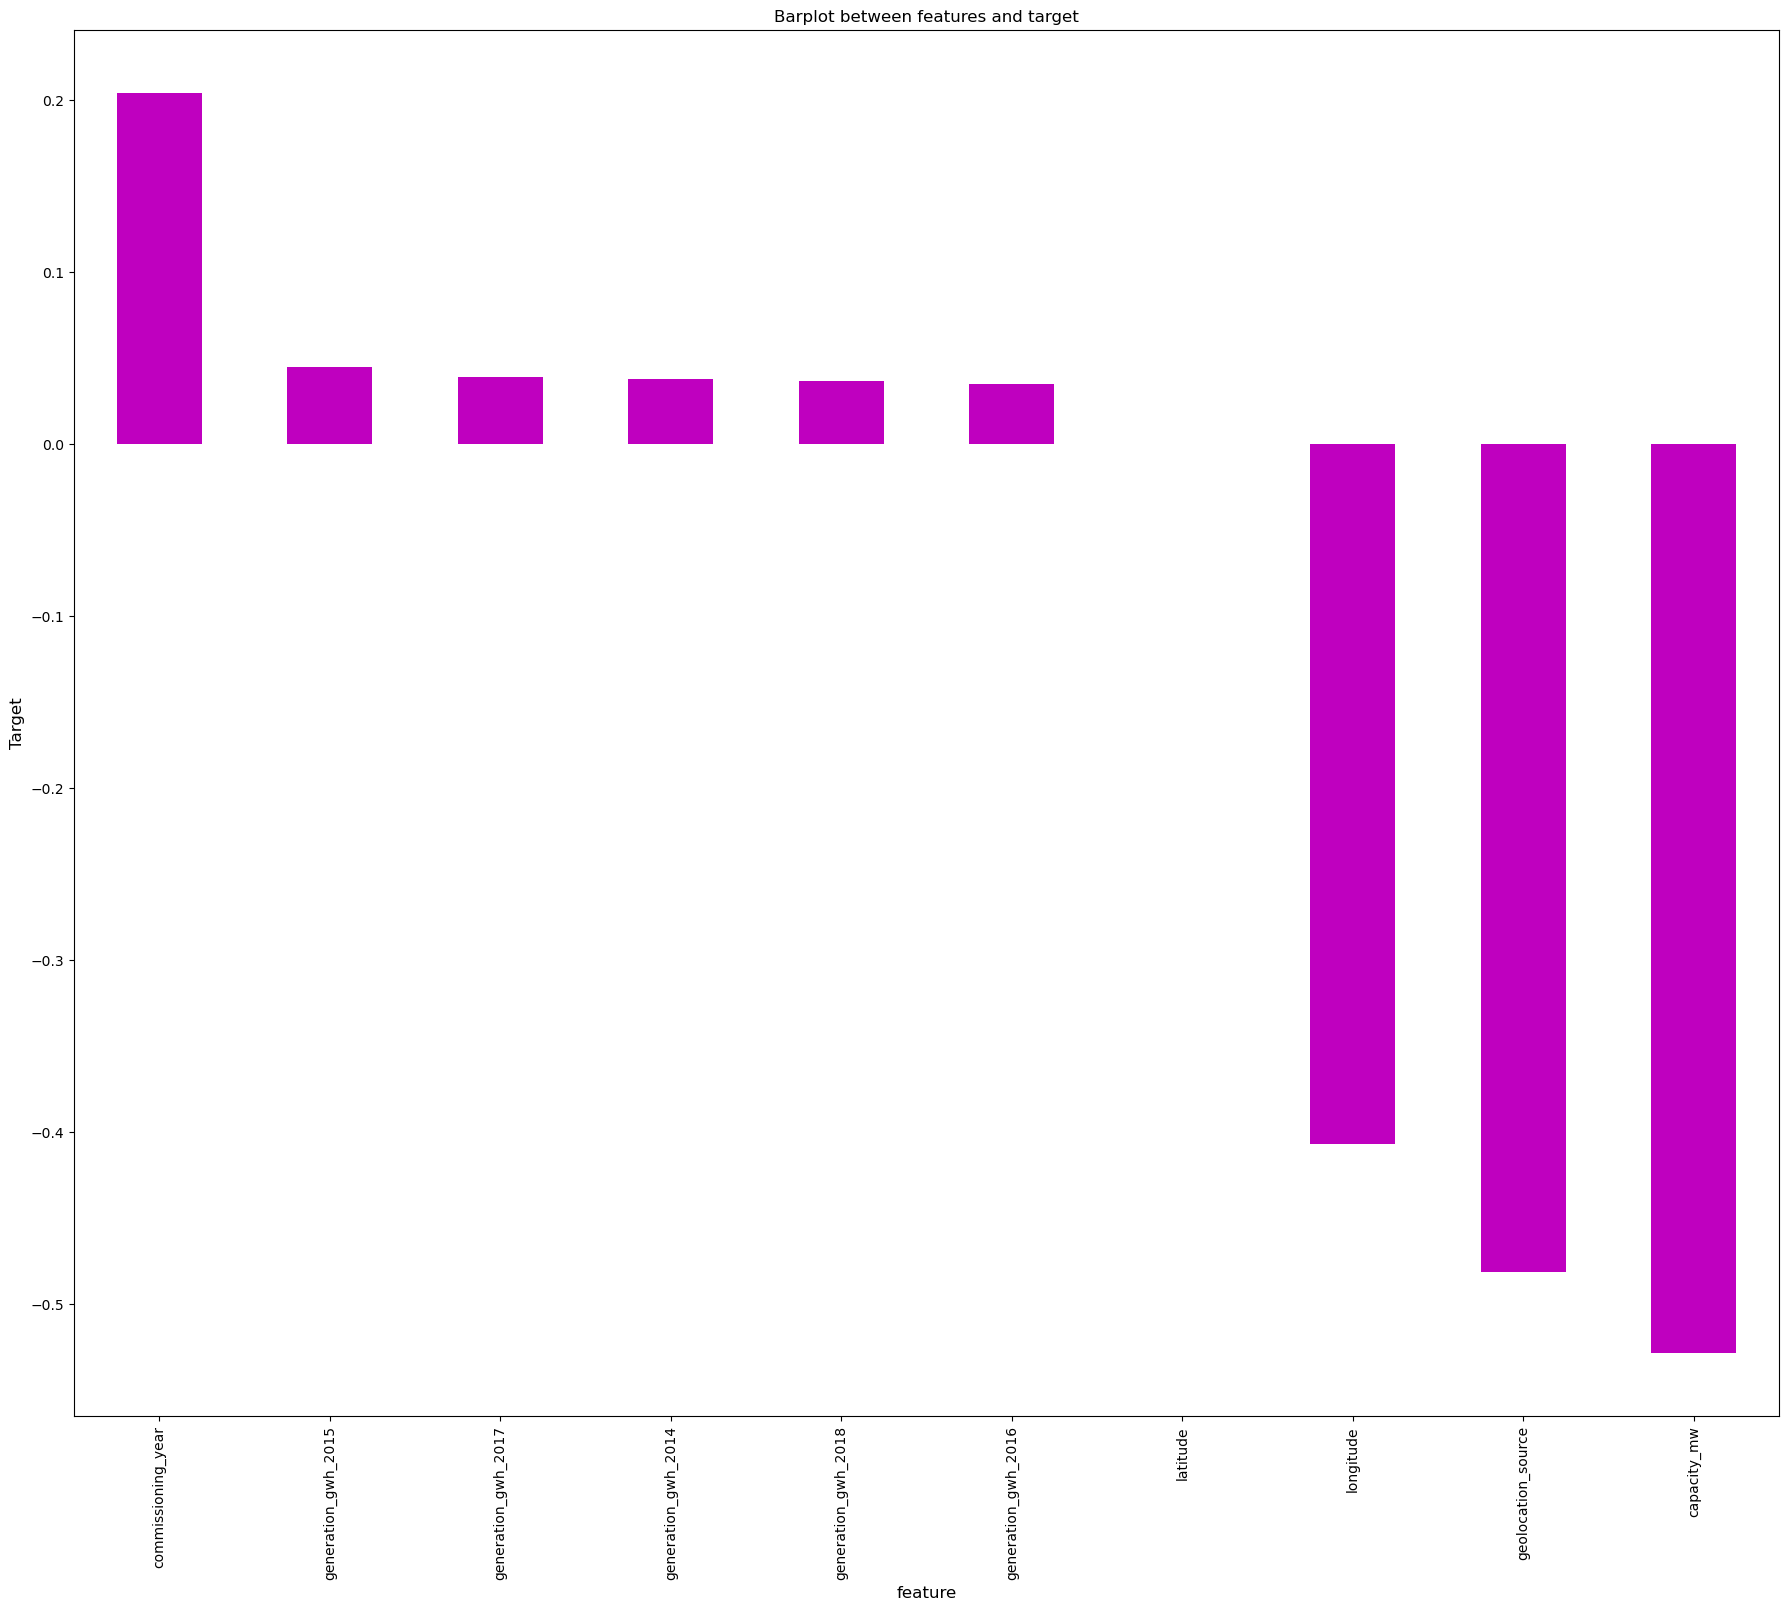

In [88]:
plt.figure(figsize=(22,18))
d.drop(['primary_fuel']).plot(kind='bar',color='m')
plt.xlabel('feature',fontsize=12)
plt.ylabel('Target',fontsize=12)
plt.title('Barplot between features and target')
plt.show()

For our second target variable 'primary_fuel', there are some highly negative corelation with capacity_mw and geolocation_source. and maxm with commissioning_year. 

# First we will do prediction our model for target variable 'capacity_mw'. We will treat this as a REGRESSION MODEL. 

# Splitting the feature and target variable

In [90]:
x=df.drop('capacity_mw',axis=1)
y=df['capacity_mw']

In [91]:
x

latitude  longitude  primary_fuel  commissioning_year  \
0     28.1839  -0.933505             6            0.306186   
1     24.7663  -0.514127             1            0.716860   
2     21.9038  -2.369636             7            0.716860   
3     23.8712   2.449044             2           -0.328155   
4     21.9603   1.254056             1            0.716860   
..        ...        ...           ...                 ...   
902   16.2949   0.216411             1            0.825510   
903   12.8932   0.406586             6            0.716860   
904   15.2758  -0.239728             7            0.716860   
905   24.3500  -0.773358             1            0.716860   
906    9.9344   0.245292             7            0.716860   

     geolocation_source  generation_gwh_2014  generation_gwh_2015  \
0             -2.251582             0.327261             0.352582   
1              0.407652             0.327261             0.352582   
2              0.407652             0.327261             0.352582   
3              0.407652            -1.048027            -0.735600   
4              0.407652             0.666747             1.897805   
..                  ...                  ...                  ...   
902            0.407652             0.327261            -2.096966   
903           -2.459408             0.327261             0.352582   
904            0.407652             0.327261             0.352582   
905            0.407652             0.327261             0.352582   
906            0.407652             0.327261             0.352582   

     generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
0               0.355424             0.348696             0.358850  
1               0.355424             0.348696             0.358850  
2               0.355424             0.348696             0.358850  
3              -0.682718            -0.903347            -0.916218  
4               1.922025             1.533887             2.044860  
..                   ...                  ...                  ...  
902            -1.416145            -0.720597            -0.858506  
903             0.355424             0.348696             0.358850  
904             0.355424             0.348696             0.358850  
905             0.355424             0.348696             0.358850  
906             0.355424             0.348696             0.358850  

[856 rows x 10 columns]

# Scaling data using Standard Scaler

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
X

latitude  longitude  primary_fuel  commissioning_year  \
0    1.163075  -0.933505      1.180664            0.306186   
1    0.602499  -0.514127     -0.973318            0.716860   
2    0.132974  -2.369636      1.611461            0.716860   
3    0.455679   2.449044     -0.542522           -0.328155   
4    0.142242   1.254056     -0.973318            0.716860   
..        ...        ...           ...                 ...   
851 -0.787032   0.216411     -0.973318            0.825510   
852 -1.344999   0.406586      1.180664            0.716860   
853 -0.954191  -0.239728      1.611461            0.716860   
854  0.534215  -0.773358     -0.973318            0.716860   
855 -1.830320   0.245292      1.611461            0.716860   

     geolocation_source  generation_gwh_2014  generation_gwh_2015  \
0             -2.251582             0.327261             0.352582   
1              0.407652             0.327261             0.352582   
2              0.407652             0.327261             0.352582   
3              0.407652            -1.048027            -0.735600   
4              0.407652             0.666747             1.897805   
..                  ...                  ...                  ...   
851            0.407652             0.327261            -2.096966   
852           -2.459408             0.327261             0.352582   
853            0.407652             0.327261             0.352582   
854            0.407652             0.327261             0.352582   
855            0.407652             0.327261             0.352582   

     generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
0               0.355424             0.348696             0.358850  
1               0.355424             0.348696             0.358850  
2               0.355424             0.348696             0.358850  
3              -0.682718            -0.903347            -0.916218  
4               1.922025             1.533887             2.044860  
..                   ...                  ...                  ...  
851            -1.416145            -0.720597            -0.858506  
852             0.355424             0.348696             0.358850  
853             0.355424             0.348696             0.358850  
854             0.355424             0.348696             0.358850  
855             0.355424             0.348696             0.358850  

[856 rows x 10 columns]

# Variance Inflation factor

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [95]:
vif=pd.DataFrame()
vif['Vif_values']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['Columns']=X.columns
vif

Vif_values              Columns
0    1.066740             latitude
1    1.254228            longitude
2    1.476677         primary_fuel
3    1.242690   commissioning_year
4    1.472040   geolocation_source
5    4.141964  generation_gwh_2014
6    7.749089  generation_gwh_2015
7   10.715873  generation_gwh_2016
8   11.592941  generation_gwh_2017
9   11.390532  generation_gwh_2018

Here we can see that the generation_gwh_2018 and 2017 is having variance inflation factor more than 10. I am going to drop generation_gwh_2018. Then we will check vif again.

In [96]:
X=X.drop('generation_gwh_2018',axis=1)
X.head()

latitude  longitude  primary_fuel  commissioning_year  geolocation_source  \
0  1.163075  -0.933505      1.180664            0.306186           -2.251582   
1  0.602499  -0.514127     -0.973318            0.716860            0.407652   
2  0.132974  -2.369636      1.611461            0.716860            0.407652   
3  0.455679   2.449044     -0.542522           -0.328155            0.407652   
4  0.142242   1.254056     -0.973318            0.716860            0.407652   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0             0.327261             0.352582             0.355424   
1             0.327261             0.352582             0.355424   
2             0.327261             0.352582             0.355424   
3            -1.048027            -0.735600            -0.682718   
4             0.666747             1.897805             1.922025   

   generation_gwh_2017  
0             0.348696  
1             0.348696  
2             0.348696  
3            -0.903347  
4             1.533887

In [97]:
vif=pd.DataFrame()
vif['Vif_values']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['Columns']=X.columns
vif

Vif_values              Columns
0    1.066736             latitude
1    1.253950            longitude
2    1.476428         primary_fuel
3    1.239692   commissioning_year
4    1.471536   geolocation_source
5    4.120375  generation_gwh_2014
6    7.749085  generation_gwh_2015
7   10.306867  generation_gwh_2016
8    5.329231  generation_gwh_2017

I am taking 10 or aprox value vif value . So these values are looking good for me.|

# Create Train Test Split

In [98]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [99]:
from sklearn.linear_model import LinearRegression

In [100]:
Maxacc=0
Maxrs=0
LR=LinearRegression()
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    LR.fit(x_train,y_train)
    lr_pred=LR.predict(x_test)
    lr_acc=r2_score(y_test,lr_pred)
    if lr_acc>Maxacc:
        Maxacc=lr_acc
        Maxrs=i
print('At random state',Maxrs,'Best accuracy score is',Maxacc)

At random state 145 Best accuracy score is 0.4749772337004131


We can see that best accuracy we get 47% at random state 145.

In [101]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=145)

# Model Building

In [102]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn import metrics


In [103]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print('Train Result',(r2_score(y_train,y_pred))*100)
    elif train==False:
        pred=clf.predict(x_test)
        print('Test Result',(r2_score(y_test,pred))*100)
        print('MAE',mean_absolute_error(y_test,pred))
        print('MSE',mean_squared_error(y_test,pred))

# 1. Random Forest Regressor

In [104]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

RandomForestRegressor()

In [105]:
metric_score(RFR,x_train,x_test,y_train,y_test,train=True)
metric_score(RFR,x_train,x_test,y_train,y_test,train=False)

Train Result 96.61521080574362
Test Result 73.60600587617117
MAE 0.365572662020435
MSE 0.2597863708020156


# 2.Linear Regressor

In [106]:
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [107]:
metric_score(LR,x_train,x_test,y_train,y_test,train=True)
metric_score(LR,x_train,x_test,y_train,y_test,train=False)

Train Result 36.26841863462914
Test Result 45.03373254097441
MAE 0.615269384668042
MSE 0.541012742244323


# 3.Gradient Boosting Regression

In [108]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)

GradientBoostingRegressor()

In [109]:
metric_score(GBR,x_train,x_test,y_train,y_test,train=True)
metric_score(GBR,x_train,x_test,y_train,y_test,train=False)

Train Result 88.86860290116594
Test Result 75.09524093762926
MAE 0.37630170717916905
MSE 0.2451283781514061


# 4. Decision Tree Regressor

In [110]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)

DecisionTreeRegressor()

In [111]:
metric_score(DTR,x_train,x_test,y_train,y_test,train=True)
metric_score(DTR,x_train,x_test,y_train,y_test,train=False)

Train Result 99.35956978851456
Test Result 56.292698549733224
MAE 0.45239475721417216
MSE 0.4301948832770041


# 5. SVR

In [112]:
svr=SVR()
svr.fit(x_train,y_train)

SVR()

In [113]:
metric_score(svr,x_train,x_test,y_train,y_test,train=True)
metric_score(svr,x_train,x_test,y_train,y_test,train=False)

Train Result 72.20170436311444
Test Result 67.4450849328339
MAE 0.4253399790469895
MSE 0.3204260483422462


# 6. SGD Regressor

In [114]:
SGDR=SGDRegressor()
SGDR.fit(x_train,y_train)

SGDRegressor()

In [115]:
metric_score(SGDR,x_train,x_test,y_train,y_test,train=True)
metric_score(SGDR,x_train,x_test,y_train,y_test,train=False)

Train Result 36.23671450945789
Test Result 45.260654907643186
MAE 0.6149746803818235
MSE 0.5387792288998057


# 7. Lasso Regressor

In [116]:
LAS=Lasso()
LAS.fit(x_train,y_train)

Lasso()

In [117]:
metric_score(LAS,x_train,x_test,y_train,y_test,train=True)
metric_score(LAS,x_train,x_test,y_train,y_test,train=False)

Train Result 0.0
Test Result -1.3489140754277873
MAE 0.8469693558995235
MSE 0.997540063427175


# 8. Ridge Regressor

In [118]:
RDG=Ridge()
RDG.fit(x_train,y_train)

Ridge()

In [119]:
metric_score(RDG,x_train,x_test,y_train,y_test,train=True)
metric_score(RDG,x_train,x_test,y_train,y_test,train=False)

Train Result 36.268347259131474
Test Result 45.03294736093309
MAE 0.6153681131946015
MSE 0.5410204704825126


# Cross Validation Score

In [120]:
from sklearn.model_selection import cross_val_score

In [121]:
score= cross_val_score(LR,X,y)
print(score)
print(score.mean())
print('the difference between r^2 score and cross validation score is',(45.03-(score.mean()*100)))

[0.39818589 0.30615755 0.34943942 0.37617486 0.38202211]
0.36239596382961486
the difference between r^2 score and cross validation score is 8.790403617038514


In [122]:
score1= cross_val_score(RFR,X,y)
print(score1)
print(score1.mean())
print('the difference between r^2 score and cross validation score is',(72.99-(score1.mean()*100)))

[0.76297694 0.79871835 0.74459867 0.8233756  0.77851077]
0.7816360659869784
the difference between r^2 score and cross validation score is -5.173606598697845


In [123]:
score3= cross_val_score(GBR,X,y)
print(score3)
print(score3.mean())
print('the difference between r^2 score and cross validation score is',(75.14-(score3.mean()*100)))

[0.77054871 0.80551881 0.77897887 0.82056593 0.78666366]
0.7924551967707032
the difference between r^2 score and cross validation score is -4.105519677070319


In [124]:
score4= cross_val_score(DTR,X,y)
print(score4)
print(score4.mean())
print('the difference between r^2 score and cross validation score is',(59.81-(score4.mean()*100)))

[0.63347963 0.65592228 0.61359453 0.74246523 0.67444178]
0.6639806895637103
the difference between r^2 score and cross validation score is -6.588068956371018


In [125]:
score= cross_val_score(svr,X,y)
print(score)
print(score.mean())
print('the difference between r^2 score and cross validation score is',(67.44-(score.mean()*100)))

[0.70381388 0.62141045 0.63647916 0.72567386 0.65664207]
0.6688038852405316
the difference between r^2 score and cross validation score is 0.5596114759468378


In [126]:
score= cross_val_score(SGDR,X,y)
print(score)
print(score.mean())
print('the difference between r^2 score and cross validation score is',(44.74-(score.mean()*100)))

[0.40566794 0.31326608 0.34908838 0.37443247 0.38195824]
0.3648826211584878
the difference between r^2 score and cross validation score is 8.251737884151225


In [127]:
score= cross_val_score(LAS,X,y)
print(score)
print(score.mean())
print('the difference between r^2 score and cross validation score is',((-1.34)-(score.mean()*100)))

[-2.56156774e-04 -8.60056627e-05 -2.72495416e-05 -1.52814249e-02
 -7.02629481e-03]
-0.004535426338579729
the difference between r^2 score and cross validation score is -0.8864573661420272


In [128]:
score= cross_val_score(RDG,X,y)
print(score)
print(score.mean())
print('the difference between r^2 score and cross validation score is',(45.03-(score.mean()*100)))

[0.39852729 0.30632354 0.34943767 0.37626728 0.381984  ]
0.3625079549217348
the difference between r^2 score and cross validation score is 8.77920450782652


Here we can see that there are minimum difference between r^2 score and cross val score for 'SVR' model. So I will prefer svr model for model prediction.

# HYPER PARAMETER TUNING

In [129]:
from sklearn.model_selection import GridSearchCV

In [137]:
Parameters={
           'gamma':['scale','auto'],
           'shrinking':[True,False],
           'max_iter':[-1,0,1],
           'degree':[2,3,4]}

In [138]:
GCV=GridSearchCV(SVR(),Parameters,cv=5)

In [139]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'degree': [2, 3, 4], 'gamma': ['scale', 'auto'],
                         'max_iter': [-1, 0, 1], 'shrinking': [True, False]})

In [140]:
GCV.best_params_

{'degree': 2, 'gamma': 'auto', 'max_iter': -1, 'shrinking': True}

In [141]:
Model=SVR(degree= 2, gamma= 'auto',max_iter= -1,shrinking= True)

In [144]:
Model.fit(x_train,y_train)

SVR(degree=2, gamma='auto')

In [145]:
metric_score(Model,x_train,x_test,y_train,y_test,train=True)
metric_score(Model,x_train,x_test,y_train,y_test,train=False)

Train Result 72.39432001320252
Test Result 67.51042589987644
MAE 0.4245973480549156
MSE 0.3197829212500357


there are some slightly improvement in the test result . So we will go with SVR model for prediction for Capacity_mw target variable.

# Now we will do prediction our model for target variable 'Primary_fuel'. We will treat this as a CLASSIFICATION MODEL. 


# Splitting the Features and Target variable

In [89]:
x=df.drop('primary_fuel',axis=1)
y=df['primary_fuel']

# Scaling data using Standard Scaler

In [90]:
from sklearn.preprocessing import StandardScaler

In [91]:
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
X

capacity_mw  latitude  longitude  commissioning_year  geolocation_source  \
0      -1.678974  1.163075  -0.933505            0.306186           -2.251582   
1       0.215819  0.602499  -0.514127            0.716860            0.407652   
2      -0.277516  0.132974  -2.369636            0.716860            0.407652   
3       0.386646  0.455679   2.449044           -0.328155            0.407652   
4       1.720659  0.142242   1.254056            0.716860            0.407652   
..           ...       ...        ...                 ...                 ...   
851     1.661980 -0.787032   0.216411            0.825510            0.407652   
852    -1.599773 -1.344999   0.406586            0.716860           -2.459408   
853    -0.509932 -0.954191  -0.239728            0.716860            0.407652   
854     0.107065  0.534215  -0.773358            0.716860            0.407652   
855    -0.744106 -1.830320   0.245292            0.716860            0.407652   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0               0.327261             0.352582             0.355424   
1               0.327261             0.352582             0.355424   
2               0.327261             0.352582             0.355424   
3              -1.048027            -0.735600            -0.682718   
4               0.666747             1.897805             1.922025   
..                   ...                  ...                  ...   
851             0.327261            -2.096966            -1.416145   
852             0.327261             0.352582             0.355424   
853             0.327261             0.352582             0.355424   
854             0.327261             0.352582             0.355424   
855             0.327261             0.352582             0.355424   

     generation_gwh_2017  generation_gwh_2018  
0               0.348696             0.358850  
1               0.348696             0.358850  
2               0.348696             0.358850  
3              -0.903347            -0.916218  
4               1.533887             2.044860  
..                   ...                  ...  
851            -0.720597            -0.858506  
852             0.348696             0.358850  
853             0.348696             0.358850  
854             0.348696             0.358850  
855             0.348696             0.358850  

[856 rows x 10 columns]

# Variance Inflation Factor

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Vif_features']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['columns']=X.columns
vif

Vif_features              columns
0      1.455800          capacity_mw
1      1.083769             latitude
2      1.197155            longitude
3      1.258739   commissioning_year
4      1.490831   geolocation_source
5      4.146242  generation_gwh_2014
6      7.750722  generation_gwh_2015
7     10.716011  generation_gwh_2016
8     11.615908  generation_gwh_2017
9     11.388628  generation_gwh_2018

Here we can see that the generation_gwh_2018 and 2017 is having variance inflation factor more than 10. I am going to drop generation_gwh_2018. Then we will check vif again.

In [93]:
X=X.drop('generation_gwh_2018',axis=1)
X.head()

capacity_mw  latitude  longitude  commissioning_year  geolocation_source  \
0    -1.678974  1.163075  -0.933505            0.306186           -2.251582   
1     0.215819  0.602499  -0.514127            0.716860            0.407652   
2    -0.277516  0.132974  -2.369636            0.716860            0.407652   
3     0.386646  0.455679   2.449044           -0.328155            0.407652   
4     1.720659  0.142242   1.254056            0.716860            0.407652   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0             0.327261             0.352582             0.355424   
1             0.327261             0.352582             0.355424   
2             0.327261             0.352582             0.355424   
3            -1.048027            -0.735600            -0.682718   
4             0.666747             1.897805             1.922025   

   generation_gwh_2017  
0             0.348696  
1             0.348696  
2             0.348696  
3            -0.903347  
4             1.533887

In [94]:
vif=pd.DataFrame()
vif['Vif_features']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['columns']=X.columns
vif

Vif_features              columns
0      1.455798          capacity_mw
1      1.083758             latitude
2      1.196719            longitude
3      1.255828   commissioning_year
4      1.490554   geolocation_source
5      4.124644  generation_gwh_2014
6      7.750720  generation_gwh_2015
7     10.306989  generation_gwh_2016
8      5.351921  generation_gwh_2017

All the values is about 10 or less than 10. So we will go with it.

In [95]:
y.value_counts()

1    241
3    222
6    126
7    123
2     65
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

there are some serious difference between classes. So will go smote method for removing this imbalance problem. 

# SMOTE METHOD

In [96]:
from imblearn.over_sampling import SMOTE

In [97]:
SM=SMOTE()
X,y=SM.fit_resample(X,y)

In [98]:
y.value_counts()

6    241
1    241
7    241
2    241
3    241
0    241
5    241
4    241
Name: primary_fuel, dtype: int64

# Create train test split

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [100]:
Maxacc=0
Maxrs=0
LR=LogisticRegression()
for i in range(1,150):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    LR.fit(x_train,y_train)
    lr_pred=LR.predict(x_test)
    lr_acc=accuracy_score(y_test,lr_pred)
    if lr_acc>Maxacc:
        Maxacc=lr_acc
        Maxrs=i
print('At random state',Maxrs,'Best accuracy score is',Maxacc)

At random state 143 Best accuracy score is 0.6514522821576764


In [101]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=143)

# Model Building

In [102]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score

In [103]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print('Train Result',(accuracy_score(y_train,y_pred))*100)
    elif train==False:
        pred=clf.predict(x_test)
        print('Test Result',(accuracy_score(y_test,pred))*100)
        print('Classification Report',classification_report(y_test,pred))

# 1. Random Forest Classifier

In [104]:
RFR=RandomForestClassifier()
RFR.fit(x_train,y_train)

RandomForestClassifier()

In [105]:
metric_score(RFR,x_train,x_test,y_train,y_test,train=True)
metric_score(RFR,x_train,x_test,y_train,y_test,train=False)

Train Result 100.0
Test Result 92.32365145228216
Classification Report               precision    recall  f1-score   support

           0       0.92      0.97      0.94        58
           1       0.71      0.71      0.71        42
           2       0.82      0.82      0.82        51
           3       0.98      0.89      0.93        72
           4       0.92      1.00      0.96        58
           5       0.92      0.98      0.95        57
           6       1.00      1.00      1.00        72
           7       1.00      0.93      0.96        72

    accuracy                           0.92       482
   macro avg       0.91      0.91      0.91       482
weighted avg       0.93      0.92      0.92       482



# 2. Logistic Regression

In [106]:
LR=LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [107]:
metric_score(LR,x_train,x_test,y_train,y_test,train=True)
metric_score(LR,x_train,x_test,y_train,y_test,train=False)

Train Result 60.096818810511756
Test Result 65.14522821576763
Classification Report               precision    recall  f1-score   support

           0       0.51      0.78      0.61        58
           1       0.55      0.55      0.55        42
           2       0.59      0.51      0.55        51
           3       0.74      0.62      0.68        72
           4       0.79      0.83      0.81        58
           5       0.67      0.56      0.61        57
           6       1.00      1.00      1.00        72
           7       0.35      0.32      0.34        72

    accuracy                           0.65       482
   macro avg       0.65      0.65      0.64       482
weighted avg       0.66      0.65      0.65       482



# 3. Extra Trees Classifier

In [108]:
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)

ExtraTreesClassifier()

In [109]:
metric_score(ETC,x_train,x_test,y_train,y_test,train=True)
metric_score(ETC,x_train,x_test,y_train,y_test,train=False)

Train Result 100.0
Test Result 93.56846473029046
Classification Report               precision    recall  f1-score   support

           0       0.89      0.98      0.93        58
           1       0.79      0.79      0.79        42
           2       0.87      0.88      0.87        51
           3       0.98      0.89      0.93        72
           4       0.94      1.00      0.97        58
           5       0.95      1.00      0.97        57
           6       1.00      1.00      1.00        72
           7       1.00      0.90      0.95        72

    accuracy                           0.94       482
   macro avg       0.93      0.93      0.93       482
weighted avg       0.94      0.94      0.94       482



# 4. SVC Classifier

In [110]:
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [111]:
metric_score(svc,x_train,x_test,y_train,y_test,train=True)
metric_score(svc,x_train,x_test,y_train,y_test,train=False)

Train Result 82.01936376210234
Test Result 82.57261410788381
Classification Report               precision    recall  f1-score   support

           0       0.64      0.97      0.77        58
           1       0.84      0.74      0.78        42
           2       0.74      0.69      0.71        51
           3       0.95      0.76      0.85        72
           4       0.89      1.00      0.94        58
           5       0.72      1.00      0.84        57
           6       1.00      1.00      1.00        72
           7       0.92      0.47      0.62        72

    accuracy                           0.83       482
   macro avg       0.84      0.83      0.82       482
weighted avg       0.85      0.83      0.82       482



# 5. Gradient Boosting Classifier

In [112]:
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)

GradientBoostingClassifier()

In [113]:
metric_score(GBC,x_train,x_test,y_train,y_test,train=True)
metric_score(GBC,x_train,x_test,y_train,y_test,train=False)

Train Result 99.1701244813278
Test Result 90.87136929460581
Classification Report               precision    recall  f1-score   support

           0       0.90      0.90      0.90        58
           1       0.72      0.79      0.75        42
           2       0.80      0.84      0.82        51
           3       0.98      0.88      0.93        72
           4       0.93      0.97      0.95        58
           5       0.90      0.95      0.92        57
           6       1.00      1.00      1.00        72
           7       0.96      0.90      0.93        72

    accuracy                           0.91       482
   macro avg       0.90      0.90      0.90       482
weighted avg       0.91      0.91      0.91       482



# 6. Bagging Classifer

In [114]:
BC=BaggingClassifier()
BC.fit(x_train,y_train)

BaggingClassifier()

In [115]:
metric_score(BC,x_train,x_test,y_train,y_test,train=True)
metric_score(BC,x_train,x_test,y_train,y_test,train=False)

Train Result 99.1701244813278
Test Result 90.87136929460581
Classification Report               precision    recall  f1-score   support

           0       0.90      0.93      0.92        58
           1       0.67      0.71      0.69        42
           2       0.85      0.80      0.83        51
           3       0.91      0.86      0.89        72
           4       0.93      0.98      0.96        58
           5       0.95      0.98      0.97        57
           6       1.00      1.00      1.00        72
           7       0.96      0.92      0.94        72

    accuracy                           0.91       482
   macro avg       0.90      0.90      0.90       482
weighted avg       0.91      0.91      0.91       482



# CROSS VALIDATION SCORE

In [116]:
from sklearn.model_selection import cross_val_score

In [117]:
score= cross_val_score(RFR,X,y)
print(score)
print(score.mean())
print('the difference between Accuracy score and cross validation score is',(92.11-(score.mean()*100)))

[0.88601036 0.92487047 0.90414508 0.92467532 0.90649351]
0.9092389475809164
the difference between Accuracy score and cross validation score is 1.1861052419083649


In [118]:
score= cross_val_score(LR,X,y)
print(score)
print(score.mean())
print('the difference between Accuracy score and cross validation score is',(65.56-(score.mean()*100)))

[0.57772021 0.59067358 0.5984456  0.57922078 0.57662338]
0.5845367068164996
the difference between Accuracy score and cross validation score is 7.106329318350042


In [119]:
score= cross_val_score(svc,X,y)
print(score)
print(score.mean())
print('the difference between Accuracy score and cross validation score is',(83.40-(score.mean()*100)))

[0.79792746 0.79533679 0.80569948 0.82337662 0.80519481]
0.8055070318282752
the difference between Accuracy score and cross validation score is 2.849296817172487


In [120]:
score= cross_val_score(GBC,X,y)
print(score)
print(score.mean())
print('the difference between Accuracy score and cross validation score is',(90.87-(score.mean()*100)))

[0.84974093 0.90932642 0.90932642 0.89350649 0.88831169]
0.8900423928403203
the difference between Accuracy score and cross validation score is 1.8657607159679799


From this we can see the minm difference is coming from random forest classifier model. So we will go with that.

# HYPER PARAMETER TUNING

In [122]:
from sklearn.model_selection import GridSearchCV

In [123]:
Parameters={'criterion':['gini', 'entropy', 'log_loss'],
           'min_samples_split':[1,2,3],
           'min_samples_leaf':[1,2,3],
           'max_features':['sqrt','log2'],
           'n_jobs':[-1,0,1]}

In [124]:
gcv=GridSearchCV(RandomForestClassifier(),Parameters,cv=5)

In [125]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3], 'n_jobs': [-1, 0, 1]})

In [126]:
gcv.best_params_

{'criterion': 'entropy',
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_jobs': -1}

In [127]:
Model=RandomForestClassifier(criterion= 'entropy',max_features='log2',min_samples_leaf=1,min_samples_split=2,n_jobs=-1)

In [128]:
Model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_features='log2', n_jobs=-1)

In [129]:
metric_score(Model,x_train,x_test,y_train,y_test,train=True)
metric_score(Model,x_train,x_test,y_train,y_test,train=False)

Train Result 100.0
Test Result 91.70124481327801
Classification Report               precision    recall  f1-score   support

           0       0.90      0.95      0.92        58
           1       0.72      0.74      0.73        42
           2       0.85      0.78      0.82        51
           3       0.94      0.90      0.92        72
           4       0.92      1.00      0.96        58
           5       0.92      0.96      0.94        57
           6       1.00      1.00      1.00        72
           7       0.99      0.92      0.95        72

    accuracy                           0.92       482
   macro avg       0.90      0.91      0.91       482
weighted avg       0.92      0.92      0.92       482



In [280]:
metric_score(Model,x_train,x_test,y_train,y_test,train=True)
metric_score(Model,x_train,x_test,y_train,y_test,train=False)

Train Result 23.997233748271093
Test Result 26.556016597510375
Classification Report               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       1.00      0.12      0.21        42
           2       0.27      0.43      0.33        51
           3       0.00      0.00      0.00        72
           4       0.22      0.07      0.11        58
           5       0.13      0.72      0.22        57
           6       0.97      0.47      0.64        72
           7       0.69      0.31      0.42        72

    accuracy                           0.27       482
   macro avg       0.41      0.26      0.24       482
weighted avg       0.41      0.27      0.25       482



In [280]:
metric_score(Model,x_train,x_test,y_train,y_test,train=True)
metric_score(Model,x_train,x_test,y_train,y_test,train=False)

Train Result 23.997233748271093
Test Result 26.556016597510375
Classification Report               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       1.00      0.12      0.21        42
           2       0.27      0.43      0.33        51
           3       0.00      0.00      0.00        72
           4       0.22      0.07      0.11        58
           5       0.13      0.72      0.22        57
           6       0.97      0.47      0.64        72
           7       0.69      0.31      0.42        72

    accuracy                           0.27       482
   macro avg       0.41      0.26      0.24       482
weighted avg       0.41      0.27      0.25       482



From hyper parameter tuning there are no big difference in performancem because already our model is having great accuracy with test.

# Saving the model

In [130]:
import joblib

In [131]:
joblib.dump(Model,'Fuelncapacityprediction.pkl')

['Fuelncapacityprediction.pkl']

# End of Model Prediction for both Target Variable(capacity_mw & primary_fuel)